# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at (REMOVED COMPANY NAME)


Before you start working on this assignment, make sure you meet the prerequisites below: 

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.
- Located in Israel

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to one of the following:
    -
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
# Select if RUnthrough will be from scratch or utilizing saved files
# If training run is True will create and save all features, if it is false will load pretrained features from previous runs

training_run = True

In [2]:
import pandas as pd
import zipfile

### Load Data

In [3]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [4]:
#load train data
df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafers.head()

WaferName  DieX  DieY  IsGoodDie  IsScratchDie
0    3b2e28     0    12      False         False
1    3b2e28     0    13       True         False
2    3b2e28     0    14      False         False
3    3b2e28     0    15       True         False
4    3b2e28     0    16       True         False

In [5]:
#load test data
df_wafers_test = pd.read_csv(zf.open('df_wafers_test.csv'))
df_wafers_test.head()

WaferName  DieX  DieY  IsGoodDie
0    5a6ad6     0    12      False
1    5a6ad6     0    13       True
2    5a6ad6     0    14       True
3    5a6ad6     0    15       True
4    5a6ad6     0    16       True

You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [6]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

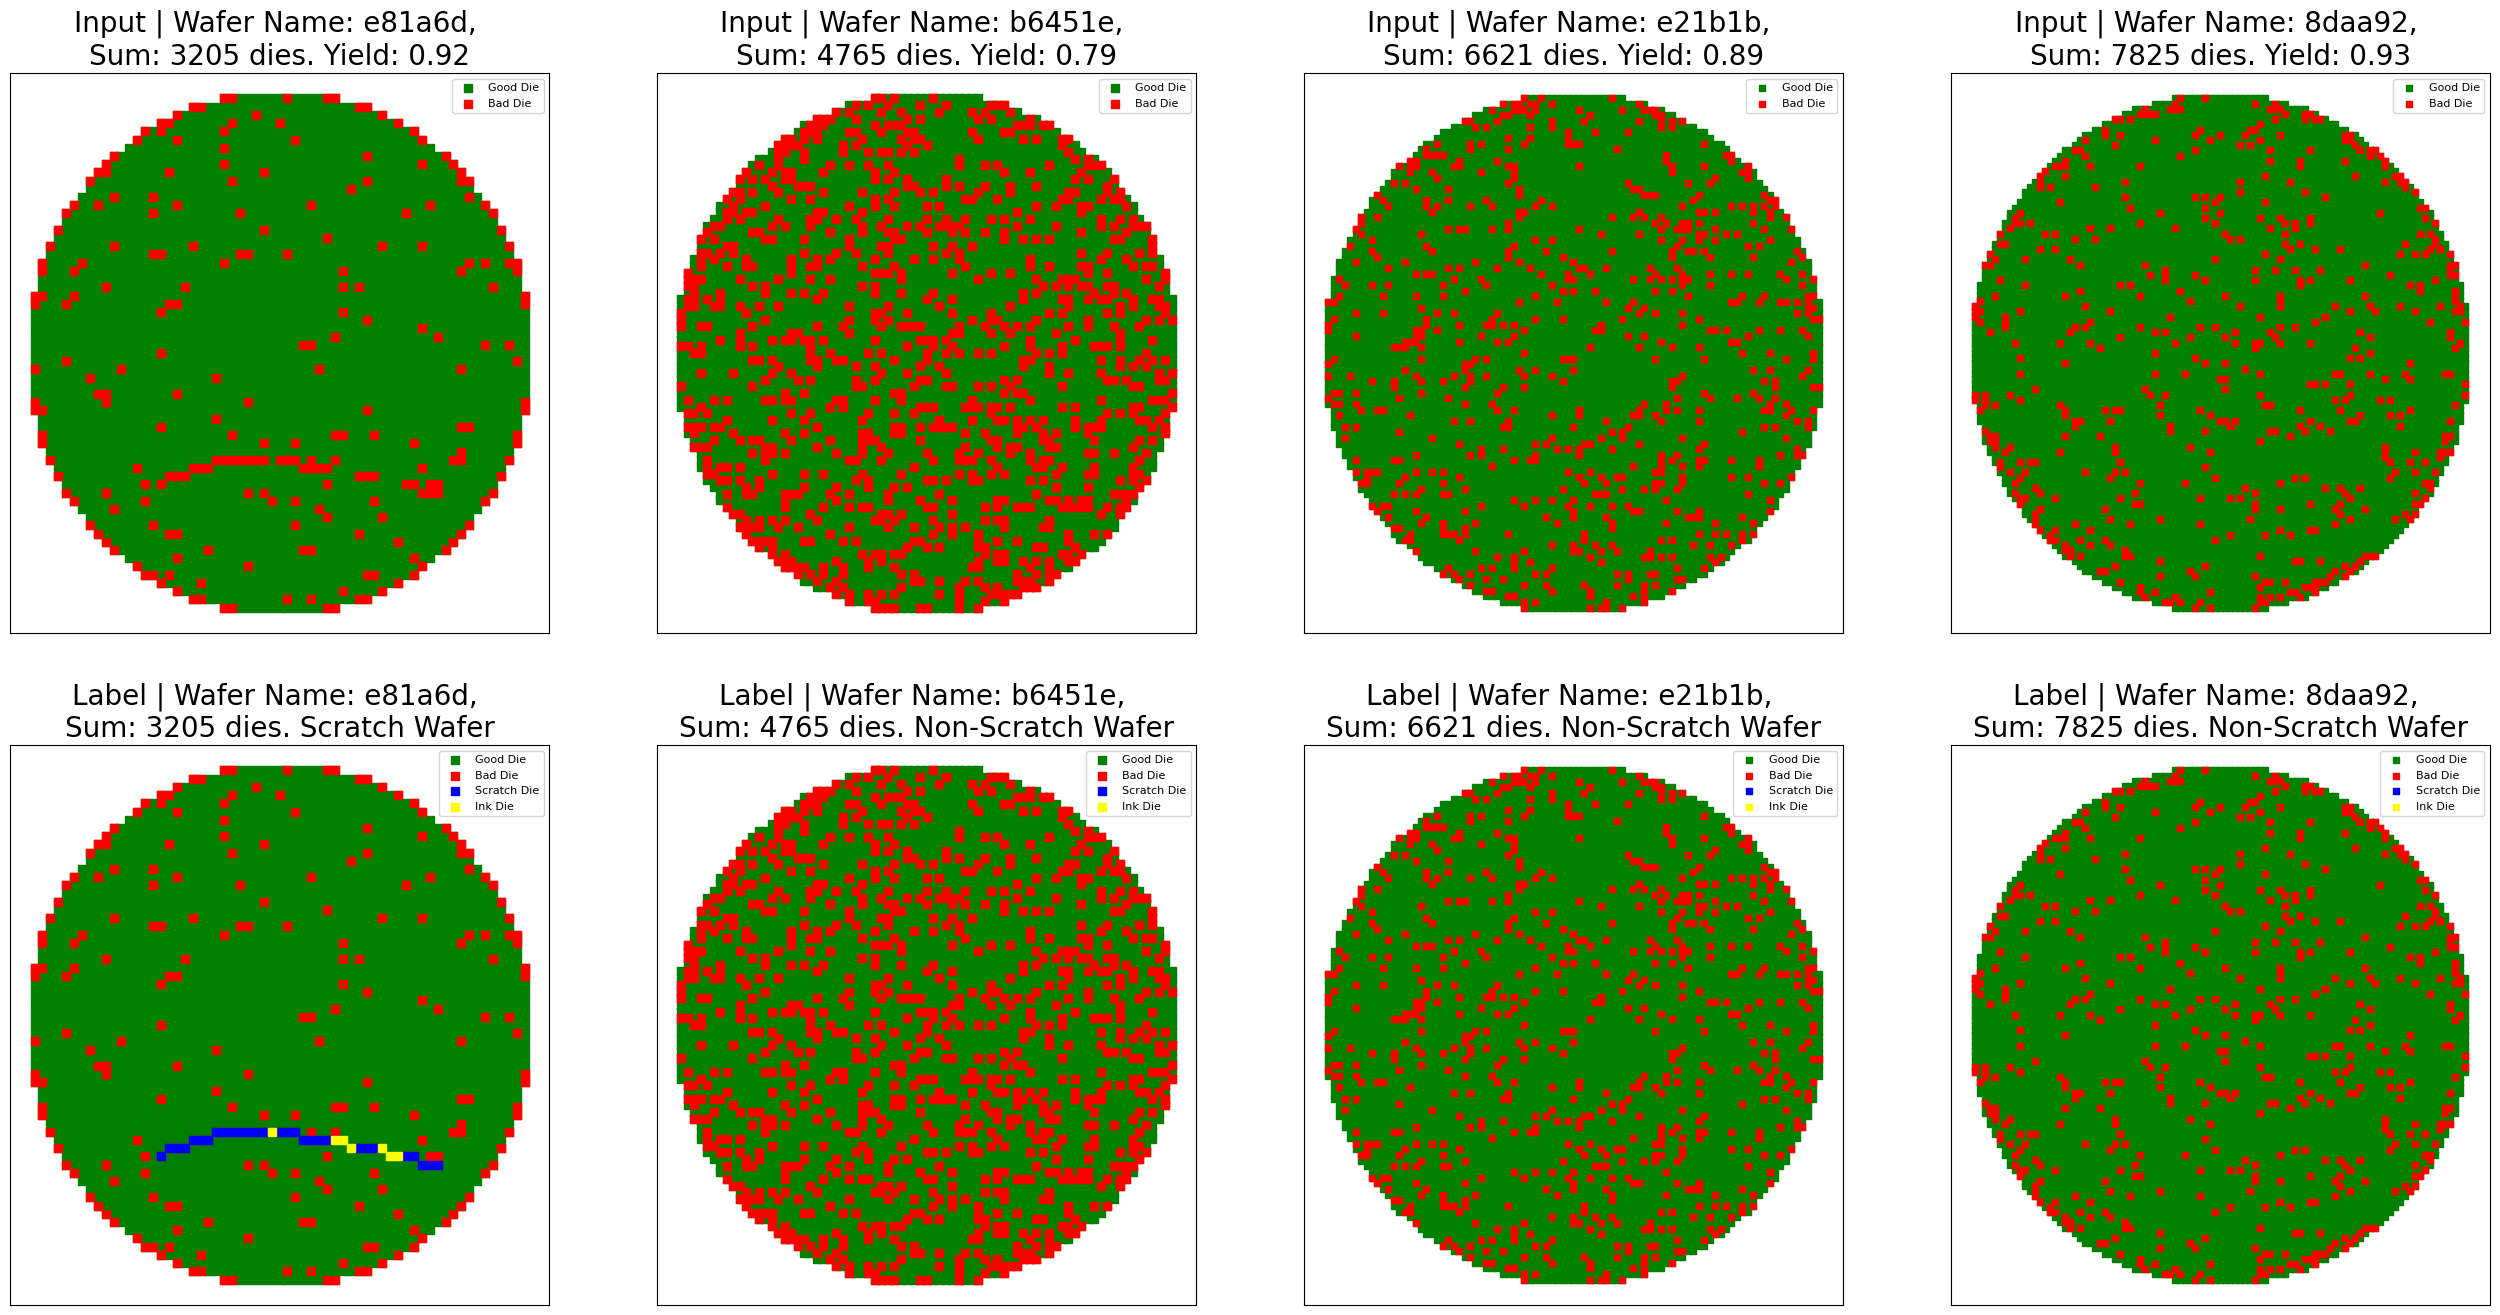

In [7]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

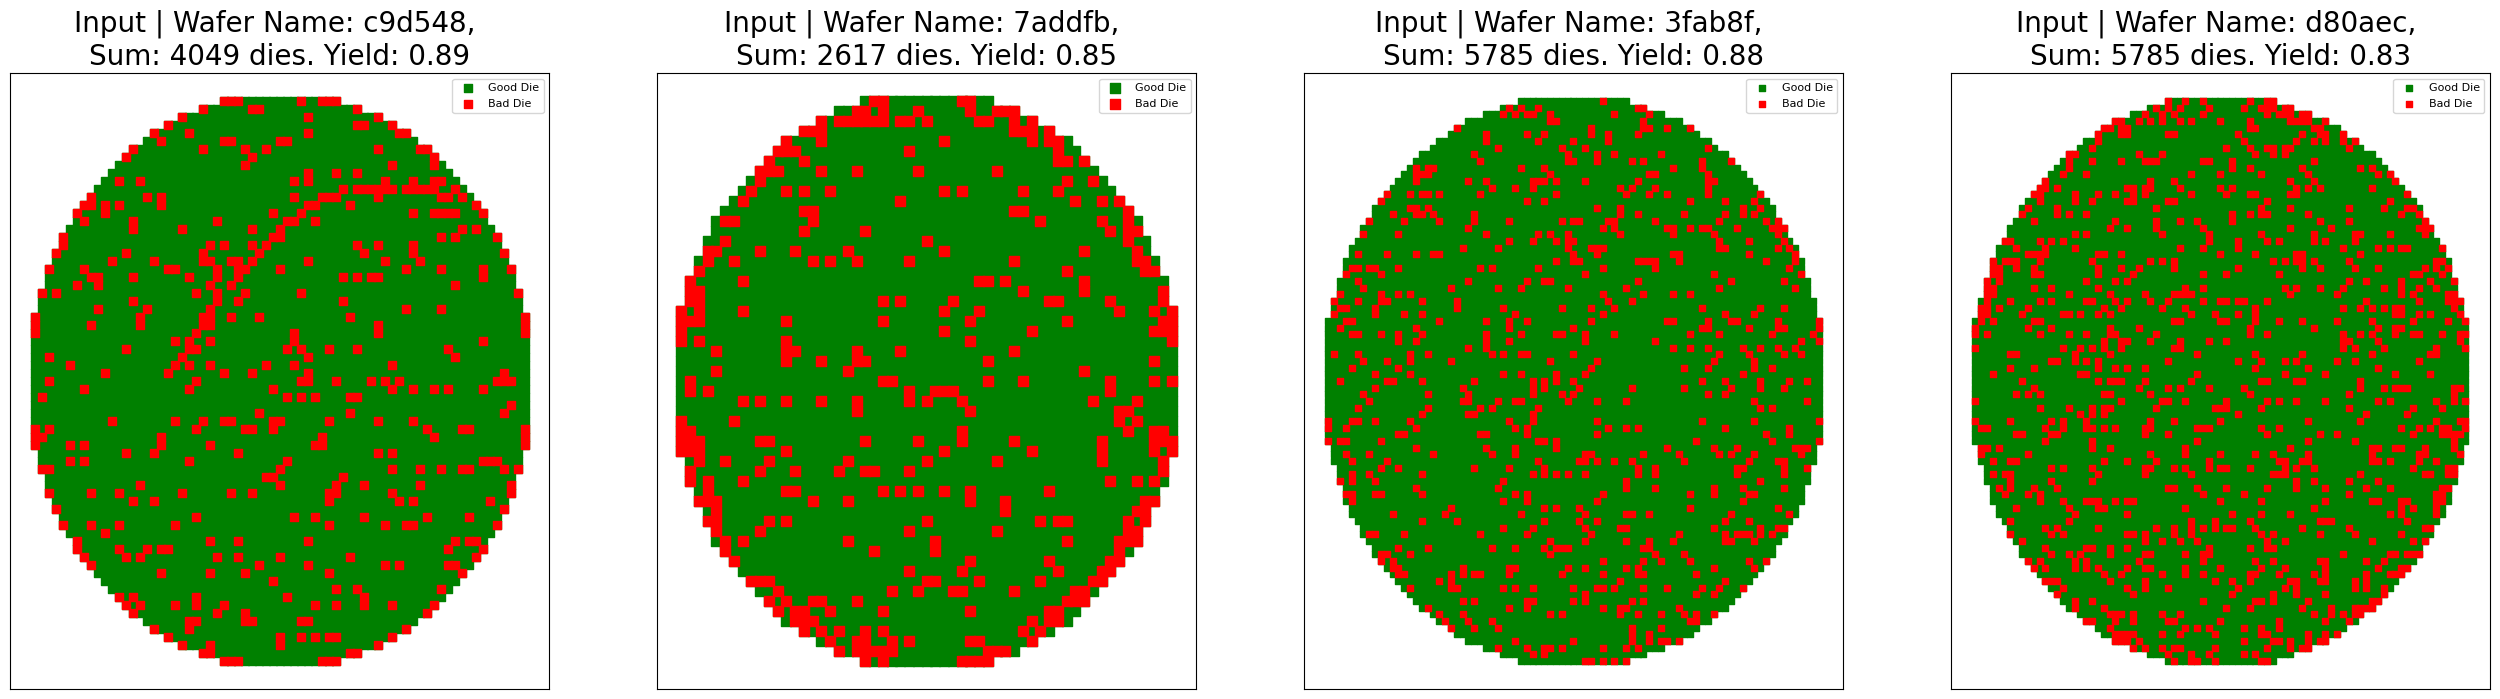

In [8]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

### Import Modules

In [9]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from sklearn.preprocessing import MinMaxScaler,MultiLabelBinarizer
import cv2
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score,accuracy_score,precision_score,brier_score_loss,roc_auc_score
import random as rd
from statistics import mode
import scipy.stats
from sklearn.cluster import DBSCAN,OPTICS
from sklearn.linear_model import LinearRegression
from skimage.transform import hough_line, hough_line_peaks,radon, rescale
from sklearn.model_selection import StratifiedGroupKFold,StratifiedKFold,train_test_split,cross_val_score
from sklearn.feature_selection import mutual_info_classif,RFECV
import pickle 
import optuna
from catboost import CatBoostClassifier
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from scipy import interpolate
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
#Convert Bool to Binary
df_wafers['IsGoodDie'] = df_wafers['IsGoodDie'].apply(lambda x : 1 if x== True else 0)
df_wafers['IsScratchDie'] = df_wafers['IsScratchDie'].apply(lambda x : 1 if x== True else 0)

In [11]:
# Variables

# Create list of feature Colums
features_clms_type = ['cut0', 'cut1', 'cut2', 'cut3', 'cut4', 'cut5', 'cut6', 'cut7', 'cut8',
       'cut9', 'cut10', 'cut11', 'cut12', 'std0', 'std1', 'std2', 'std3',
       'std4', 'std5', 'std6', 'std7', 'std8', 'std9', 'std10', 'std11',
       'std12', 'std13', 'std14', 'std15', 'std16', 'std17', 'std18', 'std19',
       'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7',
       'mean8', 'mean9', 'mean10', 'mean11', 'mean12', 'mean13', 'mean14',
       'mean15', 'mean16', 'mean17', 'mean18', 'mean19']

### EDA

#### Analyse Dies

In [12]:
# Check for any duplicates
df_wafers.duplicated().any()

False

There are no duplicate rows

In [13]:
# Check for any nans 
df_wafers.isnull().sum()

WaferName       0
DieX            0
DieY            0
IsGoodDie       0
IsScratchDie    0
dtype: int64

There are no null values

In [14]:
# Analyse Columns
df_wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16772092 entries, 0 to 16772091
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   WaferName     object
 1   DieX          int64 
 2   DieY          int64 
 3   IsGoodDie     int64 
 4   IsScratchDie  int64 
dtypes: int64(4), object(1)
memory usage: 639.8+ MB


In [15]:
#Describe the Data
df_wafers.describe()

DieX          DieY     IsGoodDie  IsScratchDie
count  1.677209e+07  1.677209e+07  1.677209e+07  1.677209e+07
mean   4.136554e+01  4.136554e+01  8.944683e-01  4.694525e-03
std    2.373912e+01  2.373912e+01  3.072374e-01  6.835559e-02
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.200000e+01  2.200000e+01  1.000000e+00  0.000000e+00
50%    3.900000e+01  3.900000e+01  1.000000e+00  0.000000e+00
75%    5.900000e+01  5.900000e+01  1.000000e+00  0.000000e+00
max    1.040000e+02  1.040000e+02  1.000000e+00  1.000000e+00

In [16]:
# Analyse Shape
df_wafers.shape

(16772092, 5)

In [17]:
# Count how many wafer
wafer_count = len(np.unique(df_wafers['WaferName']))
print(wafer_count)

3920


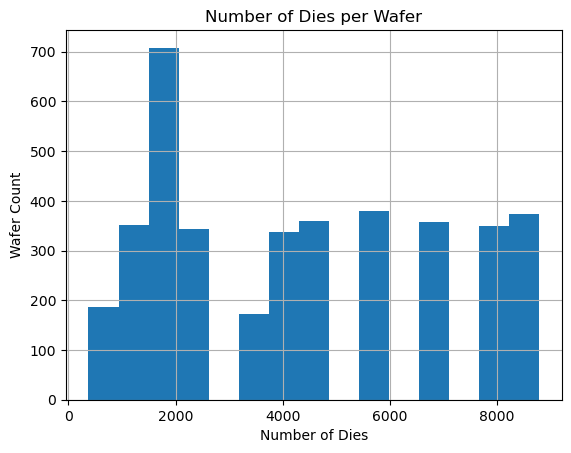

In [18]:
# Show number of dies per wafer
plt.hist(df_wafers.groupby('WaferName').count().DieX.astype(float), bins = 15)
plt.title('Number of Dies per Wafer')
plt.xlabel("Number of Dies")
plt.ylabel("Wafer Count")
plt.grid()
plt.show()

We can see that the distribution of the number of dies per wafer is quite uniform. However there is a peak around the mid thousands. 

Total Good and Bad Die Counts
IsGoodDie
1    15002104
0     1769988
Name: count, dtype: int64
Total Good and Bad Die Ratios
IsGoodDie
1    0.894468
0    0.105532
Name: proportion, dtype: float64


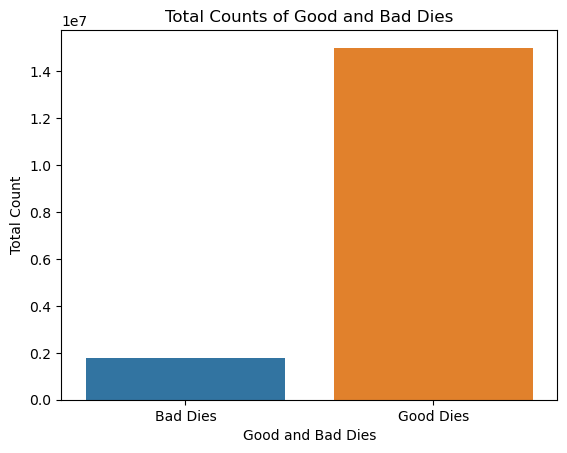

In [19]:
# Analyse Total Good and Bad Die Counts
print("Total Good and Bad Die Counts")
print(df_wafers['IsGoodDie'].value_counts())
print("Total Good and Bad Die Ratios")
print(df_wafers['IsGoodDie'].value_counts(normalize=True))
ax = sns.countplot(x = 'IsGoodDie',data = df_wafers)
ax.set_title("Total Counts of Good and Bad Dies")
ax.set_xlabel("Good and Bad Dies")
ax.set_ylabel("Total Count")
ax.set(xticklabels=(['Bad Dies','Good Dies']))
plt.show()

We can see that there are alot more Good Dies then there are broken dies

Total Scratch and Non Scratch Counts
IsScratchDie
0    16693355
1       78737
Name: count, dtype: int64
Total Scratch and Non-Scratch Ratios
IsScratchDie
0    0.995305
1    0.004695
Name: proportion, dtype: float64


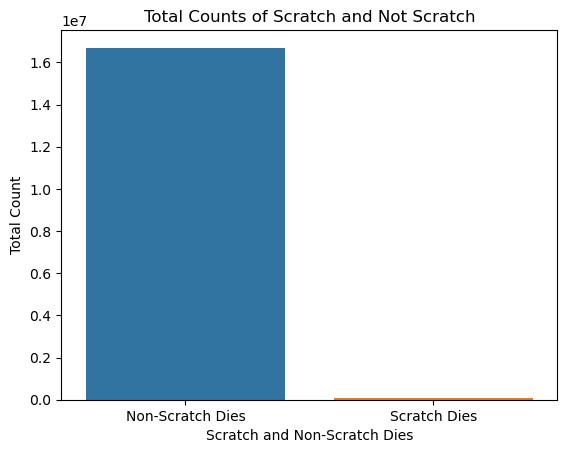

In [20]:
# Analyse Total Scratch and not Scratch Counts
print("Total Scratch and Non Scratch Counts")
print(df_wafers['IsScratchDie'].value_counts())
print("Total Scratch and Non-Scratch Ratios")
print(df_wafers['IsScratchDie'].value_counts(normalize=True))
ax = sns.countplot(x = 'IsScratchDie',data = df_wafers)
ax.set_title("Total Counts of Scratch and Not Scratch")
ax.set_xlabel("Scratch and Non-Scratch Dies")
ax.set_ylabel("Total Count")
ax.set(xticklabels=(['Non-Scratch Dies','Scratch Dies']))
plt.show()

We can see that there is a large amoung of Non-Scratch dies. 99% of the data is Non-Scratch.

Total Ink To Non Ink Counts
Ink
0    16754898
1       17194
Name: count, dtype: int64
Total Ink To Non Ink Ratios
Ink
0    0.998975
1    0.001025
Name: proportion, dtype: float64


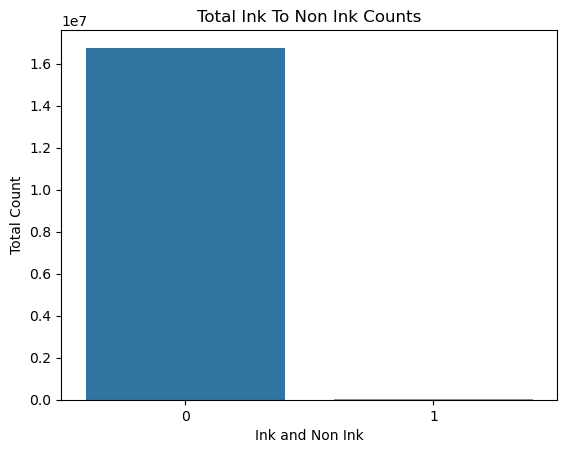

In [21]:
# Analyse the ink
df_wafers['Ink'] = np.array((df_wafers['IsGoodDie'] == 1) & (df_wafers['IsScratchDie'] == 1)).astype(int)

print("Total Ink To Non Ink Counts")
print(df_wafers['Ink'].value_counts())
print("Total Ink To Non Ink Ratios")
print(df_wafers['Ink'].value_counts(normalize=True))
ax = sns.countplot(x = 'Ink',data = df_wafers)
ax.set_title("Total Ink To Non Ink Counts")
ax.set_xlabel("Ink and Non Ink")
ax.set_ylabel("Total Count")
plt.show()

In [22]:
# INK TO SCRATCH
# Find the proportion of scratches that are also ink

df_wafers[df_wafers['IsScratchDie'] == 1]
print("Percent of scratches that are also Ink")
df_wafers[df_wafers['Ink'] == 1].shape[0] / df_wafers[df_wafers['IsScratchDie'] == 1].shape[0]

Percent of scratches that are also Ink


0.21837255673952524

In [23]:
# Check integrity of Ink vs Scratch Data
scratch_df = df_wafers[df_wafers['IsScratchDie'] == 1]
scratch_df[scratch_df['Ink'] == 1]['IsScratchDie'].all() == scratch_df[scratch_df['Ink'] == 1]['Ink'].all()

True

#### Analyse per wafer

In [24]:
# Number of Wafers with and without a scratch
id_scratch_dict = pd.Series(df_wafers.groupby("WaferName").sum().IsScratchDie > 0).astype(int).to_dict()
df_wafers['WaferScratch'] = df_wafers.WaferName.apply(lambda x : id_scratch_dict[x] )

In [25]:
# Analyse the total amount of dies on a Scratched and not Scratched Wafer
print('Total Number of Dies, that are on a wafer with and without a scratch')
print(df_wafers.WaferScratch.value_counts())
print('Percentage of Dies, that are on a wafer with and without a scratch')
print(df_wafers.WaferScratch.value_counts(normalize = True))

Total Number of Dies, that are on a wafer with and without a scratch
WaferScratch
1    8448222
0    8323870
Name: count, dtype: int64
Percentage of Dies, that are on a wafer with and without a scratch
WaferScratch
1    0.503707
0    0.496293
Name: proportion, dtype: float64


In [26]:
# Total amount of wafers with and without scratches on them
print('Count of Wafers with and without a Scratch')
np.unique(list(id_scratch_dict.values()), return_counts =True)

Count of Wafers with and without a Scratch


(array([0, 1]), array([1994, 1926], dtype=int64))

We can see that the distribution of the wafers with and without a scratch is balanced.

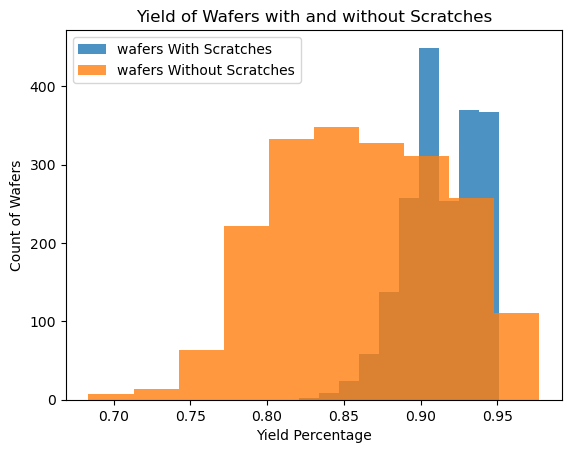

In [27]:
# Yield Of Wafers with and without a scratch --> Histogram
plt.hist(df_wafers[df_wafers['WaferScratch'] == 1].groupby('WaferName').mean()['IsGoodDie'], alpha = 0.8, label= "wafers With Scratches")
plt.hist(df_wafers[df_wafers['WaferScratch'] == 0].groupby('WaferName').mean()['IsGoodDie'], alpha = 0.8, label= "wafers Without Scratches")
plt.title('Yield of Wafers with and without Scratches') 
plt.xlabel('Yield Percentage')
plt.ylabel('Count of Wafers')
plt.legend()
plt.show()


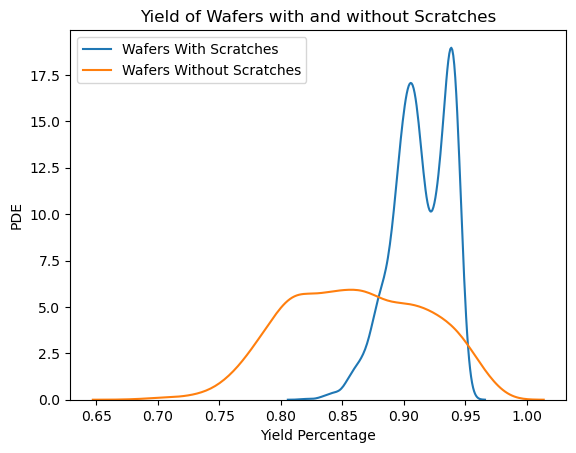

In [28]:
# Yield Of Wafers with and without a scratch --> KDE plot
sns.kdeplot(df_wafers[df_wafers['WaferScratch'] == 1].groupby('WaferName').mean()['IsGoodDie'], label= "Wafers With Scratches")
sns.kdeplot(df_wafers[df_wafers['WaferScratch'] == 0].groupby('WaferName').mean()['IsGoodDie'], label= "Wafers Without Scratches")
plt.title('Yield of Wafers with and without Scratches') 
plt.xlabel('Yield Percentage')
plt.ylabel('PDE')
plt.legend()
plt.show()

The above two graphs show that there appears to be two distributions between the wafers with and without a scratch when you analyse their yield. However, it appears to be backwards. I would expect that the more scratches, the more bad dies, and as such the yield to be lower for the scratched dies. 

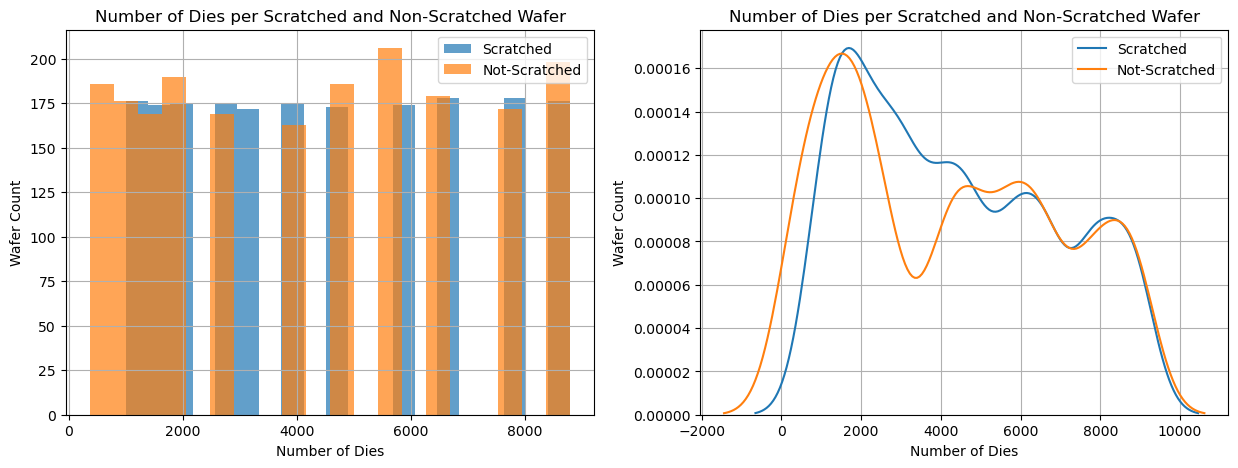

In [29]:
# Show number of dies per wafer with Scratch and Without Scratch

df_wafer_scratched = df_wafers[df_wafers['WaferScratch'] == 1]
df_wafer_not_scratched = df_wafers[df_wafers['WaferScratch'] == 0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(df_wafer_scratched.groupby('WaferName').count().DieX.astype(float), bins = 20, alpha = 0.7, label= 'Scratched')
axes[0].hist(df_wafer_not_scratched.groupby('WaferName').count().DieX.astype(float), bins = 20, alpha = 0.7, label= 'Not-Scratched')
axes[0].set_title('Number of Dies per Scratched and Non-Scratched Wafer')
axes[0].set_xlabel("Number of Dies")
axes[0].set_ylabel("Wafer Count")
axes[0].legend()
axes[0].grid()

# Show number of dies per wafer with Scratch and Without Scratch
sns.kdeplot(df_wafer_scratched.groupby('WaferName').count().DieX.astype(float), label= 'Scratched', ax= axes[1])
sns.kdeplot(df_wafer_not_scratched.groupby('WaferName').count().DieX.astype(float), label= 'Not-Scratched', ax= axes[1])
axes[1].set_title('Number of Dies per Scratched and Non-Scratched Wafer')
axes[1].set_xlabel("Number of Dies")
axes[1].set_ylabel("Wafer Count")
axes[1].legend()
axes[1].grid()

It appears that the number of dies for both scratched and non-scratched wafers are uniform. 

## Feature Engineering 

There are many ways to solve this problem. I feel that the best way is to try and utilize the given data to create more features, which would be later used to train different classifcation models. As such I have compiled a set of features, derived from the spatial characteristcs as well as the good/bad die statistics in an attempt to extract any more information that may be present in the data. This approach should allow for individual die classification. 

### Helper Functions

In [30]:
def create_image_with_scratch(input_wafer, filter=False):
    """
    This function accepts a specific wafer as a dataframe and outputs a matrix representation of the wafer that can be shown as a 2d image. This function highilights any scratches.  

    :input_wader: DataFrame, A DataFrame of a single wafer, including the 'DieX','DieY','IsScratchDie' & 'isGoodDie' Features. 
    :filter: Bool, This is a boolean that outlines if any filtering processes have been applied to any dies. 

    Return: trial_image Array, A 2d array representation of the wafer, with the scratch highlighted. 
    """
    
    trial_image = np.zeros((input_wafer.DieX.max()+1,input_wafer.DieX.max()+1))
    input_wafer.reset_index(drop= True, inplace=True)
    
    if filter == False:
        good_die_clm = 'IsGoodDie'	
    else:
        good_die_clm = 'filtered_values'
    
    for i in input_wafer.index[:-1]:
        if input_wafer.loc[i,f"{good_die_clm}"] == 1 and input_wafer.loc[i,"IsScratchDie"] == 0:
            replace_num = 1
        elif input_wafer.loc[i,f"{good_die_clm}"] == 1 and input_wafer.loc[i,"IsScratchDie"] == 1:
            replace_num = 2
        elif input_wafer.loc[i,f"{good_die_clm}"] == 0 and input_wafer.loc[i,"IsScratchDie"] == 0:
            replace_num = 3
        elif input_wafer.loc[i,f"{good_die_clm}"] == 0 and input_wafer.loc[i,"IsScratchDie"] == 1:
            replace_num = 4

        input_wafer.loc[i,"DieX"] 

        trial_image[input_wafer.loc[i,"DieX"],input_wafer.loc[i,"DieY"]] = replace_num
    
    return trial_image

def create_image_without_scratch(input_wafer, filter=False):
    """
    This function accepts a specific wafer as a dataframe and outputs a matrix representation of the wafer that can be shown as a 2d image. This function does not highilight any scratches.  

    :input_wader: DataFrame, A DataFrame of a single wafer, including the 'DieX','DieY','IsScratchDie' & 'isGoodDie' Features. 
    :filter: Bool, This is a boolean that outlines if any filtering processes have been applied to any dies. 

    Return: trial_image Array, A 2d array representation of the wafer, without the scratch highlighted. 
    """
    trial_image = np.empty((input_wafer.DieX.max()+1,input_wafer.DieX.max()+1))
    trial_image[:] = np.nan
    input_wafer.reset_index(drop= True, inplace=True)

    if filter == False:
        good_die_clm = 'IsGoodDie'	
    else:
        good_die_clm = 'filtered_values'
    

    for i in input_wafer.index[:-1]:
        if input_wafer.loc[i,f"{good_die_clm}"] == 0:
            replace_num = 0
        elif input_wafer.loc[i,f"{good_die_clm}"] == 1:
            replace_num = 1

        input_wafer.loc[i,"DieX"] 

        trial_image[input_wafer.loc[i,"DieX"],input_wafer.loc[i,"DieY"]] = replace_num
    
    return trial_image

def df_to_array(input_wafer):
    """
    Transforms a single wafer from a DataFrame to a square matrix. The area not part of the wafer will be filled with nans. 
    
    :input_wafer: DataFrame, A DataFrame of a single wafer, including the 'DieX','DieY' & 'isGoodDie' Features. 

    Return: circle_mold Array, A 2d array representation of the wafer, with area outside of circle and inside squre filled with nans.
    """
    circle_mold = np.full((input_wafer['DieX'].max()+1,input_wafer['DieY'].max()+1),np.nan)
    for i in input_wafer.index:
        x =  input_wafer.loc[i,'DieX']
        y =  input_wafer.loc[i,'DieY']
        z =  input_wafer.loc[i,'IsGoodDie']
        circle_mold[x][y] = z
    
    return circle_mold

def df_to_array_non_nan(input_wafer):
    """
    Transforms a single wafer from a DataFrame to a square matrix. The area not part of the wafer will be filled with zeroes. 
    
    :input_wafer: DataFrame, A DataFrame of a single wafer, including the 'DieX','DieY' & 'isGoodDie' Features. 

    Return: circle_mold Array, A 2d array representation of the wafer, with area outside of circle and inside squre filled with zeroes.
    """

    circle_mold = np.full((input_wafer['DieX'].max()+1,input_wafer['DieY'].max()+1),0)
    for i in input_wafer.index:
        x =  input_wafer.loc[i,'DieX']
        y =  input_wafer.loc[i,'DieY']
        z =  input_wafer.loc[i,'IsGoodDie']
        circle_mold[x][y] = z+1
    
    return circle_mold


def grouped(iterable, n):
    """
    Divide the given iterable into evenly sized groups

    :iterable: List, A list of values to be divided into smaller groups.
    :n: Int, An integer that specifies how many elements per group.

    Return: List, A list of lists, where each element is sized n.  
    """
    return zip(*[iter(iterable)]*n)


def generate_class_weights(class_series, multi_class=True, one_hot_encoded=False):

    """
    Analyses the class distribution of the independant variables and returns their respective wieghts to use as a hyperparamater in model training. 

    :class_series: Series, A series of the independant Variables.   
    :multi_class: Bool, A boolean to apply correct calcualtions depending on if it is a multiclass Series.
    :one_hot_encoded: Bool, A boolean to apply one_hot_encoding.  

    Return Dict: A dictionary of the class weights per class.  

    """
    if multi_class:
        # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
        if one_hot_encoded:
            class_series = np.argmax(class_series, axis=1)
    
        # Compute class weights with sklearn method
        class_labels = np.unique(class_series)
        class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
        return dict(zip(class_labels, class_weights))
    else:
        # It is neccessary that the multi-label values are one-hot encoded
        mlb = None
        if not one_hot_encoded:
            mlb = MultiLabelBinarizer()
            class_series = mlb.fit_transform(class_series)

        n_samples = len(class_series)
        n_classes = len(class_series[0])

        # Count each class frequency
        class_count = [0] * n_classes
        for classes in class_series:
            for index in range(n_classes):
                if classes[index] != 0:
                    class_count[index] += 1
        
        # Compute class weights using balanced method
        class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
        class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
        return dict(zip(class_labels, class_weights))

### Feature 1: Noise Filtering Score

#### 1.1: Explanation

One of the first steps in any DS problem is to remove the noise and sanatise the data. Assuming there is a relationship between bad dies and scratches and considerong that there are many bad dies that do not belong to a scratch, identifying and removing them should produce a cleaner dataset allowing for more accurate predictions. However while this approach should help identify bad dies that are not in scratches, it does not help to identify good dies that are in scratches, consequently, this feature is not going to be filtering away dies, but rather utilizing the predictions from the following methods to create a "Score" for each Die. The score is a numerical representation of its probability of belonging to a scratch, under the assumption that a proximity to a group of bad die is more likely to be a scratch. The Score is derived through analysing multiple supervised and unsupervised clustering techniqes.

#### Feature 1.1: KNN Filtering

##### Feature 1.1.1: Explanation

This feature is created by using a Leave-One-Out (LOO) approach to iteritvely apply the KNN algoirithm to each die in the wafer. The attempt is that each die will recieve a prediction of its status, and that isolated Bad Dies will be filtered out, while clumped Bad dies will remain. Assuming clumped bad Dies are apart of scratches this should help located Bad dies that are part of Scratches. Additionally, continuing witht the previous assumptions, the inked dies would also likley to be found due to their proximity to the Bad dies that are still classified as Bad after the LOO search.

##### 1.1.2: Proof of Concept

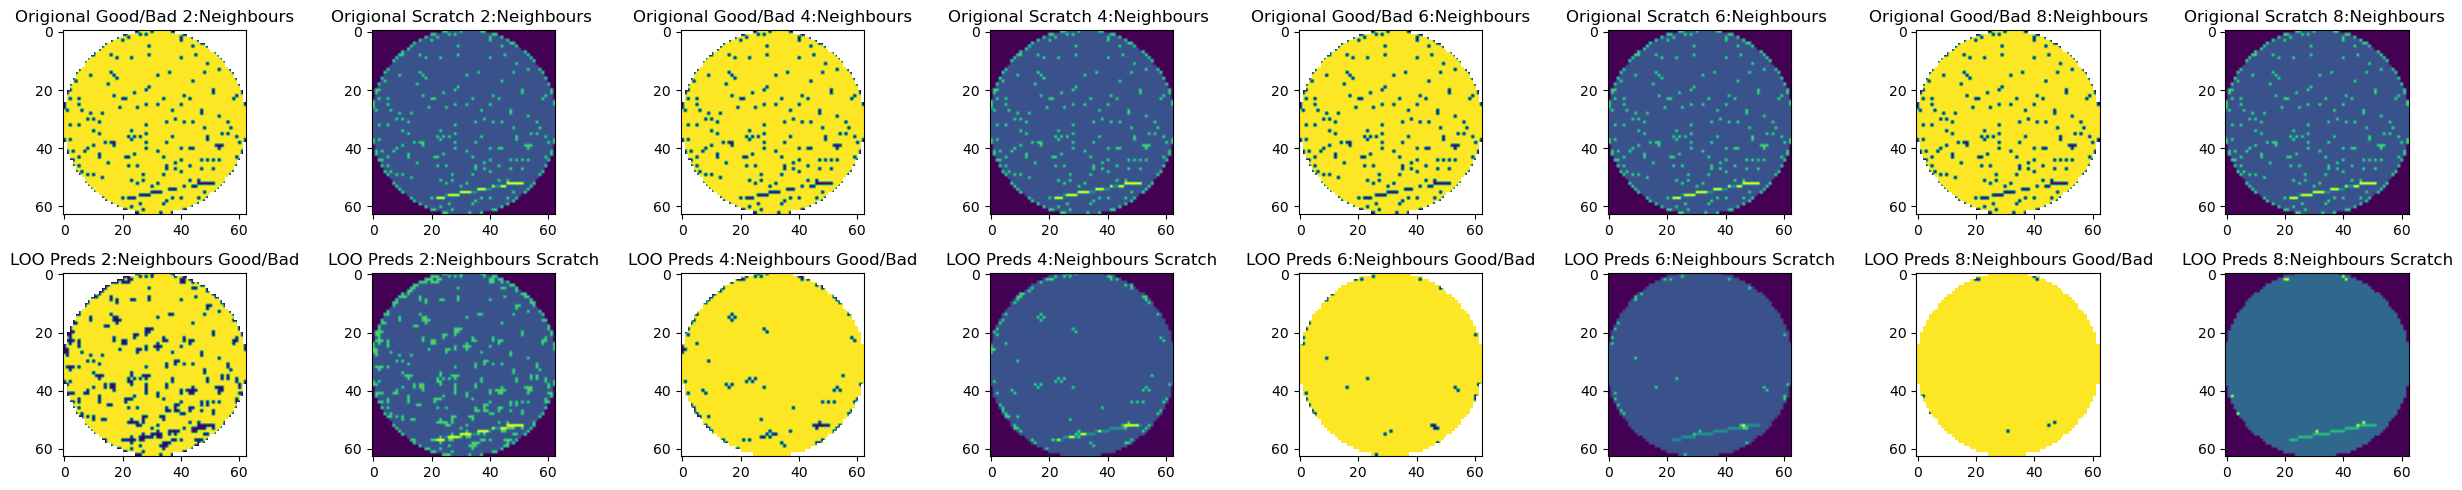

In [31]:
#LOO --> KNN --> Wafer With Scratch
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))

# Apply LOO KNN predictions with different number of closest Neighbours
for j in range(2,10,2):
    pred_lst = []
    for i in trial_df.index:
        # Seperate the Wafer into Train and Test Set
        X_train_trial = trial_df.loc[list(trial_df.index)[:i] + list(trial_df.index)[i+1:],["DieX","DieY"]]
        Y_train_trial = trial_df.loc[list(trial_df.index)[:i] + list(trial_df.index)[i+1:],"IsGoodDie"].astype(int)
        
        X_test_trial = trial_df.loc[i,["DieX","DieY"]]
        Y_test_trial = trial_df.loc[i,"IsGoodDie"]
        
        # Instantiate and Fit Model
        neigh = KNeighborsClassifier(n_neighbors=j) 
        neigh.fit(X_train_trial.values,Y_train_trial.values)
        
        # Make and Save Predictions
        preds = neigh.predict([X_test_trial.values])
        pred_lst.append(preds[0])

    trial_df['filtered_values'] = pred_lst

    # Create the Wafer Maps
    no_scratch_image_before = create_image_without_scratch(trial_df, False)
    scratch_image_before = create_image_with_scratch(trial_df, False)
    no_scratch_image_after = create_image_without_scratch(trial_df, True)
    scratch_image_after = create_image_with_scratch(trial_df, True)

    # Plot the Origional and Predicted Wafer Maps
    axes[0,j-2].imshow(no_scratch_image_before)
    axes[0,j-2].set_title(f'Origional Good/Bad {j}:Neighbours')
    axes[0,j-1].imshow(scratch_image_before)
    axes[0,j-1].set_title(f'Origional Scratch {j}:Neighbours ')
    axes[1,j-2].imshow(no_scratch_image_after)
    axes[1,j-2].set_title(f'LOO Preds {j}:Neighbours Good/Bad')
    axes[1,j-1].imshow(scratch_image_after)
    axes[1,j-1].set_title(f'LOO Preds {j}:Neighbours Scratch')
plt.tight_layout()

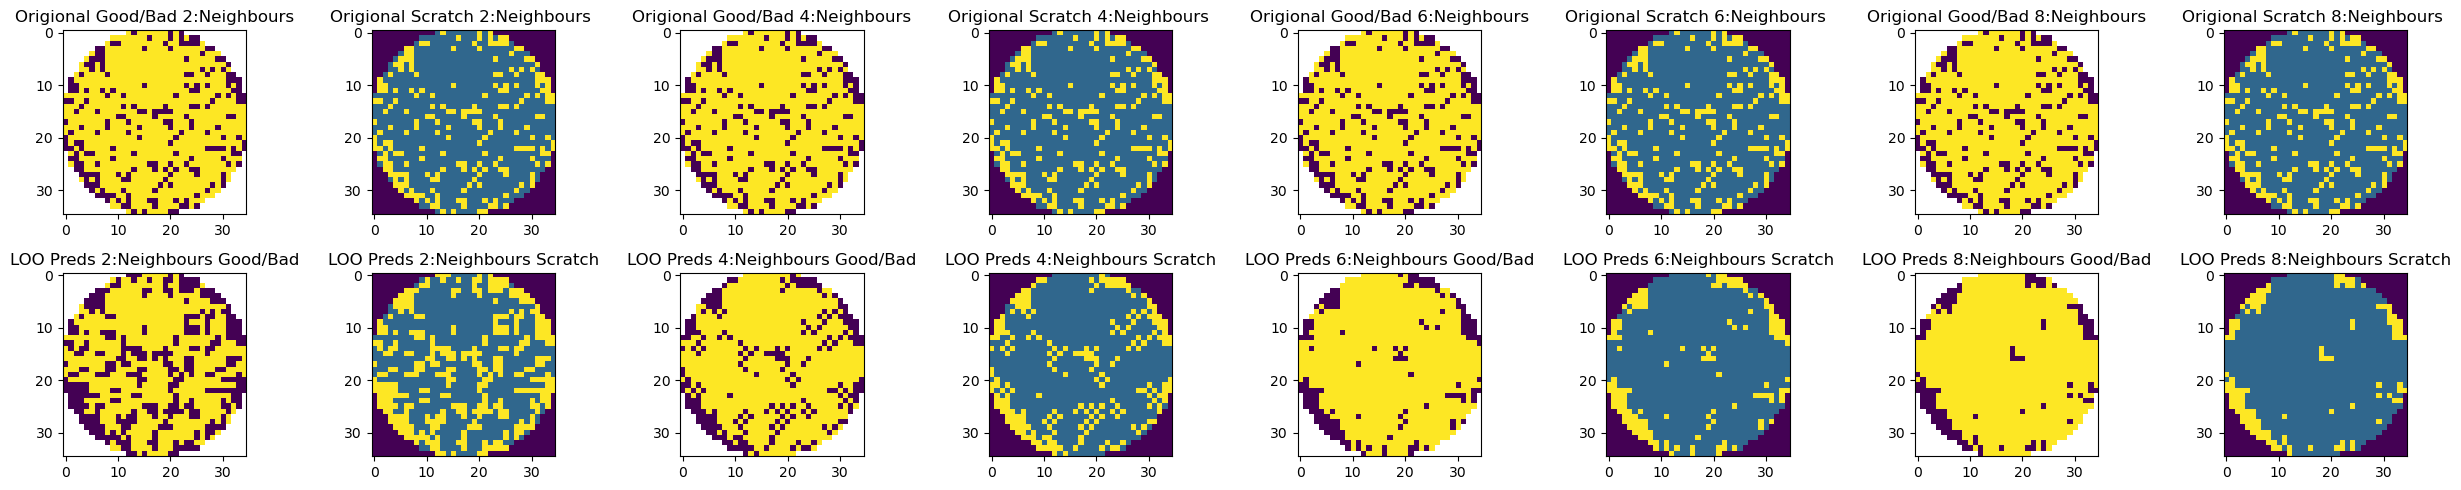

In [32]:
#LOO --> KNN --> Wafer Without Scratch
trial_df = df_wafers[df_wafers['WaferName'] == '8203ce']
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))

# Apply LOO KNN predictions with different number of closest Neighbours
for j in range(2,10,2):
    pred_lst = []
    for i in trial_df.index:
        # Seperate the Wafer into Train and Test Set
        X_train_trial = trial_df.loc[list(trial_df.index)[:i] + list(trial_df.index)[i+1:],["DieX","DieY"]]
        Y_train_trial = trial_df.loc[list(trial_df.index)[:i] + list(trial_df.index)[i+1:],"IsGoodDie"].astype(int)
        
        X_test_trial = trial_df.loc[i,["DieX","DieY"]]
        Y_test_trial = trial_df.loc[i,"IsGoodDie"]
        
        # Instantiate and Fit Model
        neigh = KNeighborsClassifier(n_neighbors=j) 
        neigh.fit(X_train_trial.values,Y_train_trial.values)
        
        # Make and Save Predictions
        preds = neigh.predict([X_test_trial.values])
        pred_lst.append(preds[0])

    trial_df['filtered_values'] = pred_lst

    # Create the Wafer Maps
    no_scratch_image_before = create_image_without_scratch(trial_df, False)
    scratch_image_before = create_image_with_scratch(trial_df, False)
    no_scratch_image_after = create_image_without_scratch(trial_df, True)
    scratch_image_after = create_image_with_scratch(trial_df, True)

    # Plot the Origional and Predicted Wafer Maps
    axes[0,j-2].imshow(no_scratch_image_before)
    axes[0,j-2].set_title(f'Origional Good/Bad {j}:Neighbours')
    axes[0,j-1].imshow(scratch_image_before)
    axes[0,j-1].set_title(f'Origional Scratch {j}:Neighbours ')
    axes[1,j-2].imshow(no_scratch_image_after)
    axes[1,j-2].set_title(f'LOO Preds {j}:Neighbours Good/Bad')
    axes[1,j-1].imshow(scratch_image_after)
    axes[1,j-1].set_title(f'LOO Preds {j}:Neighbours Scratch')
plt.tight_layout()

##### 1.1.3 Initial Findings

The LOO KNN filtering process was repeated multiple times, each time changing the total number of neighbours to check. The initial tests prove promising, with the smaller number of neighbours being analysed removing large amounts of "Noisy" bad dies while retaining the Scratched dies. As expected loooking at too many neighbours, starts to make the prediction just the majority class and results in a homogenous wafer predicion, which is not helpfull. This pattern can be seen both in a scratched and non scratched die. An intersting problem to solve that the knn approach has not solved is the clustering of Bad Dies near the edges. However I feel that this approach has proved that this is a step in the right direction of classifying the Bad Dies that are part of scratches and the Bad Dies that are not part of Scratches. Later testing, has found that this approach is very slow and cumbersome for the dataset presented, as such I have tried to implement a quicker algorithm that does not look at as many points as the KNN algorithm. 

- Suggestions   
    - Perhaps it might be better to use the prediction probabilitesi instead of the final predicitions, this may allow for more freedem and clarity in the final predicion.
    - Perhaps it might be worth using the Manhatten Distance Instead of the Euclidean Distance, as this is a grid structure. 

#### Feature 1.2: Self-Made Faster KNN Filtering

##### 1.2.1: Explanation

While the above implimentation of the code seemed promising, the time taken to produce all the features was quite long. I believe that repeating a KNN search on thousands of Dies, thousands of times is the cause of the long production time. As such I have tried to implement a solution that does not look at all dies each iteration but only a select few known to be in the vecinity of the Dies being analysed. I analysed the results of randomly selecting different number of neighbours. 

##### 1.2.2: Proof of Concept

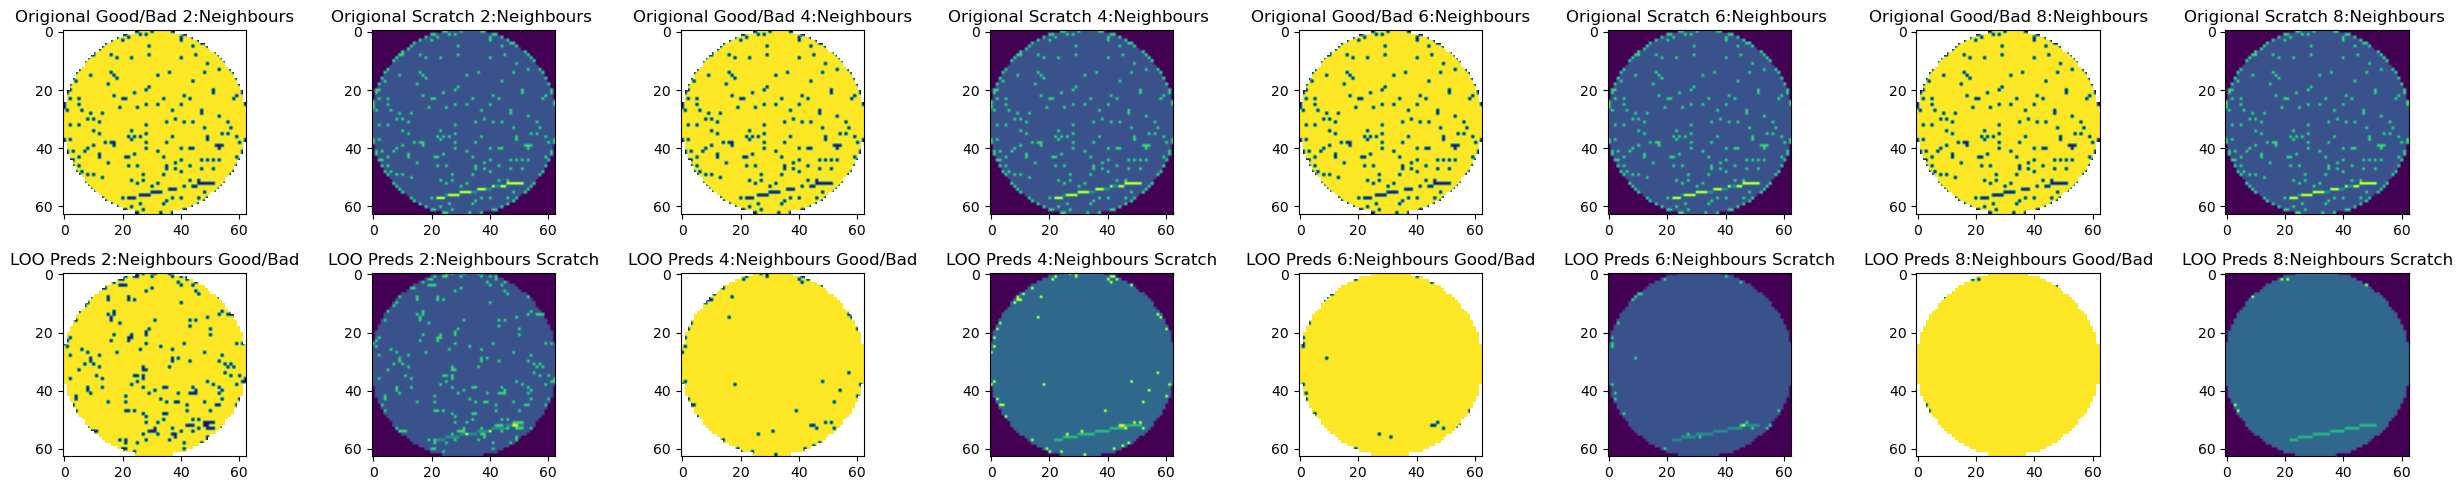

In [33]:
# Randomly Selecting --> Wafer with Scratch
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']

circle_mold= df_to_array(trial_df)
pad_length = 1
circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(25, 5))
for j in range(2,10,2):
    pred_lst = []
    for i in trial_df.index:
        
        x_coord = trial_df.loc[i,'DieX'] + pad_length
        y_coord = trial_df.loc[i,'DieY'] + pad_length 
        
        top = circle_mold[x_coord,y_coord+1]
        bottom = circle_mold[x_coord,y_coord-1]
        right = circle_mold[x_coord+1,y_coord]
        left = circle_mold[x_coord-1,y_coord]
        top_right = circle_mold[x_coord+1,y_coord+1]
        top_left = circle_mold[x_coord-1,y_coord+1]
        bottom_right = circle_mold[x_coord+1,y_coord-1]
        bottom_left = circle_mold[x_coord-1,y_coord-1]


        neighbour_lst = [top,bottom,right,left,top_right,top_left,bottom_right,bottom_left]

        prediction = mode(rd.sample(neighbour_lst,j))

        pred_lst.append(prediction)

    trial_df['filtered_values'] = pred_lst
    trial_df['filtered_values'].fillna(1, inplace=True)
    no_scratch_image_before = create_image_without_scratch(trial_df, False)
    scratch_image_before = create_image_with_scratch(trial_df, False)
    no_scratch_image_after = create_image_without_scratch(trial_df, True)
    scratch_image_after = create_image_with_scratch(trial_df, True)

    axes[0,j-2].imshow(no_scratch_image_before)
    axes[0,j-2].set_title(f'Origional Good/Bad {j}:Neighbours')
    axes[0,j-1].imshow(scratch_image_before)
    axes[0,j-1].set_title(f'Origional Scratch {j}:Neighbours ')
    axes[1,j-2].imshow(no_scratch_image_after)
    axes[1,j-2].set_title(f'LOO Preds {j}:Neighbours Good/Bad')
    axes[1,j-1].imshow(scratch_image_after)
    axes[1,j-1].set_title(f'LOO Preds {j}:Neighbours Scratch')
plt.tight_layout()

It appears that many noisy dies are filtered out even with low values, however at higher values all dies are filtered out, lets see what happens just when using a small amount of neighbours. Below is the same code, however only looking at 1-5 of the closest neighbours.  

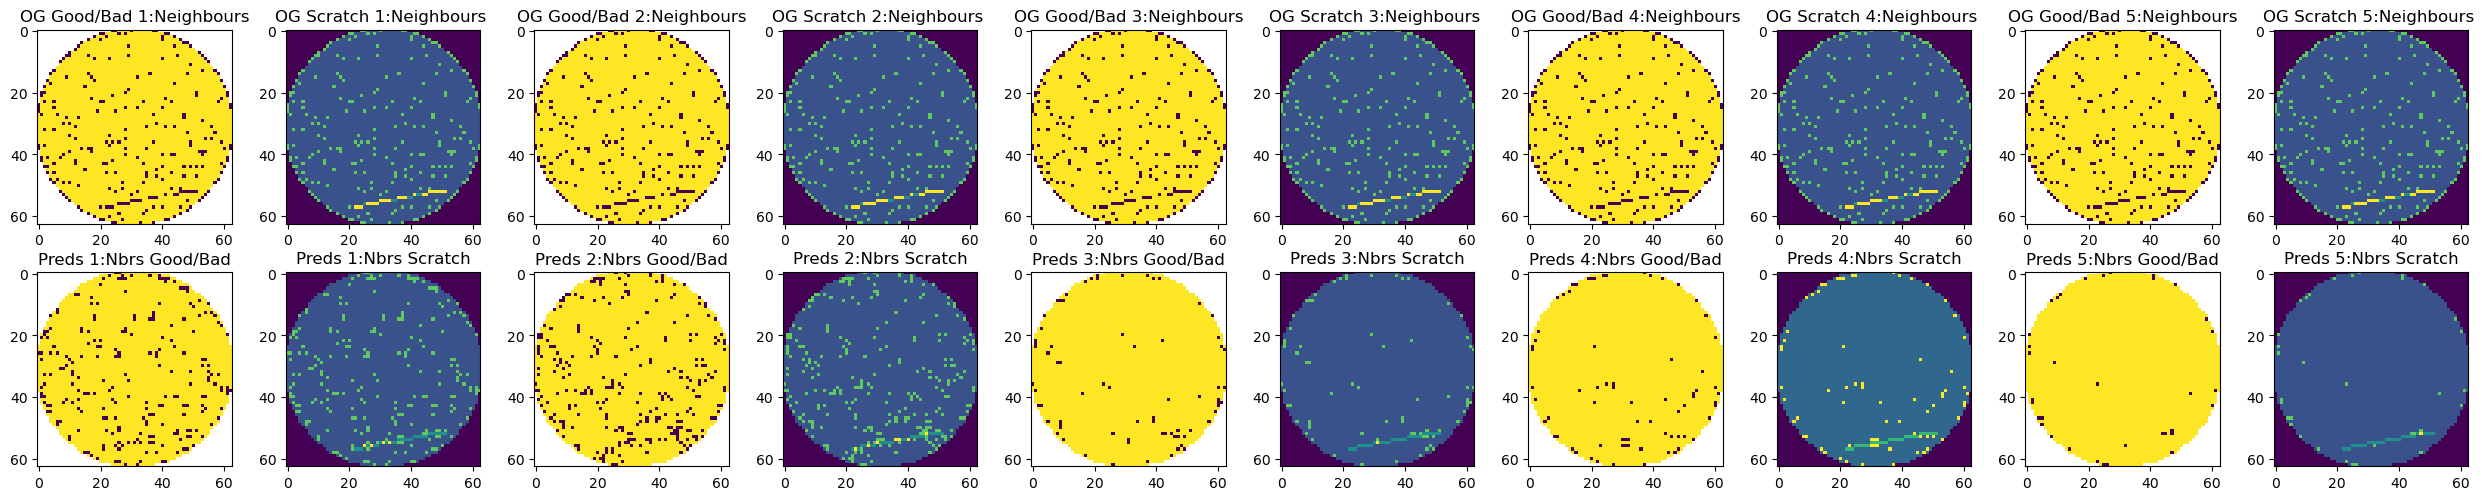

In [34]:
# Randomly Selecting --> Wafer with Scratch --> Range Of Neighbours 1-->5
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']
circle_mold= df_to_array(trial_df)
pad_length = 1
circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

plot_lst = [[0],[0,1],[2,3],[4,5],[6,7],[8,9]]
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(25, 5))
for j in range(1,6):
    pred_lst = []
    for i in trial_df.index:

        x_coord = trial_df.loc[i,'DieX'] + pad_length
        y_coord = trial_df.loc[i,'DieY'] + pad_length 
        
        top = circle_mold[x_coord,y_coord+1]
        bottom = circle_mold[x_coord,y_coord-1]
        right = circle_mold[x_coord+1,y_coord]
        left = circle_mold[x_coord-1,y_coord]
        top_right = circle_mold[x_coord+1,y_coord+1]
        top_left = circle_mold[x_coord-1,y_coord+1]
        bottom_right = circle_mold[x_coord+1,y_coord-1]
        bottom_left = circle_mold[x_coord-1,y_coord-1]

        neighbour_lst = [top,bottom,right,left,top_right,top_left,bottom_right,bottom_left]
        
        prediction = mode(rd.sample(neighbour_lst,j))

        pred_lst.append(prediction)

    trial_df['filtered_values'] = pred_lst
    trial_df['filtered_values'].fillna(1, inplace=True)

    no_scratch_image_before = create_image_without_scratch(trial_df, False)
    scratch_image_before = create_image_with_scratch(trial_df, False)
    no_scratch_image_after = create_image_without_scratch(trial_df, True)
    scratch_image_after = create_image_with_scratch(trial_df, True)
    
      

    axes[0,plot_lst[j][0]].imshow(no_scratch_image_before)
    axes[0,plot_lst[j][0]].set_title(f'OG Good/Bad {j}:Neighbours')
    axes[0,plot_lst[j][1]].imshow(scratch_image_before)
    axes[0,plot_lst[j][1]].set_title(f'OG Scratch {j}:Neighbours ')
    axes[1,plot_lst[j][0]].imshow(no_scratch_image_after)
    axes[1,plot_lst[j][0]].set_title(f'Preds {j}:Nbrs Good/Bad')
    axes[1,plot_lst[j][1]].imshow(scratch_image_after)
    axes[1,plot_lst[j][1]].set_title(f'Preds {j}:Nbrs Scratch')
plt.tight_layout()

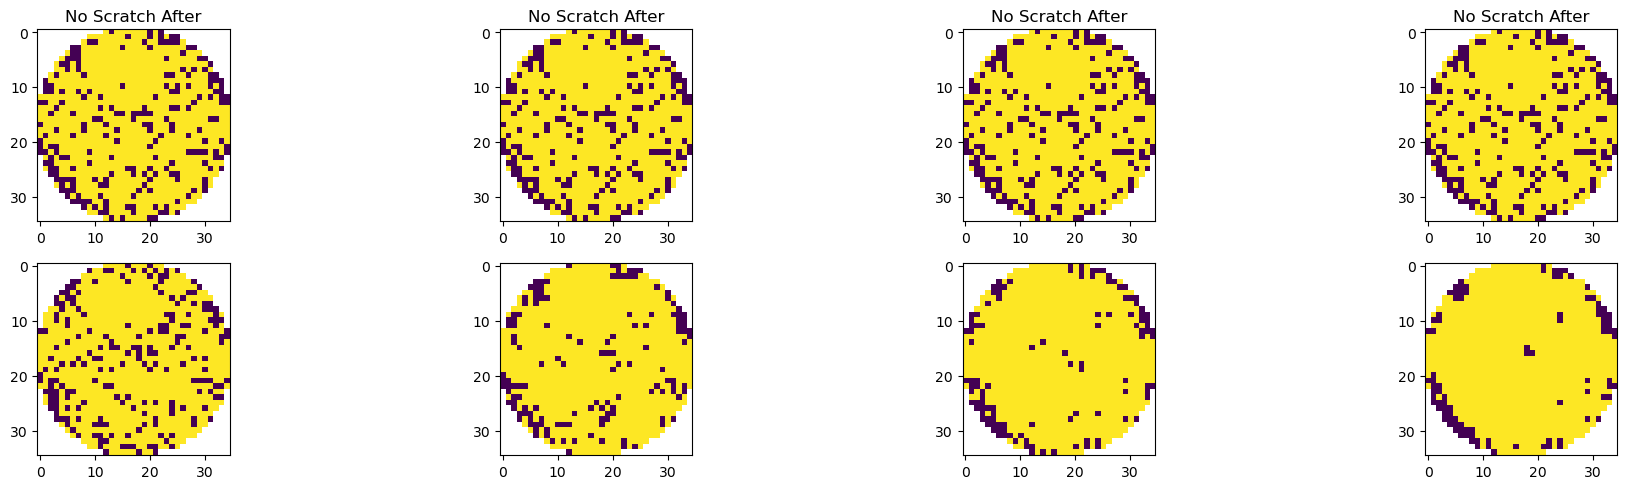

In [35]:
# Randomly Selecting--> Wafer without scratch
trial_df = df_wafers[df_wafers['WaferName'] == '8203ce']
circle_mold= df_to_array(trial_df)
pad_length = 1
circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 5))
for j in range(2,10,2):
    pred_lst = []
    for i in trial_df.index:

        x_coord = trial_df.loc[i,'DieX'] + pad_length
        y_coord = trial_df.loc[i,'DieY'] + pad_length 
        
        top = circle_mold[x_coord,y_coord+1]
        bottom = circle_mold[x_coord,y_coord-1]
        right = circle_mold[x_coord+1,y_coord]
        left = circle_mold[x_coord-1,y_coord]
        top_right = circle_mold[x_coord+1,y_coord+1]
        top_left = circle_mold[x_coord-1,y_coord+1]
        bottom_right = circle_mold[x_coord+1,y_coord-1]
        bottom_left = circle_mold[x_coord-1,y_coord-1]


        neighbour_lst = [top,bottom,right,left,top_right,top_left,bottom_right,bottom_left]
        
        prediction = mode(rd.sample(neighbour_lst,j))

        pred_lst.append(prediction)

    trial_df['filtered_values'] = pred_lst
    trial_df['filtered_values'].fillna(1, inplace=True)
    
    no_scratch_image_before = create_image_without_scratch(trial_df, False)
    no_scratch_image_after = create_image_without_scratch(trial_df, True)


    axes[0,int(j/2)-1].imshow(no_scratch_image_before)
    axes[0,int(j/2)-1].set_title('No Scratch Before')
    axes[1,int(j/2)-1].imshow(no_scratch_image_after)
    axes[0,int(j/2)-1].set_title('No Scratch After')
plt.tight_layout()

##### 1.2.3 Initial Findings

The first thing to notice is that the speed taken to produce the results is much faster then doing LOO KNN. It also appears that either 2/3 neighbours provides a good balance between filtering out noise and filtering out the required dies. 

##### 1.2.4 Function

In [36]:
def self_knn_feature(main_df, num_neighbours):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :num_neighbours: Int, This is an Integer that specifies how many neighbours to analyse in the calculations. 

    return: List of Knn predictions per die
    """
    total_pred_lst = []
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        
        circle_mold= df_to_array(group_df)
        pad_length = 1
        circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))   
        
        pred_lst = []
        for i in group_df.index:
            
            x_coord = group_df.loc[i,'DieX'] + pad_length
            y_coord = group_df.loc[i,'DieY'] + pad_length 
            
            top = circle_mold[x_coord,y_coord+1]
            bottom = circle_mold[x_coord,y_coord-1]
            right = circle_mold[x_coord+1,y_coord]
            left = circle_mold[x_coord-1,y_coord]
            top_right = circle_mold[x_coord+1,y_coord+1]
            top_left = circle_mold[x_coord-1,y_coord+1]
            bottom_right = circle_mold[x_coord+1,y_coord-1]
            bottom_left = circle_mold[x_coord-1,y_coord-1]


            neighbour_lst = [top,bottom,right,left,top_right,top_left,bottom_right,bottom_left]

            prediction = mode(rd.sample(neighbour_lst,num_neighbours))

            pred_lst.append(prediction)

        total_pred_lst.extend(pred_lst)
    
    return np.nan_to_num(np.array(total_pred_lst), nan=1)

In [37]:
if training_run:
    self_knn_feature = self_knn_feature(df_wafers, 3)
    np.save('self_knn_feature.npy',self_knn_feature )
else:
    self_knn_feature = np.load('self_knn_feature.npy')

#### Feature 1.3: Unsupervised Clustering: DBSCAN

##### 1.3.1: Explanation

The next strategy was to move from a supervised structure of classification to an unsupervised structure, hoping that a Density based approach might work. The assumption is that bad dies that belong to scratches are clustered together, and that a density based scan such as DBSCAN should be able to identify these scratch clusters.

##### 1.3.2: Proof Of Cocnept

Prediction clusters
(array([-1], dtype=int64), array([3205], dtype=int64))


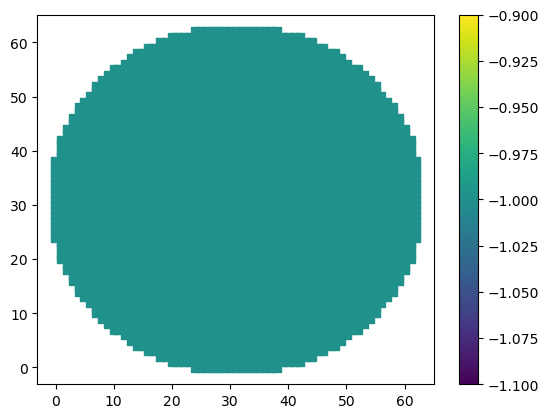

In [38]:
# DBSCAN

# Create trial Wafer
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']

#Instatiate and Fit Model
clustering = DBSCAN(eps=0.95, min_samples=2).fit(trial_df.loc[:,["DieX","DieY"]].values)

# Analyse predictions
clstr_labels = clustering.labels_
print("Prediction clusters")
print(np.unique(clstr_labels, return_counts=True))

# Plot predicitons
trial_df['specteral_labels'] = clstr_labels
plt.scatter(x= trial_df.loc[:,"DieX"], y=trial_df.loc[:,"DieY"], marker='s', c=trial_df.loc[:,"specteral_labels"] )
plt.colorbar()

The above graph is not surprising, as the majority class is good die and therefore it classified everything into one class. Perhaps only looking at bad die clusters might help. Below is a trial with only bad dies, changing the epsilon and min_sample hyperparamters to see if there is any potential in this approach.

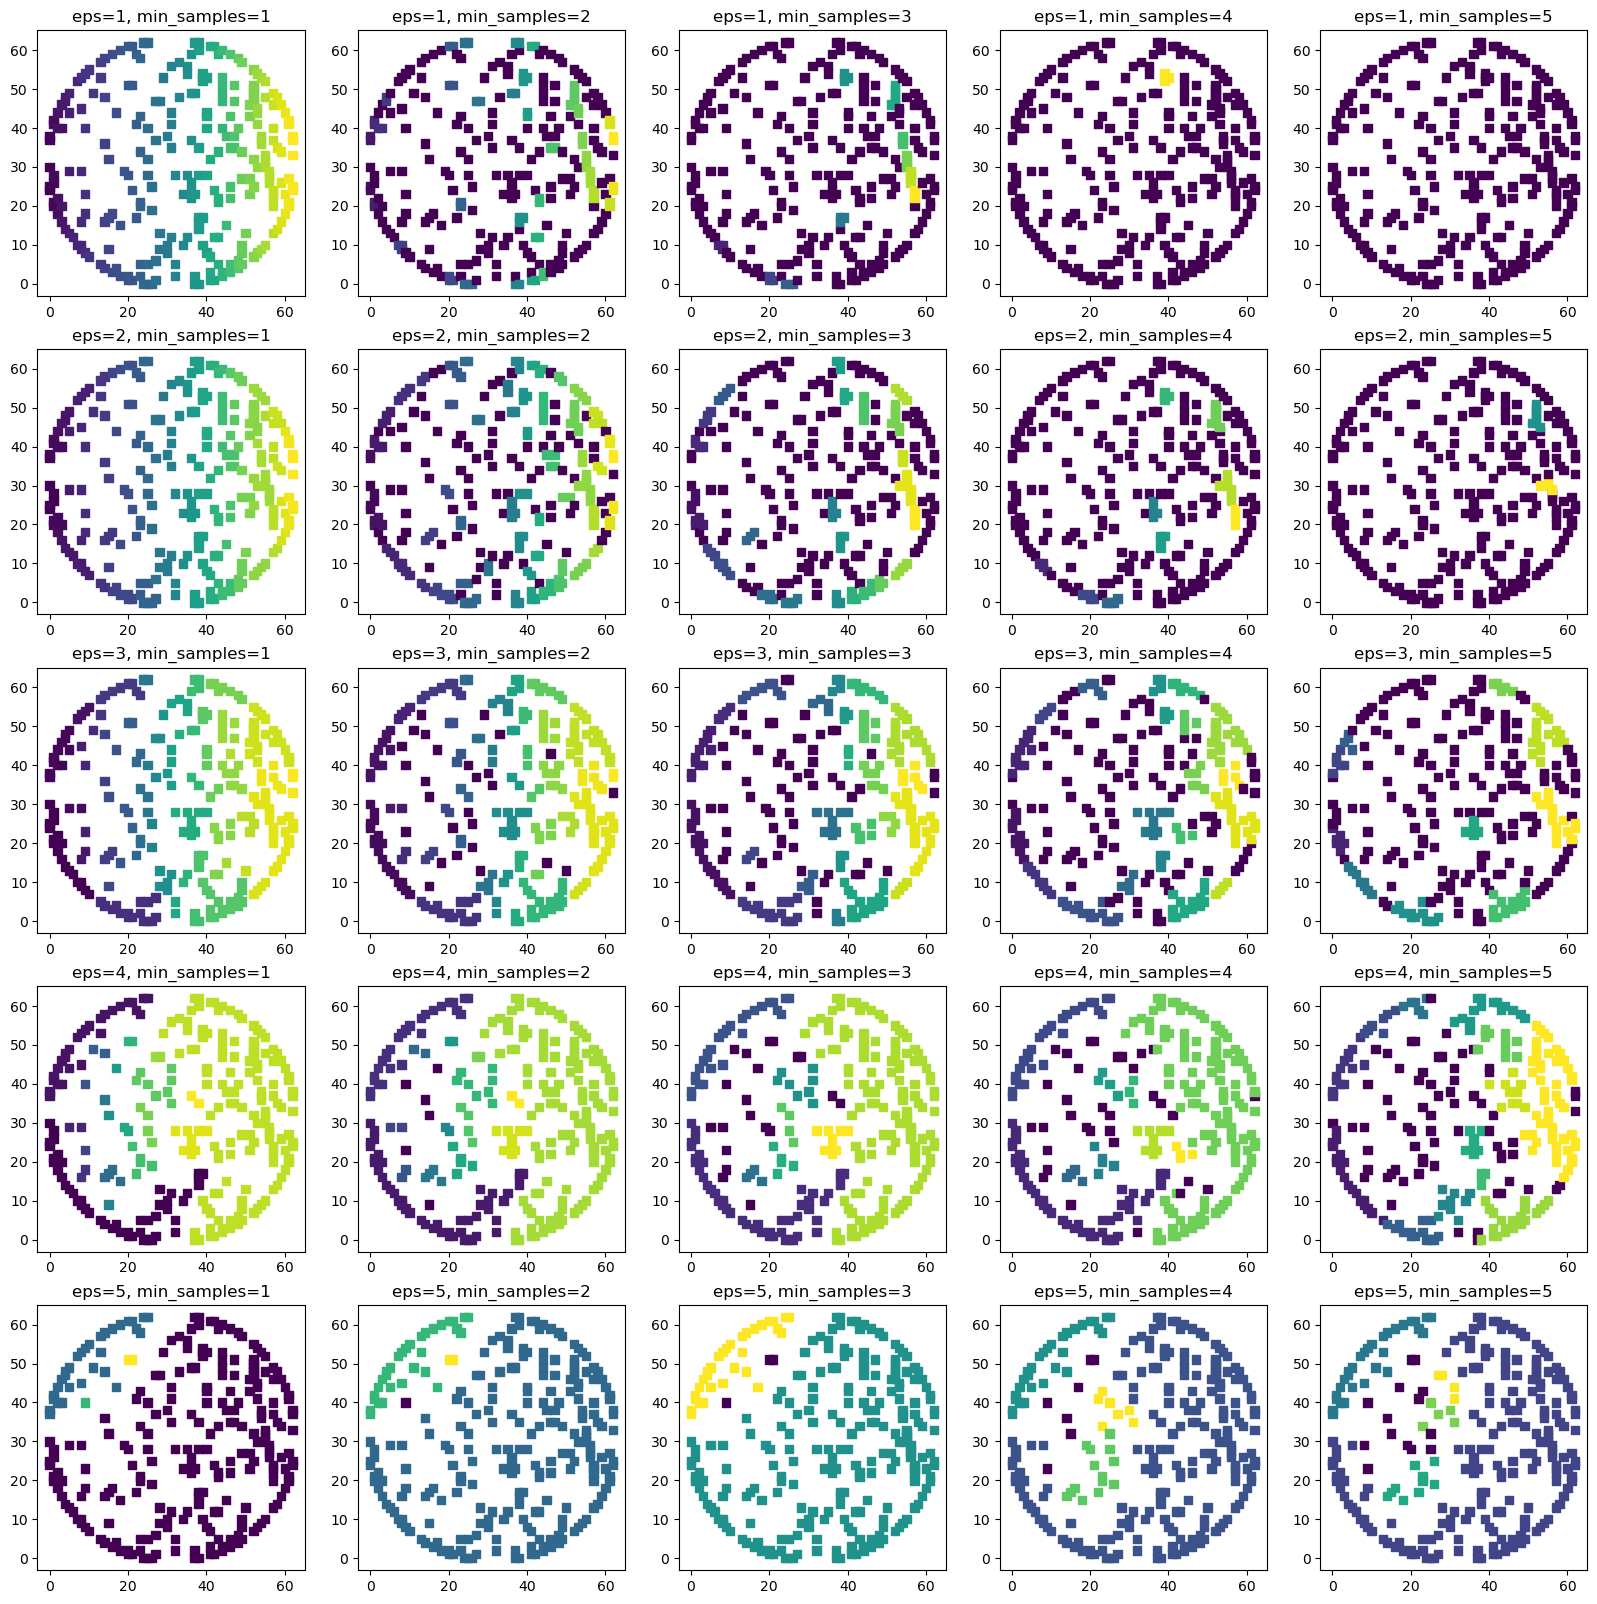

In [39]:
# Try with DBSCAN only bad
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
# Create trial Wafer
trial_df = df_wafers[(df_wafers['WaferName'] == '6fc7e9') & (df_wafers['IsGoodDie'] == 0)]

for row_num in range(1,6):
    for colum_num in range(1,6):

        # Instatiate and Fit Model
        clustering = DBSCAN(eps=row_num, min_samples=colum_num).fit(trial_df.loc[:,["DieX","DieY"]].values) # trial_df['DieX'].max()/30

        # Analyse predictions
        clstr_labels = clustering.labels_

        # Plot predicitons
        trial_df['specteral_labels'] = clstr_labels
        axes[row_num-1,colum_num-1].scatter(x= trial_df.loc[:,"DieX"], y=trial_df.loc[:,"DieY"], marker='s', c=trial_df.loc[:,"specteral_labels"] )
        axes[row_num-1,colum_num-1].set_title(f'eps={row_num}, min_samples={colum_num}')
        # plt.colorbar()

##### 1.3.3: Initial Findings

The unsupervised DBSCAN approach with bad dies only appears to be promising when using a suitable epsilon and mimimum_num hyperparamaters. It is able to effectively identify isolated bad dies while still finding the scatch cluster. However it still identifes clusters of bad dies that are not in scratches and considering we are only analysing bad dies, it will not find any ink dies. 

##### 1.3.4: Function

In [40]:
def db_filter_function(main_df,eps,min_samples):
    """
    Will classify enable a filtering of Dies, through density based clustering. 
    
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :eps: Int, The radius of the search per node.
    :min_samples: Int, The number of nodes analysed per search. 
    
    Return: Label indicating status of Die.  
    """
    total_clstr_labels_lst = []
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        group_df.reset_index(drop=True, inplace=True)
        
        # Only let bad dies enter the dbscan
        group_df_bad = group_df[group_df['IsGoodDie'] == 0]
        
        # Instatiate and Fit Model
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        clustering.fit(group_df_bad.loc[:,["DieX","DieY"]].values)

        # Analyse predictions
        clstr_labels = clustering.labels_
        clstr_labels_lst = []
        
        # Instataite value to align labels with bad values
        bad_count = 0
        # Iterate through data frame aligning values with predictions
        for i in group_df.index:
            die_val = group_df.loc[i,'IsGoodDie']
            # Classify good vals as -1, (WIll affect ink predicitons)
            if die_val == 1:
                clstr_labels_lst.append(0)
            else:
                current_label = clstr_labels[bad_count]
                # Remove other group values, either in a cluster or an outlier 
                if current_label != -1:
                    current_label = 1
                else:
                    current_label = 0

                clstr_labels_lst.append(current_label)
                bad_count +=1 
        # Append values
        total_clstr_labels_lst.extend(clstr_labels_lst)
    
    return total_clstr_labels_lst

In [41]:
if training_run:
    db_vals_feature = db_filter_function(df_wafers,1,min_samples=3)
    np.save('db_vals_feature.npy',db_vals_feature)
else:
    db_vals_feature = np.load('db_vals_feature.npy')

In [42]:
uniques, counts = np.unique(np.array(db_vals_feature), return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(db_vals_feature)))
print("Percentage split between Good and Bad Dies according to DBSCAN Clustering")
percentages

Percentage split between Good and Bad Dies according to DBSCAN Clustering


{0: 97.22243951440285, 1: 2.7775604855971454}

#### Feature 1.4: Unsupervised Clustering: OPTICS

##### 1.4.1: Explanation

Seeing the promising results of DBSCAN I thought it might be wise to attemp a different unsupervised clustering algorithm on only the bad Dies and see if there are any good results

##### 1.4.2: Proof Of Concept

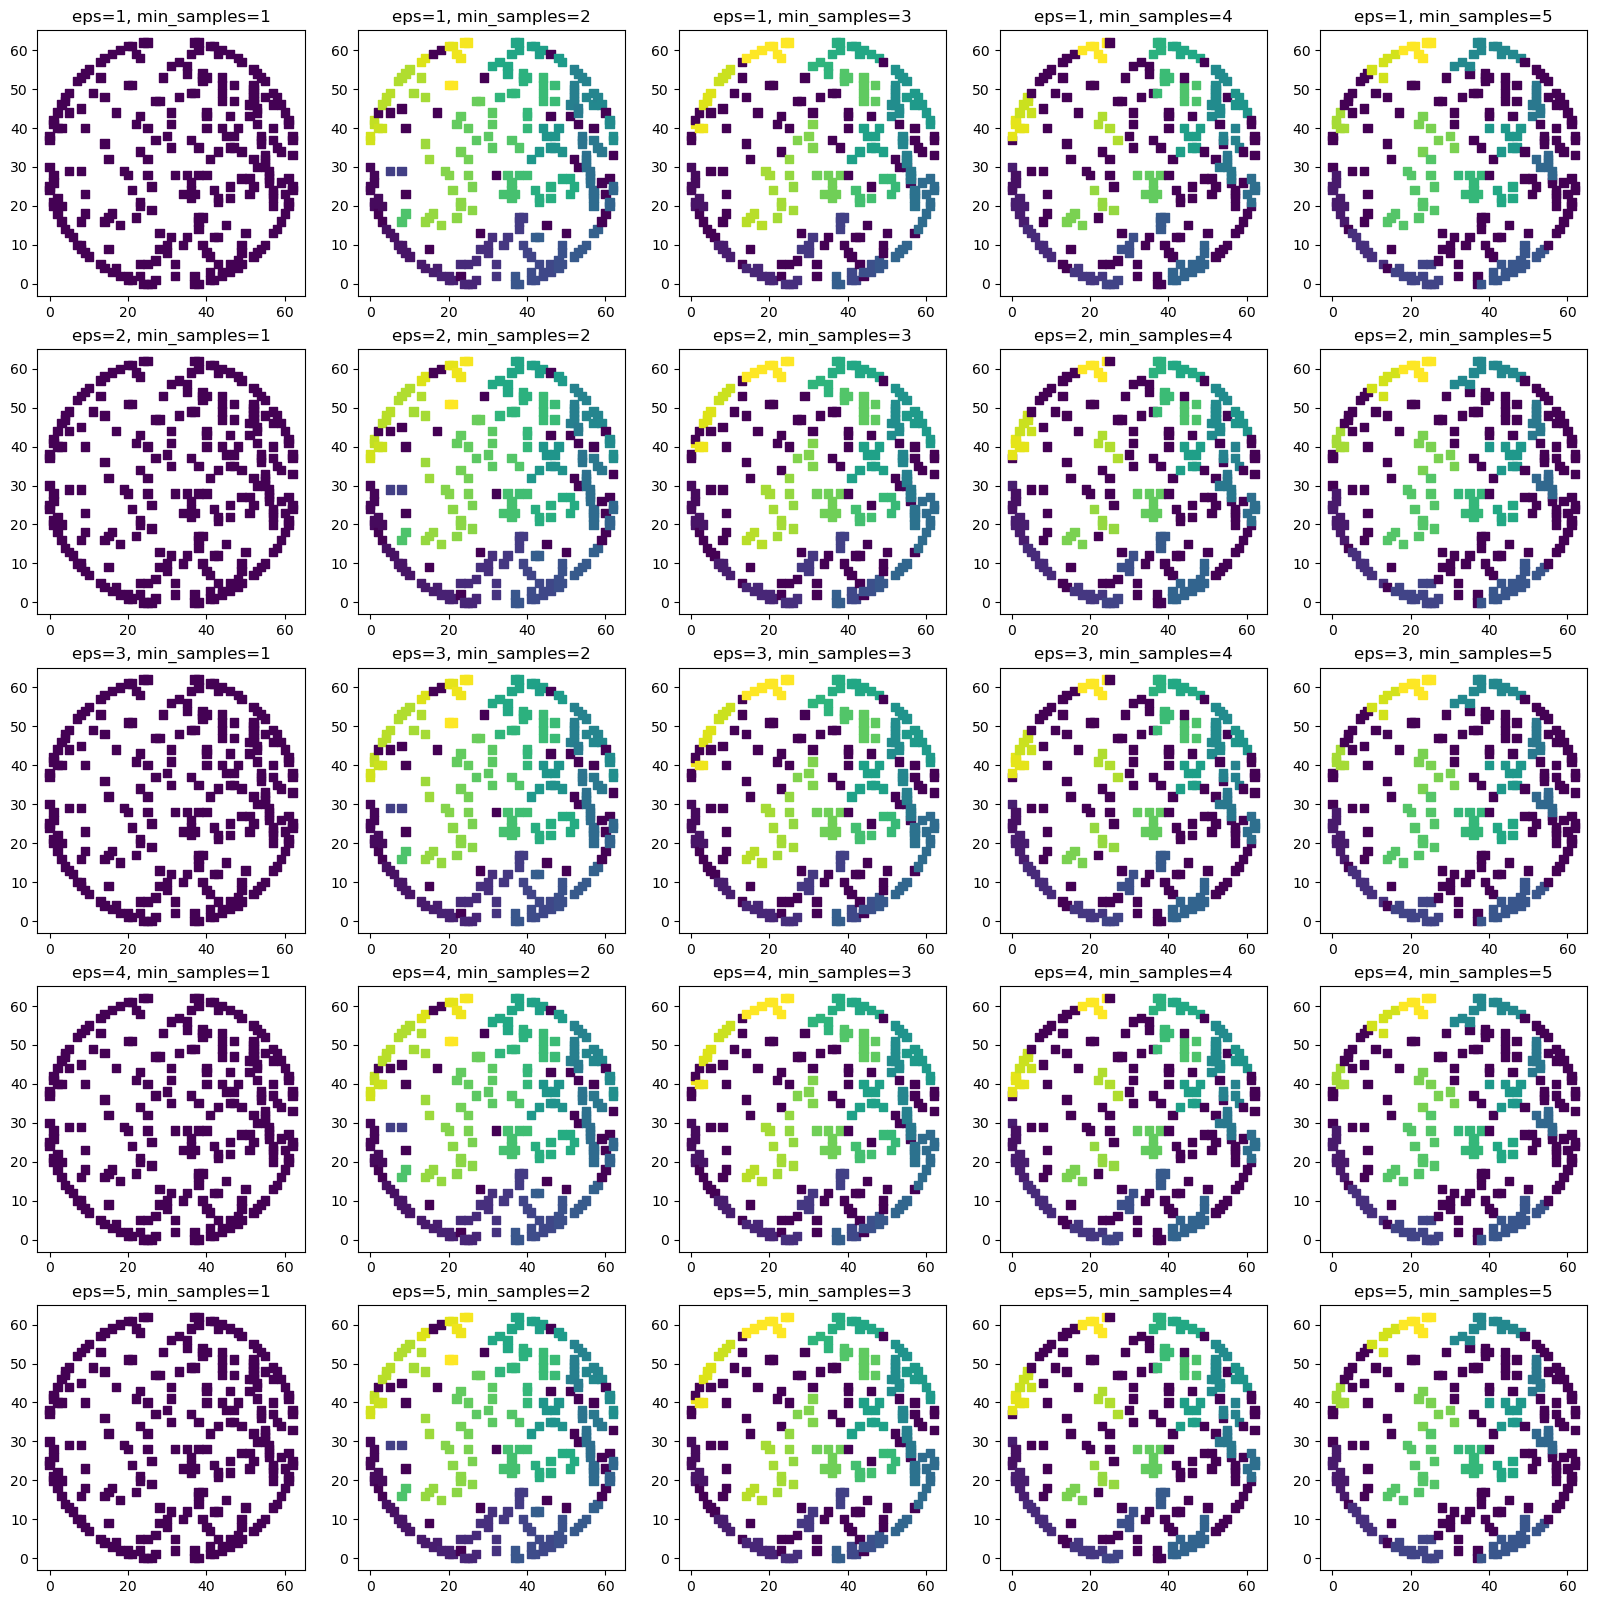

In [43]:
# Try with DBSCAN only bad

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
# Create trial Wafer
trial_df = df_wafers[(df_wafers['WaferName'] == '6fc7e9') & (df_wafers['IsGoodDie'] == 0)]

for row_num in range(1,6):
    for colum_num in range(1,6):

        # Instantiate and Fit Model
        clustering = OPTICS(eps=row_num, min_samples=colum_num).fit(trial_df.loc[:,["DieX","DieY"]].values) # trial_df['DieX'].max()/30

        # Analyse predictions
        clstr_labels = clustering.labels_

        # Plot predicitons
        trial_df['specteral_labels'] = clstr_labels
        axes[row_num-1,colum_num-1].scatter(x= trial_df.loc[:,"DieX"], y=trial_df.loc[:,"DieY"], marker='s', c=trial_df.loc[:,"specteral_labels"] )
        axes[row_num-1,colum_num-1].set_title(f'eps={row_num}, min_samples={colum_num}')
        # plt.colorbar()

##### 1.4.3: Initial Findings

This algorithm did not return as good results as DBSCAN. In the first colum, when min_samples=1, everything was classidief as 1 class. In the remaining columns, while it did occasionally correctly cluster the scratch it was not as effective at filtering the isolated dies. Since this is finding many clusters, many of which are not scratches and not finding the isolated bad dies, I dont think i will be progressing with the OPTICS approach.

### Feature 2: Isolate Scatch in Filtered Data

#### 2.1: Explanation

Filtering the graphs and removing the noisy bad dies has allowed for the production of cleaner images that may allow for the easier isolation of scratches. Going from the red and green wafer images presented above to the image presented below, outlines the rationale for this approach. There were two attempts made at isolating the scratch in the filtered wafer.

1- Fitting a linear regression line

2- Haugh edge detection

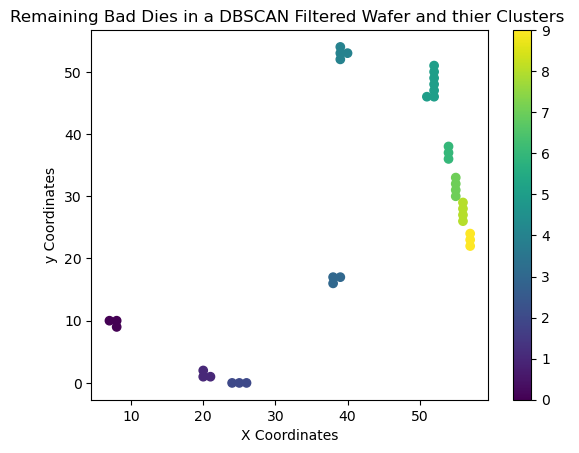

In [44]:
# Select a Wafer with a Scratch
trial_df = df_wafers[(df_wafers['WaferName'] == '6fc7e9') & (df_wafers['IsGoodDie'] == 0)]

# Instatiate and Fit DBSCAN Model
clustering = DBSCAN(eps=1, min_samples=3).fit(trial_df.loc[:,["DieX","DieY"]].values) # trial_df['DieX'].max()/30
clstr_labels = clustering.labels_

# Plot predicitons
trial_df['specteral_labels'] = clstr_labels

# Remove all isolated bad dies
trial_df_filterd = trial_df[trial_df['specteral_labels'] != -1]

# Plot remaining dies and their cluster predictions
circle_mold = df_to_array(trial_df_filterd)
plt.scatter(x=trial_df_filterd['DieX'], y=trial_df_filterd['DieY'], c =trial_df_filterd['specteral_labels'] )
plt.title('Remaining Bad Dies in a DBSCAN Filtered Wafer and thier Clusters ')
plt.xlabel('X Coordinates')
plt.ylabel('y Coordinates')
plt.colorbar()


The above graph is a representation of the filtered dies remaining after the dbscan approach

#### Feature 2.1: Fitting A Regression Line 

##### 2.1.1: Explanation

The motivation of this feature was to try and see if we can isolate a line from the DBSCAN filtered dies. Initially there were too many Bad dies, many of which were noise, which would make fitting a regression line quite tough. However, with the filtered data and less noise present, perhaps a regression line can be fitter. If one can be fitted there it might lie accross the scratch providing a great feature to classify scratches. 

##### 2.1.2: Proof Of Concept

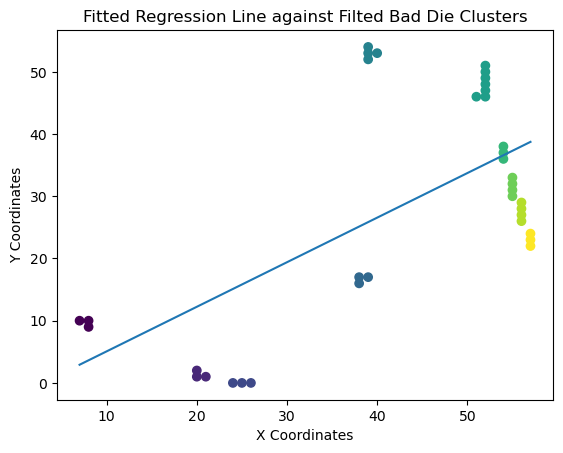

In [45]:
# Select the x and y coordinates
x= trial_df_filterd['DieX'].values.reshape(-1, 1)
y= trial_df_filterd['DieY'].values.reshape(-1, 1)

# Instatiate and fit a linear regression model
reg = LinearRegression().fit(x, y)
y_preds = reg.predict(trial_df_filterd['DieX'].values.reshape(-1, 1))

# Plot the regression line against the filtered bad dies
plt.scatter(x=trial_df_filterd['DieX'], y=trial_df_filterd['DieY'], c =trial_df_filterd['specteral_labels'] )
plt.plot(trial_df_filterd['DieX'].values.reshape(-1, 1), y_preds)
plt.title('Fitted Regression Line against Filted Bad Die Clusters')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

##### 2.1.3: Initial Findings

As we can see this approach does not work. The model was not able to produce a regression line that was able to align with the scratch. The reason being that the filterd wafer is still too noisy and the algorithm needs to consider the distance to the noise aswell. Creting a regression for each cluster does not help as this feature was intended to isolate the scatch in the remaining points. 

#### Feature 2.2: Using Hoigh Edge Detection

##### 2.2.1: Explanation

Since the filtered wafer can be converted into an array and image, it may be worth attempting a traditional edge detection algorithm used in images to see if the scratch line can be detected. However the drawback of this approach is that some scratch are very curved and not scratched at all. 

##### 2.2.2: Proof of Concept

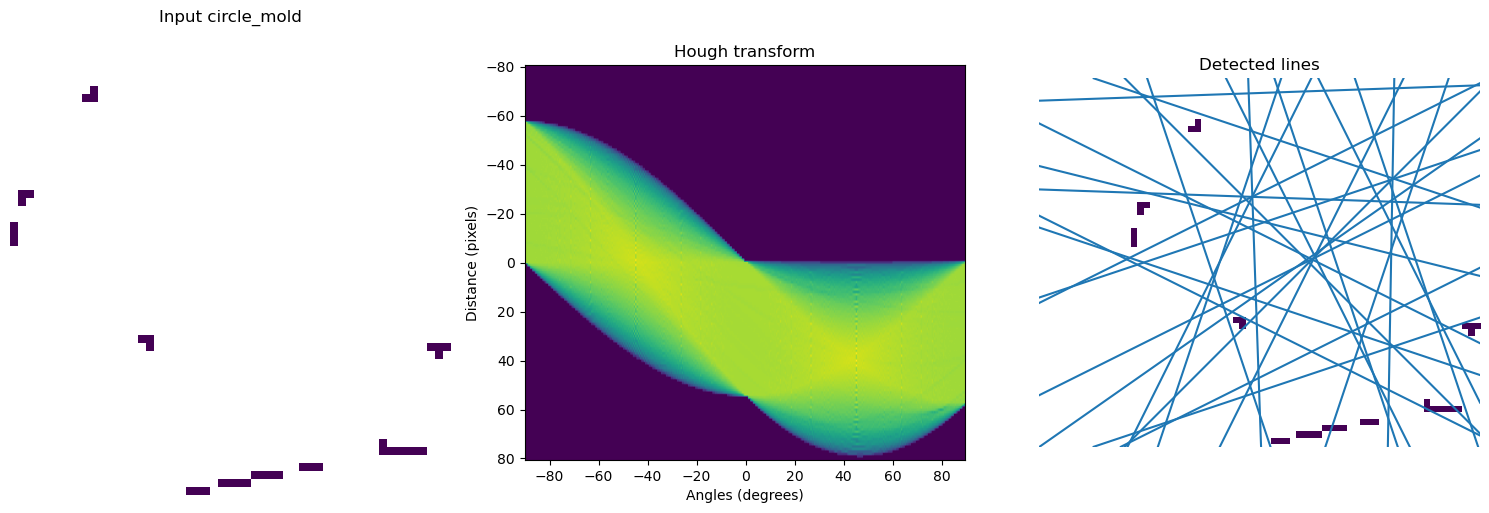

In [46]:
# Convert df representation of wafer to a Matrix
circle_mold = df_to_array(trial_df_filterd)

# Choose the number of line to check and the angle range
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)

# Detect Edges 
h, theta, d = hough_line(circle_mold, theta= tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

# Plot the filtered wafer
ax[0].imshow(circle_mold)
ax[0].set_title('Input circle_mold')
ax[0].set_axis_off()

# Plot the hough transform
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

# Plot the detected lines on the wafer
ax[2].imshow(circle_mold)
ax[2].set_ylim((circle_mold.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for h, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

While the Hough transform does seem to show two conentrated points, which suggests two lines have been found, the detected line graph speaks otherwise . . . the next step is to try changing the number of lines analysed per point to see if there is any potential here.

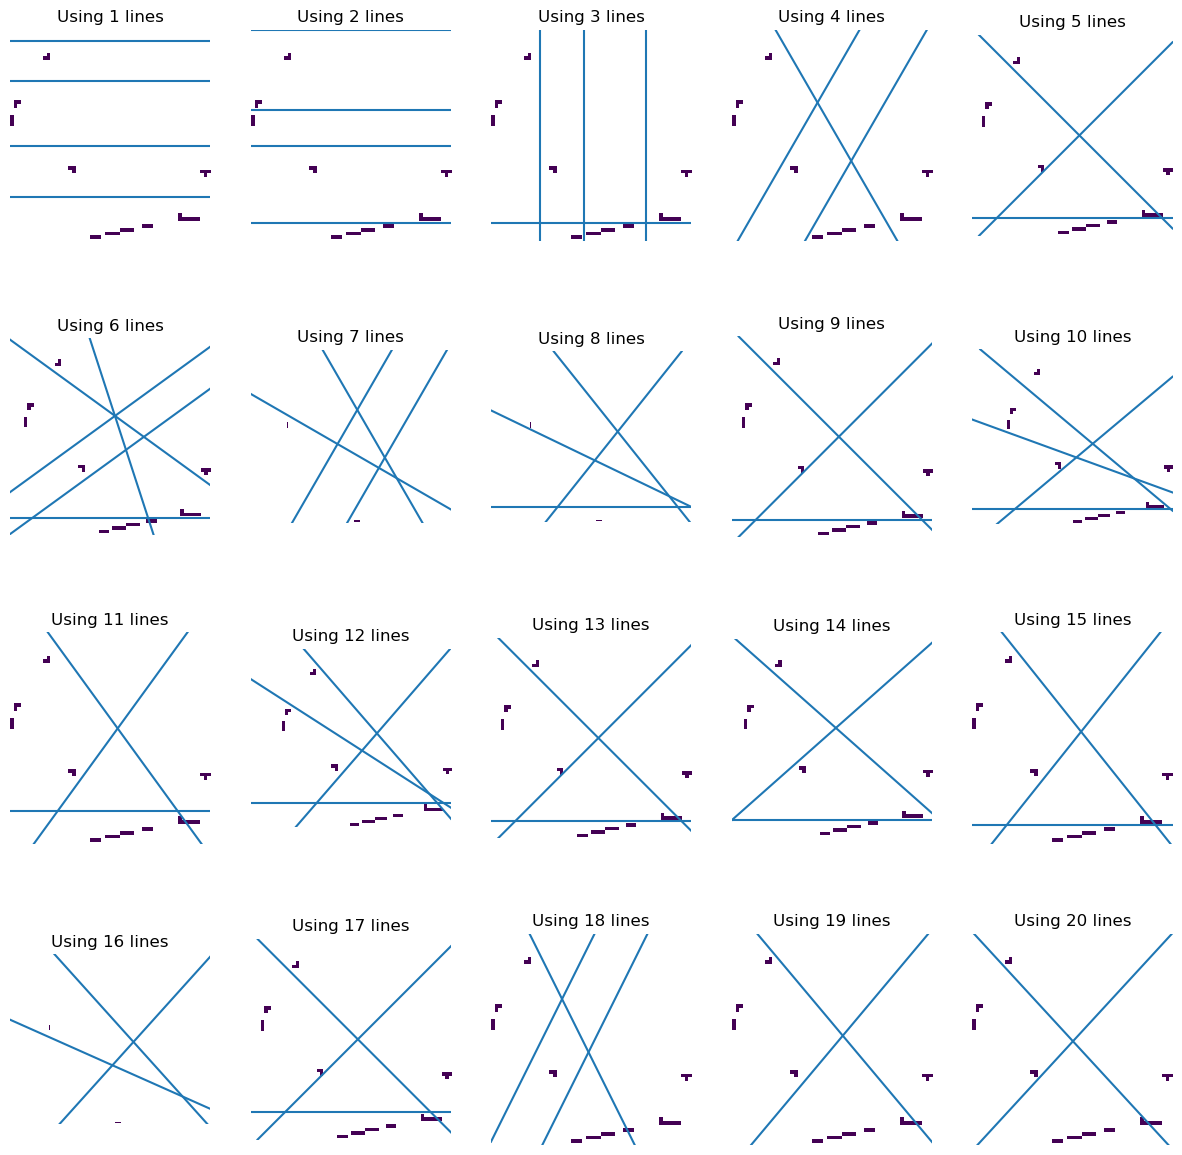

In [47]:
# Checl to see if changing the number of lines checked helps
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
axes = axes.ravel()

# Iterate through the total number of lines checked per point
for i in range(1,21):

    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, i)
    h, theta, d = hough_line(circle_mold, tested_angles)

    axes[i-1].imshow(circle_mold)
    axes[i-1].set_ylim((circle_mold.shape[0], 0))
    axes[i-1].set_axis_off()
    axes[i-1].set_title(f'Using {i} lines')

    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
        axes[i-1].axline((x0, y0), slope=np.tan(angle + np.pi/2))

##### 2.2.3: Initial Findings

While most of the above graphs have identified the horizontal line which overlaps with the scratch, they also identified many lines that were not there. This makes me believe that there is potential in this method, but in its current stage it is not something I would put my confidence in and proceede with. 

### Feature 3: Normalized Distance From Centre

#### 3.1 Explanation

Feature 3, is the normalized distance from the centre wafer. The motivation was to attempt to see if there are any patterns that emerge in relation to the position of good and bad Dies and Scratches on the wafer, by overcoming the size disparities. Each wafer has its own unique size, however they all have the same shape, as such this feature is intended to try and represent each wafer on the same size, to try and find any patterns to the location of the defects. This feature was created by normalizng the size of the wafer, between the ranges -1,1, with the centre of the cirle having coordinaes 0,0. The feature would be the normalized distance from the centre of the wafer, with negative values being to the left and bottom of the centre. 

#### 3.2 Proof of Concept

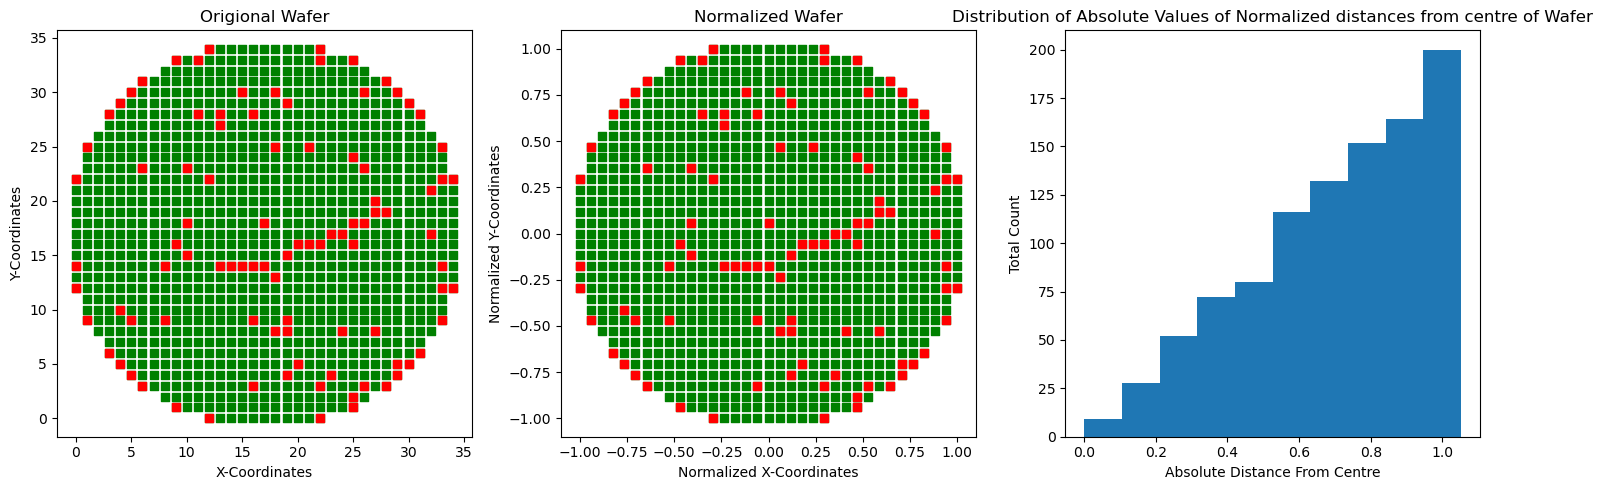

In [48]:
# Normalize and plot the Wafer and Plot the distribution of absolute distances from the centre

# Select one wafer
df_trial = df_wafers[df_wafers['WaferName'] == '3b2e28']

# Normalize the X-Direction
scaler = MinMaxScaler(feature_range= (-1,1))
distance_from_centre_X = scaler.fit_transform(np.array(df_trial['DieX'] - df_trial['DieX'].max()/2).reshape(-1, 1))

# Normalize the Y-Direction
scaler = MinMaxScaler(feature_range= (-1,1))
distance_from_centre_Y = scaler.fit_transform(np.array(df_trial['DieY'] - df_trial['DieY'].max()/2).reshape(-1, 1))

# Add the Normalized values to origional DataFrame
df_trial['NormalDistX'] = distance_from_centre_X
df_trial['NormalDistY'] = distance_from_centre_Y

# Plot the Normalized wafer, and the Distance Distributions

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(df_trial['DieX'], df_trial['DieY'], color = 'green', marker='s')
axes[0].set_xlabel("X-Coordinates")
axes[0].set_ylabel("Y-Coordinates")
axes[0].set_title("Origional Wafer")
bad_bins = df_trial.loc[df_trial['IsGoodDie'] == 0]
axes[0].scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s')


axes[1].scatter(df_trial['NormalDistX'], df_trial['NormalDistY'], color = 'green', marker='s')
axes[1].set_xlabel("Normalized X-Coordinates")
axes[1].set_ylabel("Normalized Y-Coordinates")
axes[1].set_title("Normalized Wafer")
axes[1].scatter(bad_bins['NormalDistX'], bad_bins['NormalDistY'], color = 'red', marker='s')

# Formula for the distance
# (np.array(df_trial['NormalDistX'])**2 + np.array(df_trial['NormalDistY'])**2)**0.5

# Show the distribution of the distances
axes[2].hist((np.array(df_trial['NormalDistX'])**2 + np.array(df_trial['NormalDistY'])**2)**0.5)
axes[2].set_title("Distribution of Absolute Values of Normalized distances from centre of Wafer")
axes[2].set_xlabel("Absolute Distance From Centre")
axes[2].set_ylabel("Total Count")
plt.tight_layout()
plt.show()

df_trial['DistanceFromCentre'] = (np.array(df_trial['NormalDistX'])**2 + np.array(df_trial['NormalDistY'])**2)**0.5

As we can see above, the wafer has been normalised and retained the pattern of the good and bad dies.

In [49]:
# Get the normal distances for the entire data Set
# Copy the data
df_wafers_copy = df_wafers.copy()

# Instatiate empty lists
normal_dist_x = []
normal_dist_y = []
total_distance_lst = []

# Normalize distances per wafer
for name, df_group in tqdm(df_wafers_copy.groupby('WaferName')):

    #Scale the X Distances
    scaler = MinMaxScaler(feature_range= (-1,1))
    distance_from_centre_X = scaler.fit_transform(np.array(df_group['DieX'] - df_group['DieX'].max()/2).reshape(-1, 1))
    distance_from_centre_X = [float(i) for i in distance_from_centre_X]
    
    # Scale the Y Distances
    scaler = MinMaxScaler(feature_range= (-1,1))
    distance_from_centre_Y = scaler.fit_transform(np.array(df_group['DieY'] - df_group['DieY'].max()/2).reshape(-1, 1))
    distance_from_centre_Y = [float(i) for i in distance_from_centre_Y]
    
    # Add distances for DF
    df_group['NormalDistX'] = distance_from_centre_X
    df_group['NormalDistY'] = distance_from_centre_Y

    # Add Results to outside list
    normal_dist_x.extend(distance_from_centre_X)
    normal_dist_y.extend(distance_from_centre_Y)

    # Calculate Total distance from centre of circle
    total_distance_lst.extend( (np.array(df_group['NormalDistX'])**2 + np.array(df_group['NormalDistY'])**2)**0.5 )

df_wafers_copy['TotalDistanceCentre'] = np.array(total_distance_lst)
df_wafers_copy['NormalDistX'] = np.array(normal_dist_x)  
df_wafers_copy['NormalDistY'] = np.array(normal_dist_y)  

100%|██████████| 3920/3920 [00:12<00:00, 303.00it/s]


Text(0.5, 0.98, 'Heat Map of Location of Good and Bad Dies With Normalized Distances')

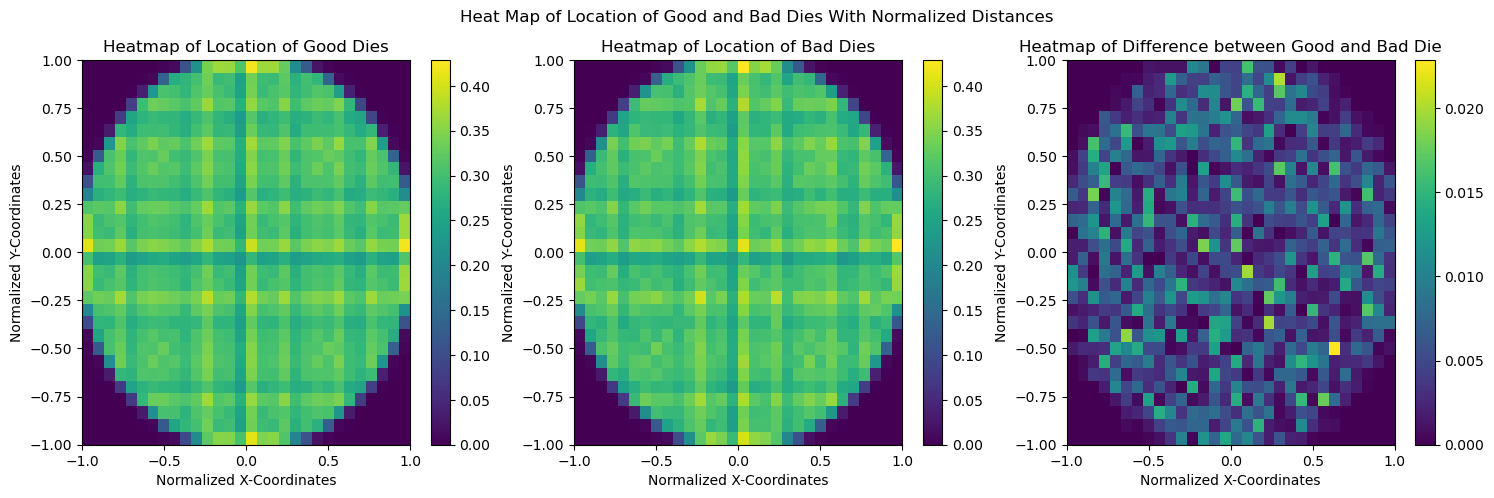

In [50]:
# Plot Difference if frequency of location of Good and Bad Dies on Normalized Wafers

# Seperate the Data set into good and Bad Dies
good_die = df_wafers_copy[df_wafers_copy['IsGoodDie'] == 1]
not_good_die = df_wafers_copy[df_wafers_copy['IsGoodDie'] == 0]

# Get the 2d histogram for good and bad dies
z_good_die, xedges_die, yedges_diexedges_die = np.histogram2d(good_die['NormalDistX'], good_die['NormalDistY'], density=True, bins = 30)
Z_non_good_die, xedges_non_diexedges_die, yedges_non_diexedges_die = np.histogram2d(not_good_die['NormalDistX'], not_good_die['NormalDistY'], density=True, bins = 30)

# Plot The graphs
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot the Density distribution of the good Dies
pcm = axes[0].pcolormesh(xedges_die, yedges_diexedges_die, z_good_die.T, vmax = np.max((z_good_die,Z_non_good_die)))
axes[0].title.set_text('Heatmap of Location of Good Dies')
axes[0].set_xlabel("Normalized X-Coordinates")
axes[0].set_ylabel("Normalized Y-Coordinates")
fig.colorbar(pcm, ax=axes[0])

# Plot the Density distribution of the Bad Dies
pcm = axes[1].pcolormesh(xedges_non_diexedges_die, yedges_non_diexedges_die, Z_non_good_die.T,vmax = np.max((z_good_die,Z_non_good_die)))
axes[1].title.set_text('Heatmap of Location of Bad Dies')
axes[1].set_xlabel("Normalized X-Coordinates")
axes[1].set_ylabel("Normalized Y-Coordinates")
fig.colorbar(pcm, ax=axes[1])

# Plot the Density distribution of the difference between the good and bad dies
pcm = axes[2].pcolormesh(xedges_non_diexedges_die, yedges_non_diexedges_die, abs(Z_non_good_die.T-z_good_die.T))
axes[2].title.set_text('Heatmap of Difference between Good and Bad Die')
axes[2].set_xlabel("Normalized X-Coordinates")
axes[2].set_ylabel("Normalized Y-Coordinates")
fig.colorbar(pcm, ax=axes[2])
fig.suptitle('Heat Map of Location of Good and Bad Dies With Normalized Distances')


Text(0.5, 0.98, 'Heat Map of Location of Scratch and Non-Scratch Dies With Normalized Distances')

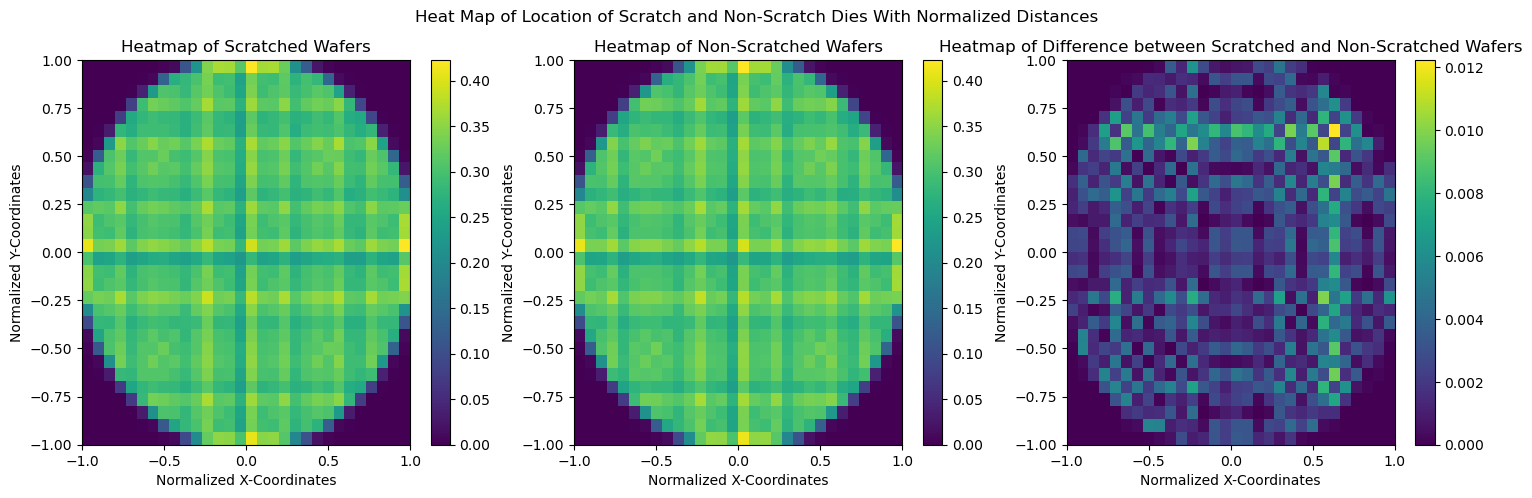

In [51]:
# Plot Difference if frequency of location of bewtween Wafers with and Without A Scratch

# Seperate the Data set into with Scratch and Without Scratch
scratch_df = df_wafers_copy[df_wafers_copy['WaferScratch'] == 1]
non_scratch_df = df_wafers_copy[df_wafers_copy['WaferScratch'] == 0]

# Get the 2d histogram for good and bad dies
Z_scratch, xedges_scratch, yedges_scratch = np.histogram2d(scratch_df['NormalDistX'], scratch_df['NormalDistY'], density=True, bins = 30)
Z_non_scratch, xedges_non_scratch, yedges_non_scratch = np.histogram2d(non_scratch_df['NormalDistX'], non_scratch_df['NormalDistY'], density=True, bins = 30)

# Plot The graphs
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot the Density distribution of wafers with a scatch
pcm =axes[0].pcolormesh(xedges_scratch, yedges_scratch, Z_scratch.T, vmax = np.max((Z_scratch,Z_non_scratch)))
axes[0].title.set_text('Heatmap of Scratched Wafers')
axes[0].set_xlabel("Normalized X-Coordinates")
axes[0].set_ylabel("Normalized Y-Coordinates")
fig.colorbar(pcm, ax=axes[0])

# Plot the Density distribution of wafers without a scatch
pcm= axes[1].pcolormesh(xedges_non_scratch, yedges_non_scratch, Z_non_scratch.T, vmax = np.max((Z_scratch,Z_non_scratch)))
axes[1].title.set_text('Heatmap of Non-Scratched Wafers')
axes[1].set_xlabel("Normalized X-Coordinates")
axes[1].set_ylabel("Normalized Y-Coordinates")
fig.colorbar(pcm, ax=axes[1])

# Plot the Density distribution of the difference between the wafers with and without a scatch
pcm = axes[2].pcolormesh(xedges_non_scratch, yedges_non_scratch, abs(Z_non_scratch.T-Z_scratch.T))
axes[2].title.set_text('Heatmap of Difference between Scratched and Non-Scratched Wafers')
axes[2].set_xlabel("Normalized X-Coordinates")
axes[2].set_ylabel("Normalized Y-Coordinates")
fig.colorbar(pcm, ax=axes[2])
fig.suptitle('Heat Map of Location of Scratch and Non-Scratch Dies With Normalized Distances')

#### 3.3 Initial Findings

As we can see above, it is possible to normalize the wafer coordinates and there appears to be two interesting patterns. When looking at the Frequency of Good and Bad Dies, There are a few locations that have a higher frequency, suggesting that perhaps there is a higher chance of a Bad die appearing in certain location. Another intersting find is that there also appears to be two bright lines in the Scratch/Non Scratch Histogram. The fact that the hotspots appear in a line is a good sign as it appears to behave more like a scratch, which suggests that there may be some information hidden in the normailzed distances. Another intersting finding was that there are two different patterns emerging in the two different heatmaps. This may suggest that scratches are independant from bad dies. Consequently I would like to proceed with the production of these features and import them into the models for further testing. However, the differences may be hightened due to their color, but could be misleeding when the scale on the colormap is considered. 

#### 3.4 Function

In [52]:
# Function to Add the Normalized coordinates and Distances to the Main DataFrame

def normalized_distance_features(main_df):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.

    Return: List of normalized distances from centre. Each value is a distance per Die. 
    """

    # Instatiate empty lists
    normal_dist_x = []
    normal_dist_y = []
    total_distance_lst = []

    # Normalize distances per wafer
    for name, df_group in tqdm(main_df.groupby('WaferName')):

        #Scale the X Distances
        scaler = MinMaxScaler(feature_range= (-1,1))
        distance_from_centre_X = scaler.fit_transform(np.array(df_group['DieX'] - df_group['DieX'].max()/2).reshape(-1, 1))
        distance_from_centre_X = [float(i) for i in distance_from_centre_X]
        
        # Scale the Y Distances
        scaler = MinMaxScaler(feature_range= (-1,1))
        distance_from_centre_Y = scaler.fit_transform(np.array(df_group['DieY'] - df_group['DieY'].max()/2).reshape(-1, 1))
        distance_from_centre_Y = [float(i) for i in distance_from_centre_Y]
        
        # Add distances for DF
        df_group['NormalDistX'] = distance_from_centre_X
        df_group['NormalDistY'] = distance_from_centre_Y

        # Add Results to outside list
        normal_dist_x.extend(distance_from_centre_X)
        normal_dist_y.extend(distance_from_centre_Y)

        # Calculate Total distance from centre of circle
        total_distance_lst.extend( (np.array(df_group['NormalDistX'])**2 + np.array(df_group['NormalDistY'])**2)**0.5 )

    return total_distance_lst, normal_dist_x, normal_dist_y

In [53]:
if training_run:
    normalised_distances_feature = normalized_distance_features(df_wafers)
    np.save('normalised_distances_feature.npy',normalised_distances_feature)
else:
    normalised_distances_feature = np.load('normalised_distances_feature.npy')

### Feature 4: Adjacent Neighbours Count

#### 4.1: Explanation

This feature is similair to knn, however it changes what position the neighbour can be in an attemp to isolate patterns that scratches may make. For every die, the algorithm looks at different combinations of the surroudning nine squares, and classifies the die according to a majority vote. This is designed to try and overcome the oriernation of scratches as well as their unique shape bieng long and skinny. Many approaches were tried such as:
- Randomly selecting x squares from the 9 neighbours
- Looking at the top and bottom (Vertical)
- Looking at the right and left (Horizontal)
- Looking at the Top Right, Bottom Left (Right Diagonal)
- Looking at the Bottom Right, Top left (Left Diagonal)
- Looking at the top, right, bottom left (Cross)
- Looking at the corners (Diagonal Cross)

#### 4.2 Proof of Concept

Text(0.5, 0.98, 'Number of Good Dies Found Surrounding Die when looking at X number of Neighbours')

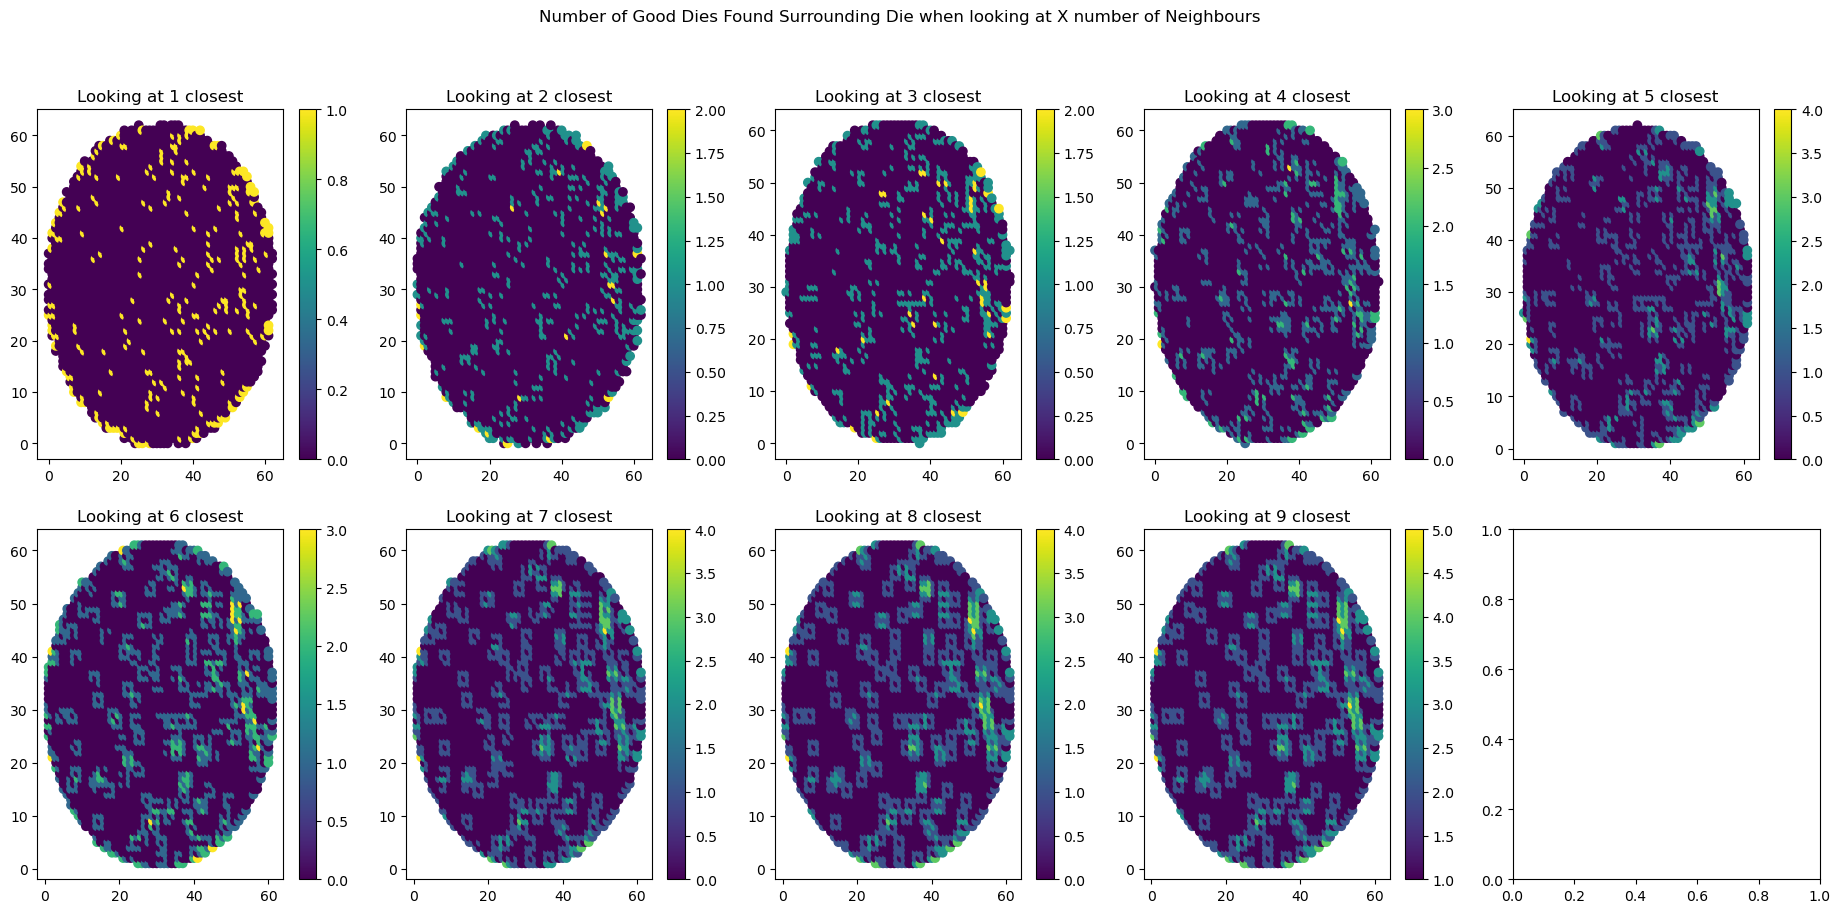

In [54]:
# Randomly Selecting

# Select Specific Wafer
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']

# Convert DataFrame representation of Wafer to matrix, to allow for faster die selection
circle_mold= df_to_array(trial_df)

# Pad the matrix, to allow for checking neighbours of edges
pad_length = 1
circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

# Check 1-9 closes neighbours
for j in range(1,10):
    pred_lst = []
    # Iterate through the DataFrame
    for i in trial_df.index:
        
        # Locate the die centre from the DataFrame
        x_coord = trial_df.loc[i,'DieX'] + pad_length
        y_coord = trial_df.loc[i,'DieY'] + pad_length 
        
        # Get the 9 dies around the selected die
        top = circle_mold[x_coord,y_coord+1]
        bottom = circle_mold[x_coord,y_coord-1]
        right = circle_mold[x_coord+1,y_coord]
        left = circle_mold[x_coord-1,y_coord]
        top_right = circle_mold[x_coord+1,y_coord+1]
        top_left = circle_mold[x_coord-1,y_coord+1]
        bottom_right = circle_mold[x_coord+1,y_coord-1]
        bottom_left = circle_mold[x_coord-1,y_coord-1]

        # Concatenate the neighbours
        neighbour_lst = [top,bottom,right,left,top_right,top_left,bottom_right,bottom_left]

        # Sample j neighbours and classify the die
        prediction = j-sum(rd.sample(neighbour_lst,np.minimum(j,len(neighbour_lst))))

        # Append Results
        pred_lst.append(prediction)

    trial_df[f'counted_values_{j}'] = pred_lst

# Plot Results
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(23, 10))
j = 0

for i in range(9):
    k = i
    if i > 4:
        j =1
        k = i -5
    pcm = axes[j,k].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df[f'counted_values_{i+1}'])
    axes[j,k].set_title(f'Looking at {i+1} closest')
    fig.colorbar(pcm, ax=axes[j,k])
fig.suptitle('Number of Good Dies Found Surrounding Die when looking at X number of Neighbours')


This code, appears to be very similiar to what I have already implemented in KNN filtering, however here is a subtle difference which may make an impact. In this feature, there is an ordinal value given to each die, representing how many bad dies are around it. The higher the number, theoretically, the higher the chance it belongs to a scratch, however the other feature, uses the number of features to arrive at a binary classifacition, weather it is a good or bad die. The previous feature is more related to the knn algorithm. 

The next cell, follows the process as the previous cell, however instead of selecting j random neighbours it tries to select shapes of neighbours in an attempt to isolate patterns in the data that follow certain shapes. 

Text(0.5, 0.98, 'Number of Good Dies Found Surrounding Die when looking at X number')

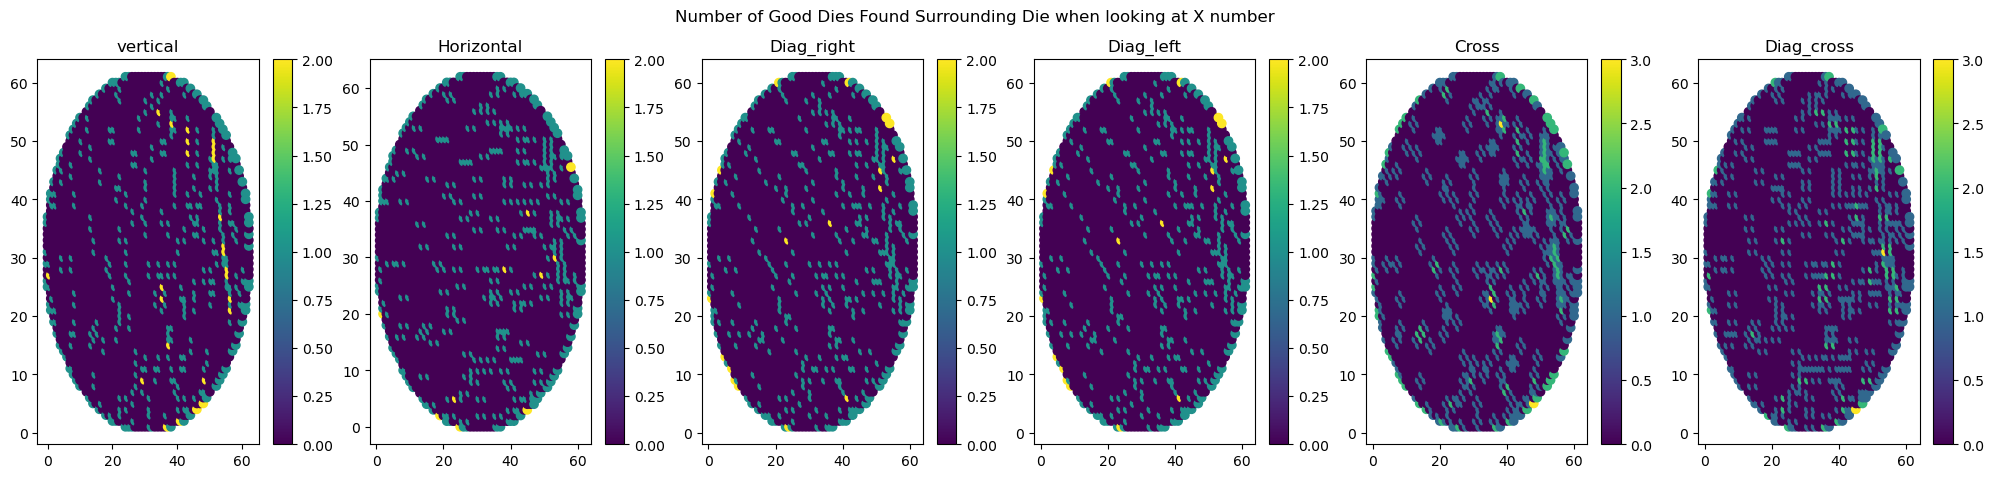

In [55]:
# Different Patterns

# Select Specific Wafer
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']

# Convert DataFrame representation of Wafer to matrix, to allow for faster die selection
circle_mold= df_to_array(trial_df)
# Pad the matrix, to allow for checking neighbours of edges
pad_length = 1
circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

# Instantiate result lists
vertical_lst = []
horizontal_lst = []
diag_right_lst = []
diag_left_lst = []
cross_lst = []
diag_cross_lst = []

# Iterate through the DataFrame
for i in trial_df.index:

    # Locate the die centre from the DataFrame
    x_coord = trial_df.loc[i,'DieX'] + pad_length
    y_coord = trial_df.loc[i,'DieY'] + pad_length 
    
    # Get the 9 dies around the selected die
    top = circle_mold[x_coord,y_coord+1]
    bottom = circle_mold[x_coord,y_coord-1]
    right = circle_mold[x_coord+1,y_coord]
    left = circle_mold[x_coord-1,y_coord]
    top_right = circle_mold[x_coord+1,y_coord+1]
    top_left = circle_mold[x_coord-1,y_coord+1]
    bottom_right = circle_mold[x_coord+1,y_coord-1]
    bottom_left = circle_mold[x_coord-1,y_coord-1]

    # Get values for each shape
    vertical = 2- sum([top,bottom])
    horizontal = 2- sum([right,left])
    diag_right = 2- sum([bottom_left,top_right])
    diag_left = 2 -sum([top_left,bottom_right] )
    cross = 4 - sum([top,bottom,right,left])
    diag_cross = 4- sum([top_right,top_left,bottom_right,bottom_left])

    # Append results for each shape
    vertical_lst.append(vertical)
    horizontal_lst.append(horizontal) 
    diag_right_lst.append(diag_right) 
    diag_left_lst.append(diag_left) 
    cross_lst.append(cross) 
    diag_cross_lst.append(diag_cross)

trial_df['vertical'] = vertical_lst
trial_df['horizontal'] = horizontal_lst
trial_df['diag_right'] = diag_left_lst
trial_df['diag_left'] = diag_left_lst
trial_df['cross'] = cross_lst
trial_df['diag_cross'] = diag_cross_lst 

# Plot results
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(25,5))

pcm = axes[0].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df['vertical'])
axes[0].set_title('vertical')
fig.colorbar(pcm, ax=axes[0])
pcm =axes[1].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df['horizontal'])
axes[1].set_title('Horizontal')
fig.colorbar(pcm, ax=axes[1])
pcm = axes[2].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df['diag_right'])
axes[2].set_title('Diag_right')
fig.colorbar(pcm, ax=axes[2])
pcm = axes[3].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df['diag_left'])
axes[3].set_title('Diag_left')
fig.colorbar(pcm, ax=axes[3])
pcm = axes[4].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df['cross'])
axes[4].set_title('Cross')
fig.colorbar(pcm, ax=axes[4])
pcm = axes[5].scatter(x= trial_df['DieX'], y= trial_df['DieY'], c= trial_df['diag_cross'])
axes[5].set_title('Diag_cross')
fig.colorbar(pcm, ax=axes[5])

# plt.colorbar()
fig.suptitle('Number of Good Dies Found Surrounding Die when looking at X number')

##### 4.3: Initial Findings

Regarding the first approach of choosing the j/9 random neighbours and interesting phenomena happens. This phenomena appears in many of the features created. The first phenomena is the increase in visibility of the scratch with a higher x chosen. Lower x values are unable to isolate the scatch, probably due to the random nature of the selection coupled with the lack of voting power smaller numbers have to give a clear indication of the reality. Higher x values are able to identify the scratches as bad dies clump together, being next to a bad die increases the vote that you are also a bad die. Another intersting aspect is the appearence of squarese around isolated bad dies.  

Another interesting finding is that with a larger number of neighbours the edge cases also become more prominent, which can clutter up the data. A potential solution could be to exclude the border from the wafer.  

In the second diagram, with the differnt neighbour patterns, it is interesting to see that some paterns are very receptive to finding the scratch while others are not. For example if you were to look at the vertical vs horizontal it appears that the verical graph was able to isolate the scratch as well as the ink dies between them, while the horizontal was not. This makes sense as this scratch has a vertical orientation. This is a very promising outcome. I hope that the large variability in the shape, orientation and location of the scatches is able to be captured using all the different neighbour selections. 

#### 4.4 Function

In [56]:
def rndm_neighbour_count_feature(main_df, num_neighbours):
    """
    Accepts a DataFrame of Wafers and a specific number of neighbours to checks and returns a count of bad dies found in a random neighbour search.

    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :num_neighbours: Int, An integer of the number of random neighbours to check.

    Return List: A list, where each element is the number of random neighbours selected that are bad dies, per die. 
    
    """
    # Instantiate result lists
    total_pred_lst = []

    # Iterate through Wafers
    for name, group_df in tqdm(main_df.groupby('WaferName')):

        # Convert DataFrame representation of Wafer to matrix, to allow for faster die selection
        circle_mold= df_to_array(group_df)
        
        # Pad the matrix, to allow for checking neighbours of edges
        pad_length = 1
        circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

        # Instantiate result lists
        pred_lst = []
        for i in group_df.index:
            
            # Locate the die centre from the DataFrame
            x_coord = group_df.loc[i,'DieX'] + pad_length
            y_coord = group_df.loc[i,'DieY'] + pad_length 
            
             # Get the 9 dies around the selected die
            top = circle_mold[x_coord,y_coord+1]
            bottom = circle_mold[x_coord,y_coord-1]
            right = circle_mold[x_coord+1,y_coord]
            left = circle_mold[x_coord-1,y_coord]
            top_right = circle_mold[x_coord+1,y_coord+1]
            top_left = circle_mold[x_coord-1,y_coord+1]
            bottom_right = circle_mold[x_coord+1,y_coord-1]
            bottom_left = circle_mold[x_coord-1,y_coord-1]

            # Concatenate the neighbours
            neighbour_lst = [top,bottom,right,left,top_right,top_left,bottom_right,bottom_left]

            # Make Prediction
            prediction = num_neighbours-sum(rd.sample(neighbour_lst,np.minimum(num_neighbours,len(neighbour_lst))))

            # Append results per die
            pred_lst.append(prediction)
        
        # Append results per wafer
        total_pred_lst.extend(pred_lst)

    return np.nan_to_num(np.array(total_pred_lst), nan=num_neighbours)

In [57]:
def shape_neighbour_count_feature(main_df):
    """
    Accepts a DataFrame of Wafers and a specific number of neighbours per speicif shape of neighbours checked.

    :main_df: DataFrame, This is a DataFrame containing many wafers.
    
    Return List: A list, where each element is a list for each shaped checked. Within each list is a number per die, representing how many bad dies were found in the checked area. 
    
    """
    # Instantiate result lists
    total_vertical_lst = []
    total_horizontal_lst = []
    total_diag_right_lst = []
    total_diag_left_lst = []
    total_cross_lst = []
    total_diag_cross_lst = []
        
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        
        # Convert DataFrame representation of Wafer to matrix, to allow for faster die selection
        circle_mold= df_to_array(group_df)
        
        # Pad the matrix, to allow for checking neighbours of edges
        pad_length = 1
        circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

        # Instantiate result lists
        vertical_lst = []
        horizontal_lst = []
        diag_right_lst = []
        diag_left_lst = []
        cross_lst = []
        diag_cross_lst = []

        for i in group_df.index:
            
            # Locate the die centre from the DataFrame
            x_coord = group_df.loc[i,'DieX'] + pad_length
            y_coord = group_df.loc[i,'DieY'] + pad_length 
            
             # Get the 9 dies around the selected die
            top = circle_mold[x_coord,y_coord+1]
            bottom = circle_mold[x_coord,y_coord-1]
            right = circle_mold[x_coord+1,y_coord]
            left = circle_mold[x_coord-1,y_coord]
            top_right = circle_mold[x_coord+1,y_coord+1]
            top_left = circle_mold[x_coord-1,y_coord+1]
            bottom_right = circle_mold[x_coord+1,y_coord-1]
            bottom_left = circle_mold[x_coord-1,y_coord-1]

            # Get values for each shape
            vertical = 2- sum([top,bottom])
            horizontal = 2- sum([right,left])
            diag_right = 2- sum([bottom_left,top_right])
            diag_left = 2 -sum([top_left,bottom_right] )
            cross = 4 - sum([top,bottom,right,left])
            diag_cross = 4- sum([top_right,top_left,bottom_right,bottom_left])

            # Append Results per die
            vertical_lst.append(vertical)
            horizontal_lst.append(horizontal) 
            diag_right_lst.append(diag_right) 
            diag_left_lst.append(diag_left) 
            cross_lst.append(cross) 
            diag_cross_lst.append(diag_cross)

        # Append results per wafer
        total_vertical_lst.extend(vertical_lst)
        total_horizontal_lst.extend(horizontal_lst)
        total_diag_right_lst.extend(diag_right_lst)
        total_diag_left_lst.extend(diag_left_lst)
        total_cross_lst.extend(cross_lst)
        total_diag_cross_lst.extend(diag_cross_lst)
    
    # FILL NANS
    rslt_lst = [total_vertical_lst, total_horizontal_lst, total_diag_right_lst,total_diag_left_lst,total_cross_lst,total_diag_cross_lst]
    rslt_lst = [np.nan_to_num(np.array(i), nan=1) for i in rslt_lst]
    
    return rslt_lst

In [58]:
def shape_neighbour_cross_feature(main_df):
    """
    Accepts a DataFrame of Wafers and a specific number of neighbours for the cross shape of neighbours checked.

    :main_df: DataFrame, This is a DataFrame containing many wafers.
    
    Return List: A list where each element is a the values per die for for the Cross Shape. 
    
    """
    
    # Instantiate result lists
    total_cross_lst = []
       
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        
        # Convert DataFrame representation of Wafer to matrix, to allow for faster die selection
        circle_mold= df_to_array(group_df)
        
        # Pad the matrix, to allow for checking neighbours of edges
        pad_length = 1
        circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

        # Instantiate result lists
        cross_lst = []

        for i in group_df.index:
            
            # Locate the die centre from the DataFrame
            x_coord = group_df.loc[i,'DieX'] + pad_length
            y_coord = group_df.loc[i,'DieY'] + pad_length 
            
             # Get the 9 dies around the selected die
            top = circle_mold[x_coord,y_coord+1]
            bottom = circle_mold[x_coord,y_coord-1]
            right = circle_mold[x_coord+1,y_coord]
            left = circle_mold[x_coord-1,y_coord]
            top_right = circle_mold[x_coord+1,y_coord+1]
            top_left = circle_mold[x_coord-1,y_coord+1]
            bottom_right = circle_mold[x_coord+1,y_coord-1]
            bottom_left = circle_mold[x_coord-1,y_coord-1]

            # Get values for cross shape
            cross = 4 - sum([top,bottom,right,left])
            
            # Append Results per die
            cross_lst.append(cross) 

        # Append results per wafer
        total_cross_lst.extend(cross_lst)

    # FILL NANS
    rslt_lst = np.nan_to_num(np.array(total_cross_lst), nan=1)
    
    return rslt_lst

In [59]:
# Create data for randome selection choosing to check 7 neighbours
if training_run:
    total_pred_feature_7 = rndm_neighbour_count_feature(df_wafers, 7)
    np.save("total_pred_feature_7.npy",total_pred_feature_7 )
else:
    total_pred_feature_7 = np.load("total_pred_feature_7.npy")

In [60]:
# Create data for shapes
if training_run:
    shape_feature = shape_neighbour_count_feature(df_wafers)
    np.save("shape_feature.npy",shape_feature )
else:
    shape_feature = np.load("shape_feature.npy")

In [61]:
# Create Data for cross shapes
if training_run:
    cross_shape_feature = shape_neighbour_cross_feature(df_wafers)
    np.save("cross_shape_feature.npy",cross_shape_feature)
else:
    cross_shape_feature = np.load("cross_shape_feature.npy")

### Feature 5: Length and jump adjacent test

##### 5.1: Explanation

This feature is a "Score" of connectedness. The feature represents how connected each die is to other bad dies, assuming that the more connected a die is to other bad dies the higher the chance that it is in a scratch. The method of creating the "Score" was also designed to overcome some of the clustering difficulties that this dataset presents, namely:

- The shape of scratches being thin strightish line.
- Gaps in the scratch 

A density based algorithm may not always be able to correctly deal with those features.

As such I have attempted to create an itorative algorithm that starts at one die and counts how many bad dies are connected to this die by moving from one die to another. If it counts X good dies it is assumed to be out of a scratch, and inorder to continue the scratch, it is allowed to jump to further dies, allowing for the tally to continue if need be. It is only allowed to jump a certain amount of times, to prevent it jumping to every die and making one group. 

The final number attained per die, will be the feature per die. The assumption is that dies in scratches will be able to visit more bad dies and attain a higher tally, while isolated bad dies, and good dies will be making less jumps. The beauty of this algorithm is that it gives ink dies a high score, due to their proximity to other bad dies, and allows us to identify them as being part of a scratch. As such higher scores indicate bieng part of a scratch and vice versa. 

This algorithm allows for differnt number of jumps as well as differnt jump distances, which would allow for different levels of freedom to identify scratches but also for the noise to be added to the values as if it can make more jumps of larger distances it can "latch onto" differnt scratches or clusters that are seperate. 

An additional level of freedom would be to allow certain directions, I have allowed movement in all 9 directions, like a queen in chess, however this can be altered.

##### 5.2 Proof of Concept

In [62]:
# Recursive Algorithm 

def find_longest_path(x,y,df_trial, jump_allowance,space_count, jumped):
    """
    This is a recursive function that intends to find the number of bad dies that can be reached from the initial die, allowing for 9 directions of movement and a certain number of jumps.

    :x: Int, X coordinate of die.
    :y: Int, Y coordinate of die.
    :df_trial: DataFrame, Dataframe of specific Wafer.
    :jump_allowance: Int, Integer that specifices how many jumps remaining.
    :space_count: Int, Integer counting how many consecutive dies that are good.
    :jumped: Bool, Boolean that indicates if the previous move was a jump.

    Return: Int, A score per die, outlining how many bad dies are reachable from current die. 

    """
    # Check if it is out of bounds
    try:
        is_good_val = df_trial[(df_trial['DieX'] == x) & (df_trial['DieY'] == y)]['IsGoodDie'].values[0]
    except:
        is_good_val = np.nan
        
    if is_good_val is np.nan:
        return 0
    
    # Check if previously been there
    if is_good_val == -1:
        return 0

    # Check if jumped to another good Die
    if jumped and is_good_val == 1:
        return 0
    
    # Check if jumped to many times
    if jump_allowance == 0:
        return 0
    
    # Check if it is a good val
    if is_good_val == 1:
        space_count +=1
    
    # Allow for more movement once a jump has been made. 
    if jumped:
        space_count = 0

    # Check if it has been seeing to many good dies
    if space_count >= 2:
        return 0 

    # Allow for back tracking
    temp = df_trial[(df_trial['DieX'] == x) & (df_trial['DieY'] == y)]['IsGoodDie'].values[0]
    current_row = df_trial.loc[(df_trial['DieX'] == x) & (df_trial['DieY'] == y)].index[0]
    df_trial.loc[current_row,'IsGoodDie' ] = -1
    
    #Make the one length moves
    
    up = find_longest_path(x, y + 1, df_trial,jump_allowance,space_count, jumped=False)
    down = find_longest_path(x, y -1,df_trial,jump_allowance,space_count, jumped=False )
    left= find_longest_path(x-1, y ,df_trial,jump_allowance,space_count, jumped=False )
    right= find_longest_path(x+1, y +1,df_trial,jump_allowance,space_count, jumped=False )
    top_right = find_longest_path(x+1, y +1,df_trial,jump_allowance,space_count, jumped=False )
    top_left = find_longest_path(x-1, y +1,df_trial,jump_allowance,space_count, jumped=False )
    bottom_right = find_longest_path(x+1, y -1,df_trial,jump_allowance,space_count, jumped=False )
    bottom_left = find_longest_path(x-1, y-1,df_trial,jump_allowance,space_count, jumped=False )

    # Make the double length moves
        
    double_up = find_longest_path(x, y +2,df_trial,jump_allowance-1,space_count, jumped=True )
    double_down = find_longest_path(x, y -2,df_trial,jump_allowance-1,space_count, jumped=True )
    double_left= find_longest_path(x-2, y ,df_trial,jump_allowance-1,space_count, jumped=True )
    double_right= find_longest_path(x+2, y +2,df_trial,jump_allowance-1,space_count, jumped=True )
    double_top_right = find_longest_path(x+2, y +2,df_trial,jump_allowance-1,space_count, jumped=True )
    double_top_left = find_longest_path(x-2, y +2,df_trial,jump_allowance-1,space_count, jumped=True )
    double_bottom_right = find_longest_path(x+2, y -2,df_trial,jump_allowance-1,space_count, jumped=True )
    double_bottom_left = find_longest_path(x-2, y-2,df_trial,jump_allowance-1,space_count, jumped=True )
    
    # Return the origional values
    df_trial.loc[current_row,'IsGoodDie' ] = temp

    return 1 + max(up,down ,left,right,top_right,top_left,bottom_right,bottom_left, double_up,double_down,double_left,double_right,double_top_right,double_top_left,double_bottom_right,double_bottom_left)

    

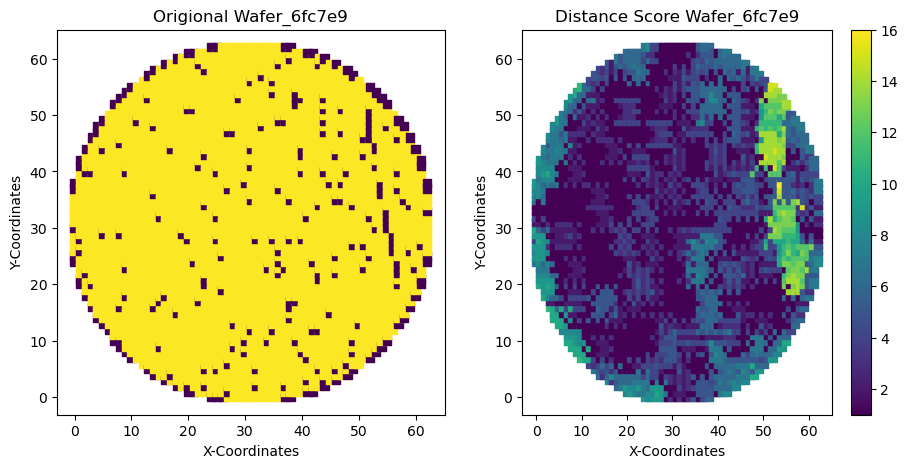

In [63]:
# Select Specific Wafer
trial_df = df_wafers[df_wafers['WaferName'] == '6fc7e9']
trial_df.reset_index(drop=True, inplace=True)

# Get Distance Scores per die
if training_run:
    distance_scores = []
    # Iterate through dies
    for index_num in tqdm(trial_df.index):
        x = trial_df.loc[index_num,'DieX']
        y = trial_df.loc[index_num,'DieY']
        # Get distance Score per die
        distance_scores.append(find_longest_path(x,y,trial_df,2,0,False))
    np.save("distance_scores_6fc7e9.npy",distance_scores)    
else:
    distance_scores = np.load("distance_scores_6fc7e9.npy")

# Load scores that were calcualted earlier, as this takes a long time :(

trial_df['Distance_scores'] = distance_scores

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

axes[0].scatter(x=trial_df['DieX'],y=trial_df['DieY'],c=trial_df['IsGoodDie'], marker='s')
axes[0].set_title('Origional Wafer_6fc7e9')
axes[0].set_xlabel('X-Coordinates')
axes[0].set_ylabel('Y-Coordinates')
pcm =axes[1].scatter(x=trial_df['DieX'],y=trial_df['DieY'],c=trial_df['Distance_scores'], marker='s')
axes[1].set_title('Distance Score Wafer_6fc7e9')
axes[1].set_xlabel('X-Coordinates')
axes[1].set_ylabel('Y-Coordinates')
fig.colorbar(pcm, ax=axes[1])

In [64]:
# Try with a different wafer
# trial_df = df_wafers[df_wafers['WaferName'] == '51f489']
# trial_df.reset_index(drop=True, inplace=True)

# if training_run:
#     distance_scores = []
#     for index_num in tqdm(trial_df.index):
#         x = trial_df.loc[index_num,'DieX']
#         y = trial_df.loc[index_num,'DieY']
#         distance_scores.append(find_longest_path(x,y,trial_df,2,0,False))
#     np.save("distance_scores_51f489.npy",distance_scores)
# else:
#     distance_scores = np.load("distance_scores_51f489.npy")

# # Load scores that were calcualted earlier, as this takes a long time :(
# distance_scores = np.load(r"distance_scores_51f489.npy")
# trial_df['Distance_scores'] = distance_scores

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

# axes[0].scatter(x=trial_df['DieX'],y=trial_df['DieY'],c=trial_df['IsGoodDie'], marker='s')
# axes[0].set_title('Origional Wafer_51f489')
# axes[0].set_xlabel('X-Coordinates')
# axes[0].set_ylabel('Y-Coordinates')
# pcm =axes[1].scatter(x=trial_df['DieX'],y=trial_df['DieY'],c=trial_df['Distance_scores'], marker='s')
# axes[1].set_title('Distance Score Wafer_51f489')
# axes[1].set_xlabel('X-Coordinates')
# axes[1].set_ylabel('Y-Coordinates')
# fig.colorbar(pcm, ax=axes[1])

##### 5.3 Initial Findings

I was super impressed with this algorithm. The images presented highlighted the scratch immediatly and also removed the noisy bad dies excellently. Additionally, the variation in the scores attained is quite large, with dies in the scratch receiving really high scores, which allows for the model to make the distiction much easier, then the other models. However, there is one huge drawback. Since this is a recursive algrithm which has so many options, it takes over an hour per wafer. It is not feesible to complete all 4000 wafers in the two week deadline, and it needs to be optimzed. It is such a shame as this looks very promising, but I just cant proceeede down this route.  

### Feature 6: Yield per Wafer

#### 6.1: Explanation

The motivation behind this feature is the assumption that scratches are inherintly bad dies, therefore more and bigger scratches should translate to a higher proportion of bad dies per wafer and as such a smaller yield. Consequently, the yield and number of scratches should be inversly related. 

#### 6.2 Proof Of Concept

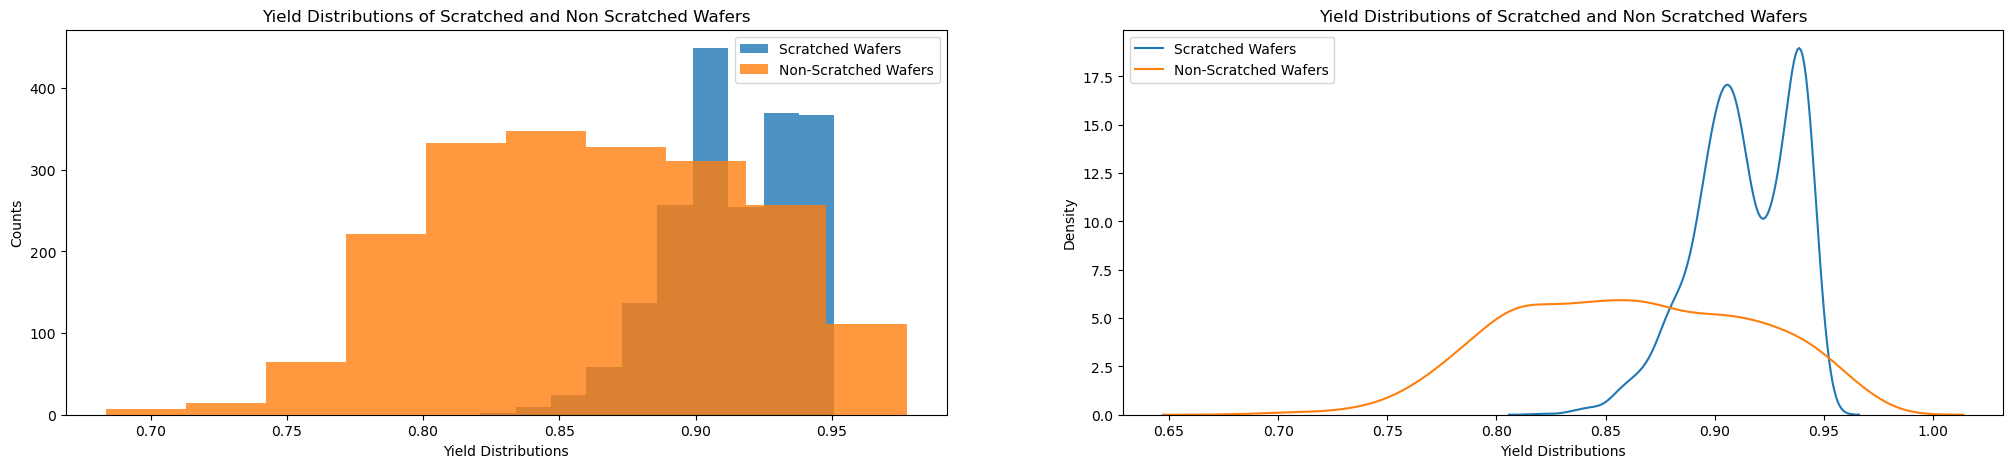

In [65]:
# Copy the data
df_wafers_copy = df_wafers.copy()

# Instatiate results dictionary
name_yield_dict = {}

# Calculate yield per wafer
for name, group in df_wafers_copy.groupby('WaferName'):
    name_yield_dict[name] = group['IsGoodDie'].mean()

# Add yield per wafer
df_wafers_copy['Yield'] = df_wafers_copy['WaferName'].apply(lambda x : name_yield_dict[x])

#  Plot results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

#Plot as histograms
axes[0].hist(df_wafers_copy[df_wafers_copy['WaferScratch'] == 1].groupby('WaferName').mean()['Yield'], label= 'Scratched Wafers', alpha = 0.8)
axes[0].hist(df_wafers_copy[df_wafers_copy['WaferScratch'] == 0].groupby('WaferName').mean()['Yield'], label= 'Non-Scratched Wafers', alpha = 0.8)
axes[0].legend()
axes[0].set_title('Yield Distributions of Scratched and Non Scratched Wafers')
axes[0].set_xlabel('Yield Distributions')
axes[0].set_ylabel('Counts')

# Plot as kde plots
sns.kdeplot(df_wafers_copy[df_wafers_copy['WaferScratch'] == 1].groupby('WaferName').mean()['Yield'], label= 'Scratched Wafers', ax=axes[1])
sns.kdeplot(df_wafers_copy[df_wafers_copy['WaferScratch'] == 0].groupby('WaferName').mean()['Yield'], label= 'Non-Scratched Wafers',ax=axes[1])
axes[1].set_title('Yield Distributions of Scratched and Non Scratched Wafers')
axes[1].set_xlabel('Yield Distributions')
axes[1].legend()

#### 6.3 Initial Findings

These findings were very interesting and seem to suggest that there are clearly two distributions present when comparing the average yield of scratched wafers with that of non-scratched wafers. As previouslt mentioned in the EDA section, counter to my intitial intuition, the non-scratch wafers have a lower yield on average, then the scratched wafer. I am not sure how to explain this. Perhaps there is a coding error, or I am missing something obvious. This will definetly become a feature that will be added in the models.

#### 6.4 Function

In [66]:
def yield_features(main_df):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.

    Return: List, A list where each element is the yield per die. 
    """
    # Instatiate results dictionary
    name_yield_dict = {}

    # Calculate yield per wafer
    for name, group in tqdm(main_df.groupby('WaferName')):
        name_yield_dict[name] = group['IsGoodDie'].mean()

    # Add yield per wafer
    main_df['Yield'] = main_df['WaferName'].apply(lambda x : name_yield_dict[x])

    return np.array(main_df['Yield'].values)

In [67]:
if training_run:
    yield_feature = yield_features(df_wafers)
    np.save('yield_feature.npy', yield_feature)
else:
    yield_feature = np.load('yield_feature.npy')

### Feature 7: Yield Per Row and Colum

##### 7.1 Explanation

Going off the amazing findings of the previous feature I thought there might be more to find through exploring the yield. Since scratches tend to appear as straigtish lines and are concentrated in one orientation, more or less . . . I decied that maybe there might be some intersting findings when anaylsying the yield per row/rows and colum/colums. 

##### 7.2: Proof of Concept

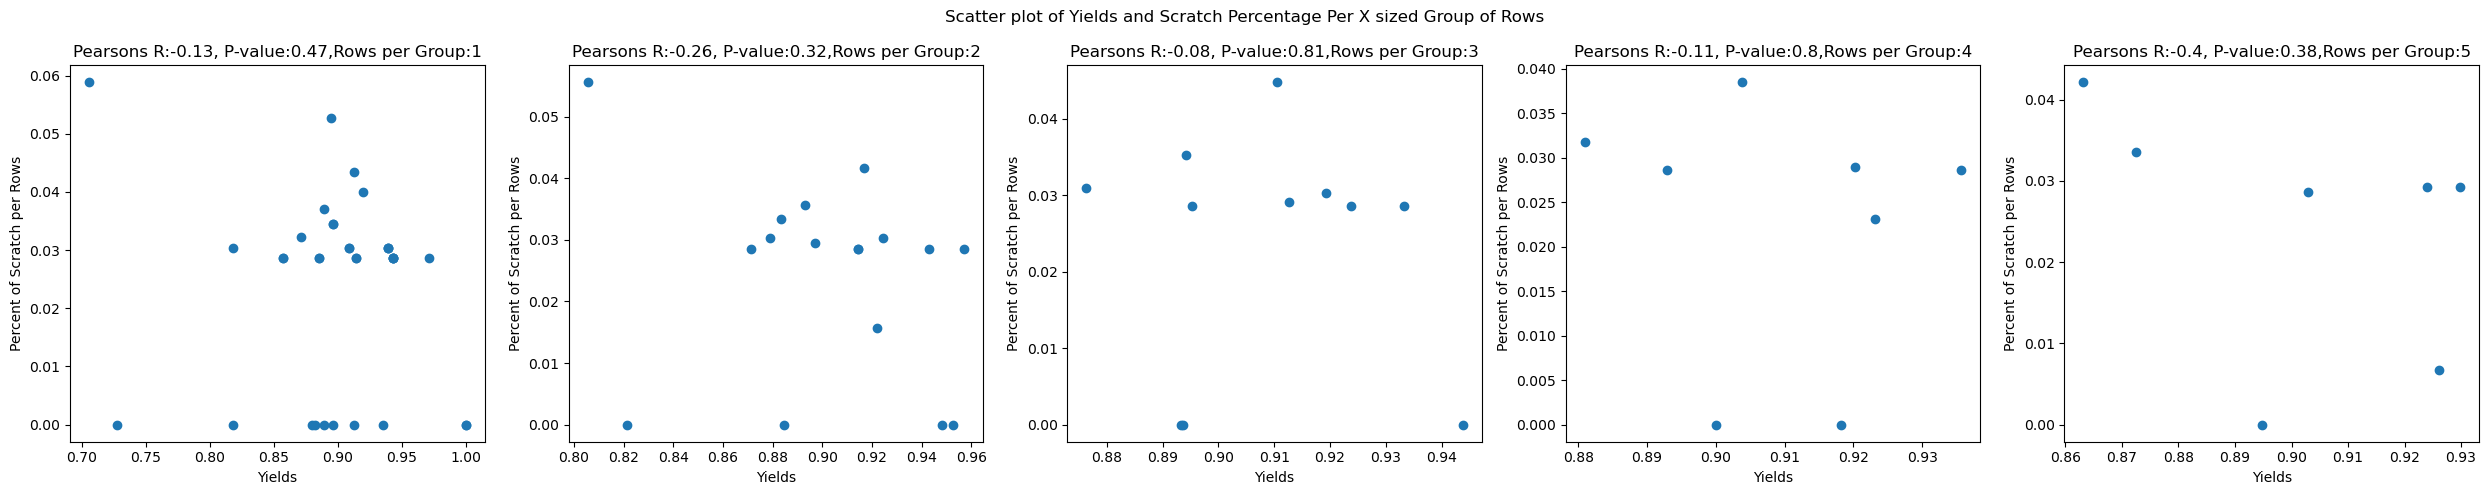

In [68]:
# Analysing the Yield per Row
# Selecting the number of groups to divide the rows into
num_groups = 5
# Select which wafer to analyse
df_trial = df_wafers[df_wafers['WaferName'] == '3b2e28']

# Find the number of rows
old_row_nums = df_trial['DieX'].min()

fig, axes = plt.subplots(nrows=1, ncols=num_groups, figsize=(25, 5))

# Find the ratio of good to bad dies and scratched and non scratched per group of rows, with each graph the different number of rows per group. 
for rows_per_group in range(1,num_groups+1):
    row_yields = []
    is_scratch_percent = []

    for row_nums in grouped(np.unique(df_trial['DieX']), rows_per_group):          
        row_yields.append(df_trial[df_trial['DieX'].isin(row_nums)]['IsGoodDie'].mean())
        is_scratch_percent.append((df_trial[df_trial['DieX'].isin(row_nums)]['IsScratchDie'].mean()))

    # Get the Correlation
    result = scipy.stats.linregress(row_yields, is_scratch_percent)
    axes[rows_per_group-1].scatter(x=row_yields, y =is_scratch_percent) ### CHANGE THE SCALES
    axes[rows_per_group-1].set_title(f"Pearsons R:{round(result.rvalue,2)}, P-value:{round(result.pvalue,2)},Rows per Group:{len(row_nums)}")
    axes[rows_per_group-1].set_xlabel('Yields')
    axes[rows_per_group-1].set_ylabel('Percent of Scratch per Rows')

fig.suptitle('Scatter plot of Yields and Scratch Percentage Per X sized Group of Rows')
plt.tight_layout()

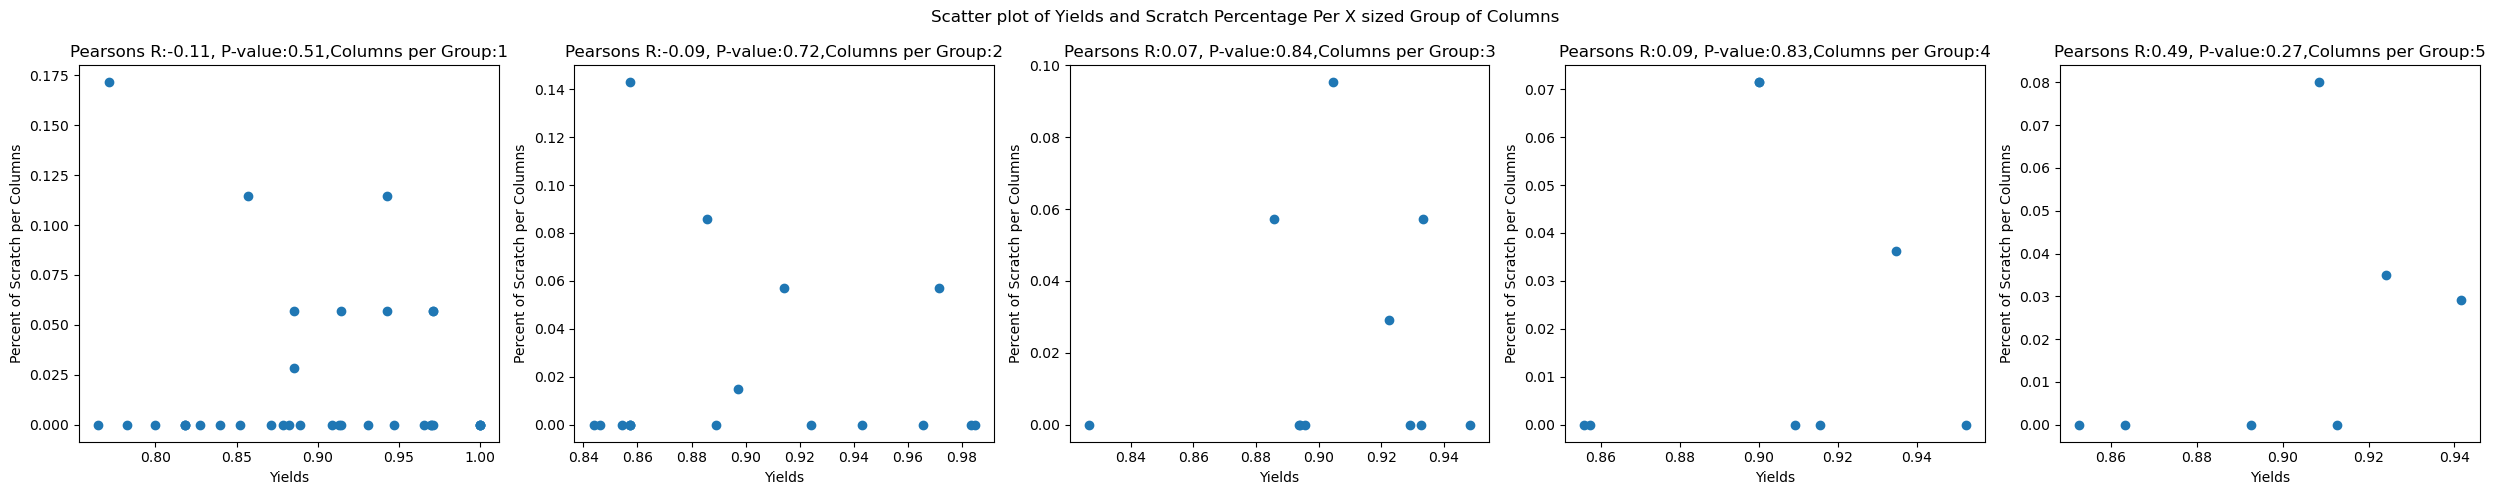

In [69]:
# Yeild per columns
# Selecting the number of groups to divide the columns into
num_groups = 5

# Select which wafer to analyse
df_trial = df_wafers[df_wafers['WaferName'] == '3b2e28']

# Find the number of columns
old_row_nums = df_trial['DieY'].min()

fig, axes = plt.subplots(nrows=1, ncols=num_groups, figsize=(25, 5))

# Find the ratio of good to bad dies and scratched and non scratched per group of columns, with each graph the different number of columns per group. 
for rows_per_group in range(1,num_groups+1):
    row_yields = []
    is_scratch_percent = []

    for colum_nums in grouped(np.unique(df_trial['DieY']), rows_per_group):
            
        row_yields.append(df_trial[df_trial['DieY'].isin(colum_nums)]['IsGoodDie'].mean())
        is_scratch_percent.append((df_trial[df_trial['DieY'].isin(colum_nums)]['IsScratchDie'].mean()))

    # Get the Correlation
    result = scipy.stats.linregress(row_yields, is_scratch_percent)
    axes[rows_per_group-1].scatter(x=row_yields, y =is_scratch_percent) ### CHANGE THE SCALES
    axes[rows_per_group-1].set_title(f"Pearsons R:{round(result.rvalue,2)}, P-value:{round(result.pvalue,2)},Columns per Group:{len(colum_nums)}")
    axes[rows_per_group-1].set_xlabel('Yields')
    axes[rows_per_group-1].set_ylabel('Percent of Scratch per Columns')
fig.suptitle('Scatter plot of Yields and Scratch Percentage Per X sized Group of Columns')
plt.tight_layout()

##### 7.3: Initial Findings

The initial findings are not promising. Visualizing the results using scatter plots to try and see if there is a correlation betweem the yield and scratch percentage is not promising, no visual conformation can be provided. Additionally the pearson correlation was never close to +/- 1 and all the p-values were high. The low r values, and high p-values suggest that there is no correlation here. Additionally the difference in scale between the x and y axis is deceptive and even if a pattern can be visualized, it can mostly be explained due to the scale of the axis. This feature is not promising, however it may be worth exploring more in the model side of the task.

##### 7.4 Function

In [70]:
def yield_row_function(main_df, num_groups):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :num_groups: Int, A number outlining how many rows per group.

    :Return: List, A list of yields per group of rows.
    
    """
    # Instatiate row yield list
    row_yields_lst = []
    
    # Iterate through groups
    for name, group_df in tqdm(main_df.groupby("WaferName")):
        # Break Df into even sized rows
        for row_nums in grouped(np.unique(group_df['DieX']), num_groups):
            
            # Calculate yield per rows
            number_of_matching_rows = group_df[group_df['DieX'].isin(row_nums)].shape[0]
            fill_value = group_df[group_df['DieX'].isin(row_nums)]['IsGoodDie'].mean()
            
            row_yields_lst.extend(np.full(number_of_matching_rows,fill_value))
        
        # Find yield for remaining rows
        lower_range = row_nums[-1]+1
        upper_range = group_df['DieX'].max()+1

        number_of_matching_rows = group_df[group_df['DieX'].isin(range(lower_range,upper_range))].shape[0]
        fill_value = group_df[group_df['DieX'].isin(range(lower_range, upper_range))]['IsGoodDie'].mean()
        
        row_yields_lst.extend(np.full(number_of_matching_rows,fill_value))
            
    return row_yields_lst 

In [71]:
def yield_column_function(main_df, num_groups):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :num_groups: Int, A number outlining how many columns per group.

    :Return: List, A list of yields per group of columns.
    """
    # Instatiate column yield list
    column_yields_lst = []
    
    # Iterate through groups
    for name, group_df in tqdm(main_df.groupby("WaferName")):
        # Break Df into even sized columns
        for column_nums in grouped(np.unique(group_df['DieY']), num_groups):
            
            # Calculate yield per columns
            number_of_matching_columns = group_df[group_df['DieY'].isin(column_nums)].shape[0]
            fill_value = group_df[group_df['DieY'].isin(column_nums)]['IsGoodDie'].mean()
            
            column_yields_lst.extend(np.full(number_of_matching_columns,fill_value))
        
        # Find yield for remaining columns
        lower_range = column_nums[-1]+1
        upper_range = group_df['DieY'].max()+1

        number_of_matching_columns = group_df[group_df['DieY'].isin(range(lower_range,upper_range))].shape[0]
        fill_value = group_df[group_df['DieY'].isin(range(lower_range, upper_range))]['IsGoodDie'].mean()
        
        column_yields_lst.extend(np.full(number_of_matching_columns,fill_value))
            
    return column_yields_lst

In [72]:
if training_run:
    row_yields_feature = yield_row_function(df_wafers, 3)
    np.save('row_yields_feature.npy',row_yields_feature )
else:
    row_yields_feature = np.load('row_yields_feature.npy')

In [73]:
if training_run:
    column_yields_feature = yield_column_function(df_wafers, 3)
    np.save('column_yields_feature.npy',column_yields_feature)
else:
    column_yields_feature = np.load('column_yields_feature.npy')

### Feature 8: Yield per Area

#### 8.1: Explanation

Just like the previous features of looking and the yield per row and column, this attempts to find the yield per area in the wafer, dividing the circle into 9 squares, and the remaing 4 areas, giving a total of 13 areas to analyse.

#### 8.2: Proof of Concept

Check after the function

#### 8.3: Initial Findings

Check after the function

#### 8.4: Function

In [74]:
def yield_per_square(main_df):
    """
    Accepts a DataFrame of wafers and returns the yield for 13 areas per wafer.

    :main_df: DataFrame, This is a DataFrame containing many wafers.

    Return: 
    :total_yield_lst: List, A list of lists. Where each element is a list of the yield of 13 areas of the wafer.
    :cut_count_array: List, A list of lists. WHere each element is a list of the cut counts of the wafer. 
    """

    # Instatiate an array of nans, the same size as the given DF
    total_yield_lst = np.full(main_df.shape[0],np.nan)
    cut_count_array = np.full(main_df.shape[0],np.nan)
    index_lst = np.full(main_df.shape[0],np.nan)

    # Iterate through wafers in the DF
    for name, group_df in tqdm(main_df.groupby("WaferName")):
        
        # Convert the wafer from DF to a 2d Matrix
        circle_mold = df_to_array(group_df)
        
        # Find the rows, columns and indices to select from 
        rows=np.size(circle_mold,axis=0)
        cols=np.size(circle_mold,axis=1)
        ind1=np.arange(0,rows,rows//5)
        ind2=np.arange(0,cols,cols//5)

        # Designate the edges for the cut
        left_row = [ind1[0],ind1[4],0,0,ind1[1],ind1[1],ind1[1],ind1[2],ind1[2],ind1[2],ind1[3],ind1[3],ind1[3]]
        right_row = [ind1[1],group_df['DieX'].max()+1,group_df['DieX'].max()+1,group_df['DieX'].max()+1,ind1[2],ind1[2],ind1[2],ind1[3],ind1[3],ind1[3],ind1[4],ind1[4],ind1[4]]
        left_clm = [0,0,ind2[0],ind2[4],ind2[1],ind2[2],ind2[3],ind2[1],ind2[2],ind2[3],ind2[1],ind2[2],ind2[3]]
        right_clm = [group_df['DieY'].max()+1,group_df['DieY'].max()+1,ind2[1],group_df['DieY'].max()+1,ind2[2],ind2[3],ind2[4],ind2[2],ind2[3],ind2[4],ind2[2],ind2[3],ind2[4]]
        
        # Designate the cut area
        cut1 = circle_mold[left_row[0]:right_row[0],left_clm[0]:right_clm[0]]
        cut2 = circle_mold[left_row[1]:right_row[1],left_clm[1]:right_clm[1]]
        cut3 = circle_mold[left_row[2]:right_row[2],left_clm[2]:right_clm[2]]
        cut4 = circle_mold[left_row[3]:right_row[3],left_clm[3]:right_clm[3]]
        cut5 = circle_mold[left_row[4]:right_row[4],left_clm[4]:right_clm[4]]
        cut6 = circle_mold[left_row[5]:right_row[5],left_clm[5]:right_clm[5]]
        cut7 = circle_mold[left_row[6]:right_row[6],left_clm[6]:right_clm[6]]
        cut8 = circle_mold[left_row[7]:right_row[7],left_clm[7]:right_clm[7]]
        cut9 = circle_mold[left_row[8]:right_row[8],left_clm[8]:right_clm[8]]
        cut10 = circle_mold[left_row[9]:right_row[9],left_clm[9]:right_clm[9]]
        cut11= circle_mold[left_row[10]:right_row[10],left_clm[10]:right_clm[10]]
        cut12 = circle_mold[left_row[11]:right_row[11],left_clm[11]:right_clm[11]]
        cut13 = circle_mold[left_row[12]:right_row[12],left_clm[12]:right_clm[12]]
        
        # Collate all areas
        cut_lst = [cut1,cut2,cut3,cut4,cut5,cut6,cut7,cut8,cut9,cut10,cut11,cut12,cut13]


        # Find the yield per area
        for count, cut in enumerate(cut_lst):
            cut_yield = 1-(cut[~np.isnan(cut)]).mean()
            cut_indexes = group_df[(group_df['DieX'].between(left_row[count],right_row[count])) & (group_df['DieY'].between(left_clm[count],right_clm[count]))].index
            
            for index in cut_indexes:
                index_lst[index] = index

                total_yield_lst[index] = cut_yield
                cut_count_array[index] = count +1

    return [total_yield_lst, cut_count_array]  


In [75]:
if training_run:
    yield_cut_lst = yield_per_square(df_wafers)
    area_yields_feature = yield_cut_lst[0]
    area_count_feature = yield_cut_lst[1]
    np.save('area_yields_feature.npy',yield_cut_lst[0])
    np.save('area_count_feature.npy',yield_cut_lst[1])
else:
   area_yields_feature = np.load('area_yields_feature.npy')
   area_count_feature =  np.load('area_count_feature.npy') 

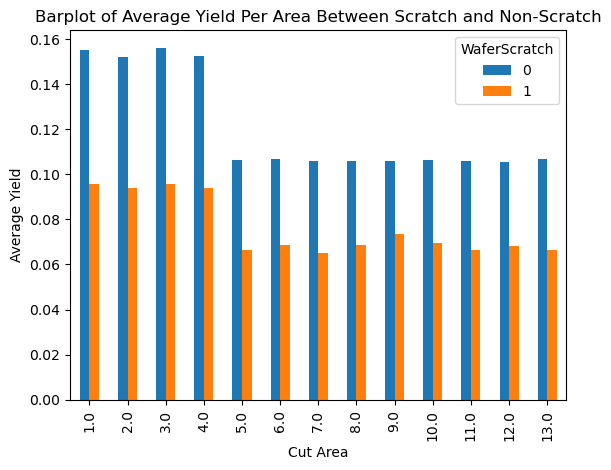

In [76]:
df_wafers['Yield_13'] = area_yields_feature
df_wafers['Cut'] = area_count_feature

df_wafers.groupby(["Cut",'WaferScratch'])['Yield_13'].mean().unstack().plot.bar()
plt.title('Barplot of Average Yield Per Area Between Scratch and Non-Scratch')
plt.xlabel("Cut Area")
plt.ylabel('Average Yield')
plt.show()

We can see above that these features seam to be very promising. We can see that there is a large difference between wafers with a scratch and wafers without a scratch for the 13 areas. 

### Feature 9: Density Score

##### 9.1 Explanation

This feature looks at the density of bad dies aroies each die. It would check the yield around the selected die calculated at different radiases. The assumption is that bad dies in scratches will have a high density as they are surrounded by more bad dies, while isolates bad dies and good dies will have low densities as they are surrounded by only good dies. The high density values would be used as an indication that the die is part of a scratch, and vice versa. 

##### 9.2 Proof of Concept

Text(0.5, 0.98, 'Scatter Plots of Wafer Densitities Calcluated With Different Radiuses')

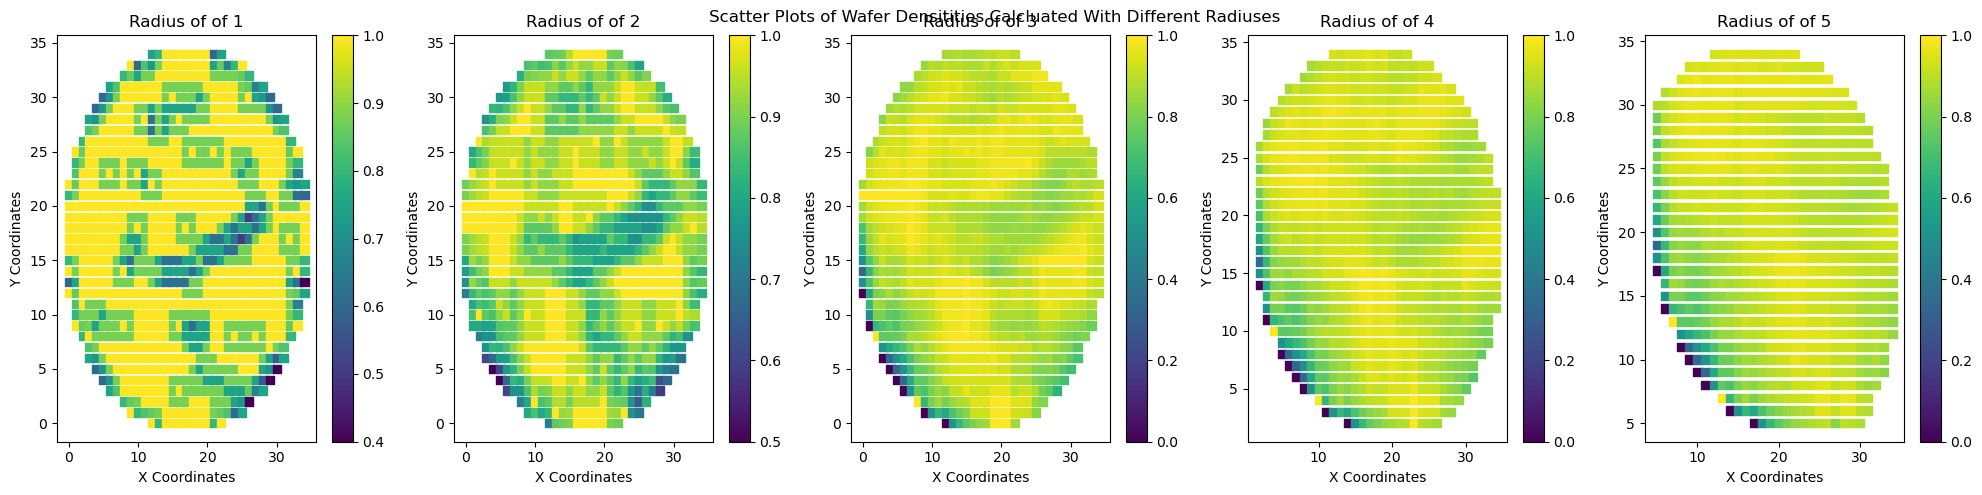

In [77]:
# Create trial DF
df_trial = df_wafers[df_wafers['WaferName'] == '3b2e28']

# Transform the tabular data into a matrix reprentation to allow for variable distance checks easily
circle_mold = np.full((df_trial['DieX'].max()+1,df_trial['DieY'].max()+1),np.nan)
for i in df_trial.index:
    x =  df_trial.loc[i,'DieX']
    y =  df_trial.loc[i,'DieY']
    z =  df_trial.loc[i,'IsGoodDie']
    circle_mold[x][y] = z

#Pad edges with Nan
for pad_length in range(1,6):

    circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))
    density_lst = []
    # Find Density
    for i in df_trial.index:
        # Select row and colum of specific die
        row_num =  df_trial.loc[i,'DieX'] + pad_length
        colum_num =  df_trial.loc[i,'DieY'] + pad_length

        # Select the edges around the selected die
        left_edge = colum_num-pad_length
        right_edge = colum_num+pad_length+1
        top_edge = row_num + pad_length+1
        bottom_edge = row_num - pad_length

        # Find the centre die
        centre_element = circle_mold[row_num][colum_num]

        # Select the area around the selected die
        area_array = list(circle_mold[bottom_edge:top_edge,left_edge:right_edge].flatten())
        
        # Isolate and remove the current die
        middleIndex = int((len(area_array) - 1)/2)
        area_array = np.array(area_array[:middleIndex] + area_array[middleIndex+1 :])
        # Remove nans
        area_array = area_array[~np.isnan(area_array)]
        
        # Calculate the density and append results
        density_lst.append(area_array.mean())

    df_trial[f'Densities_{pad_length}'] = density_lst

# Plot Results
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for i in range(1,6):
    pcm = axes[i-1].scatter(x=df_trial['DieX'], y=df_trial['DieY'], c=df_trial[f'Densities_{i}'], marker='s')
    axes[i-1].set_title(f'Radius of of {i}')
    axes[i-1].set_xlabel('X Coordinates')
    axes[i-1].set_ylabel('Y Coordinates')
    fig.colorbar(pcm, ax= axes[i-1])
plt.tight_layout()
plt.suptitle('Scatter Plots of Wafer Densitities Calcluated With Different Radiuses')

##### 9.3 Initial Findings

As we can see above, this algorithm is able to find high dense area, that allign with the location of the scratch which is a good sign. The lower density means there are more bad dies as a good die's value is 1, so even though the results say low density, that is really a high density area of bad dies are. There are three intersting results.
- Firstly, this method can find the scratch areas,
- Secondly the radius of the search is very important, as a to large radius dilutes the density with the majority class which is not good.
- Thirdly, The plots show squares. They appear as they are surrounding a bad die, and therefore have a slightly lower density then good dies completly surrounded by good dies. This may be an issue as it will give more weight to good dies bieng bad dies, but on the flipside we can see it is giving lower importance to the bad dies as it is no saying they are good and not part of a scratch as the centre of the square is completly surrrounded by good dies. This is great for noise reduction and of removal of False positive Bad dies. 

I feel that a radius of 2 provides a the best balance between the afformentioned considerations.

##### 9.4 Function

In [78]:
def density_feature_func(main_df,pad_length):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :pad_length:Int, This is an integer that outlines the radius around the die to check for the yield density. 

    Return: List, A list of the density scores per die
    """
    density_group_lst = []
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        circle_mold = df_to_array(group_df)
        circle_mold = np.pad(circle_mold,pad_length,constant_values=(np.nan,))

        density_lst = []
        # Find Density
        for i in group_df.index:
            row_num =  group_df.loc[i,'DieX'] + pad_length
            colum_num =  group_df.loc[i,'DieY'] + pad_length

            left_edge = colum_num-pad_length
            right_edge = colum_num+pad_length+1
            top_edge = row_num + pad_length+1
            bottom_edge = row_num - pad_length

            centre_element = circle_mold[row_num][colum_num]

            area_array = circle_mold[bottom_edge:top_edge,left_edge:right_edge].flatten()
            area_array = list(circle_mold[bottom_edge:top_edge,left_edge:right_edge].flatten())
            middleIndex = int((len(area_array) - 1)/2)
            area_array = np.array(area_array[:middleIndex] + area_array[middleIndex+1 :])
            area_array = area_array[~np.isnan(area_array)]
            
            density_lst.append(area_array.mean())

        density_group_lst.extend(density_lst)
    
    return density_group_lst

In [79]:
if training_run:
    density_feature = density_feature_func(df_wafers,2)
    np.save("density_feature.npy", density_feature)
else:
    density_feature = np.load("density_feature.npy")

### Feature 10: Distance to Closest Bad Die

##### 10.1: Explanation

The motivation behind this feature follows a similair reasoning to the previous feature of density based, however it attempts to approach the problem from a differnt angle. This feature is a euclidean distance between a Die and its closest bad die. The assumption is that dies in scratches will be close to other bad dies and therefore will have low distances, while bad dies that are not in scratches and good dies will be far from other bad dies and will have high distances. This might also overcome the previous issue mentioned of the hollow squares caused by good dies bieng around isolated bad dies, or it could amplify it as the good dies are still close to bad dies??

##### 10.2: Proof of Concept

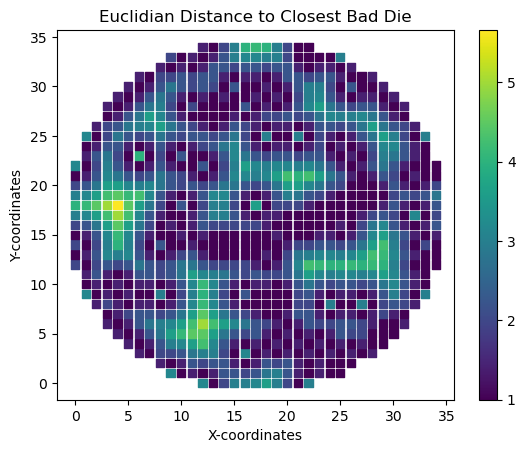

In [80]:
# DISTANCE TO CLOSEST BAD DIE

# Create trial DF
df_trial = df_wafers[df_wafers['WaferName'] == '3b2e28']

# Transform the tabular data into a matrix reprentation to allow for variable distance checks easily
circle_mold = np.full((df_trial['DieX'].max()+1,df_trial['DieY'].max()+1),np.nan)
for i in df_trial.index:
    x =  df_trial.loc[i,'DieX']
    y =  df_trial.loc[i,'DieY']
    z =  df_trial.loc[i,'IsGoodDie']
    circle_mold[x][y] = z

# Instatiate distance list
min_dist_lst = []

# Find Distances
for i in df_trial.index:
    
    # Reset variable for each Die
    no_bad = True
    pad_length = 1
    circle_mold_pad = np.pad(circle_mold,pad_length,constant_values=(np.nan,))
    # Continue implementing while loop until Bad die has been found
    while no_bad:
        
        # Use tabular data to isolate corrent matrix location
        row_num =  df_trial.loc[i,'DieX'] + pad_length
        colum_num =  df_trial.loc[i,'DieY'] + pad_length

        # Find the edges of the search area
        left_edge = colum_num-pad_length
        right_edge = colum_num+pad_length+1
        top_edge = row_num + pad_length+1
        bottom_edge = row_num - pad_length

        # Find the value of the die
        centre_element = circle_mold_pad[row_num][colum_num]

        # Find the search area in the matrix
        area_array = circle_mold_pad[bottom_edge:top_edge,left_edge:right_edge]
        
        # Find the centre
        centre = int(area_array.shape[0]-((area_array.shape[0]-1)/2))-1
        
        # Replace centre
        temp_centre = area_array[centre,centre]
        # Replace current cell to prevent finding itself
        area_array[centre,centre] = -1
        
        # Check if any bad cells
        if (area_array == 0).sum() > 0:
            
            # Find the smallest euclidean distance to the bad DIE
            min_dist = 100
            for j in range(np.stack(np.where(area_array==0)).shape[1]):

                array1= np.stack(np.where(area_array==-1)).reshape(2,)
                array2= np.stack(np.where(area_array==0))[:,j]
                temp = array1 - array2
                distance = np.linalg.norm(temp)
                
                # Update minumum distance value
                if distance < min_dist:
                    min_dist = distance

            # Save value and end while loop
            min_dist_lst.append(min_dist)
            no_bad = False
        else:
            # Add additional padding to allow for wider search area
            pad_length +=1
            circle_mold_pad = np.pad(circle_mold,pad_length,constant_values=(np.nan,))
        
        # Return value of Die to origional, to allow for other die searches
        area_array[centre,centre] = temp_centre

# Add min distances to df
df_trial['Distance_to_bad'] = min_dist_lst

# Plot Results
plt.scatter(x=df_trial['DieX'],y=df_trial['DieY'],c= df_trial['Distance_to_bad'], marker='s')
plt.title('Euclidian Distance to Closest Bad Die')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.colorbar()

##### 10.3: Initial Findings

As we can see above, the areas that are purple with the low density align with the scratch, which is what was expected, however, the main weakness here is that there is lots of purple areas. While the scratch has been identified, it has not been isolated as the only reason i know it has been isolated is because i know where the scatch is. It is not very obvious. This is probably due to the fact that any cell right next to a bad cell will recieve a score of one, regardless of the other surroundings, as such a cell next to an isolated die will recieve the same score as a die in the scratch. The advantage of this method is that it really does provide a high level of confidence for the dies that recieved high scores, as they must be really isolate and as such the change that they are in a scratch is much smaller. Despite the high lack of veriation in the data, the results still do seem promising and I will be continuing with the production of these features.

##### 10.4: Function

In [81]:
def closest_bad_feature(main_df):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.

    Return:
    :total_min_dist_lst: List, A list of the minimum distances to a bad die for each die. 
    
    """
    total_min_dist_lst = []
    # Create trial DF
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        
        # Transform the tabular data into a matrix reprentation to allow for variable distance checks easily
        circle_mold = df_to_array(group_df)
        # Instatiate distance list
        min_dist_lst = []

        # Find Distances
        for i in group_df.index:
            
            # Reset variable for each Die
            no_bad = True
            pad_length = 1
            circle_mold_pad = np.pad(circle_mold,pad_length,constant_values=(np.nan,))
            # Continue implementing while loop until Bad die has been found
            while no_bad:
                
                # Use tabular data to isolate corrent matrix location
                row_num =  group_df.loc[i,'DieX'] + pad_length
                colum_num =  group_df.loc[i,'DieY'] + pad_length

                # Find the edges of the search area
                left_edge = colum_num-pad_length
                right_edge = colum_num+pad_length+1
                top_edge = row_num + pad_length+1
                bottom_edge = row_num - pad_length

                # Find the value of the die
                centre_element = circle_mold_pad[row_num][colum_num]

                # Find the search area in the matrix
                area_array = circle_mold_pad[bottom_edge:top_edge,left_edge:right_edge]
                
                # Find the centre
                centre = int(area_array.shape[0]-((area_array.shape[0]-1)/2))-1
                
                # Replace centre
                temp_centre = area_array[centre,centre]
                # Replace current cell to prevent finding itself
                area_array[centre,centre] = -1
                
                # Check if any bad cells
                if (area_array == 0).sum() > 0:
                    
                    # Find the smallest euclidean distance to the bad DIE
                    min_dist = 100
                    for j in range(np.stack(np.where(area_array==0)).shape[1]):

                        array1= np.stack(np.where(area_array==-1)).reshape(2,)
                        array2= np.stack(np.where(area_array==0))[:,j]
                        temp = array1 - array2
                        distance = np.linalg.norm(temp)
                        
                        # Update minumum distance value
                        if distance < min_dist:
                            min_dist = distance

                    # Save value and end while loop
                    min_dist_lst.append(min_dist)
                    no_bad = False
                else:
                    # Add additional padding to allow for wider search area
                    pad_length +=1
                    circle_mold_pad = np.pad(circle_mold,pad_length,constant_values=(np.nan,))
                
                # Return value of Die to origional, to allow for other die searches
                area_array[centre,centre] = temp_centre

        # Add min distances to df
        total_min_dist_lst.extend(min_dist_lst)

    return total_min_dist_lst

In [82]:
if training_run:
    closest_dist_feature = closest_bad_feature(df_wafers)
    np.save('closest_dist_feature.npy',closest_dist_feature)
else:
    closest_dist_feature = np.load('closest_dist_feature.npy')


### Feature 11: Radon 

#### 11.1: Explanation

The following feature is intended to utlize the patterns present within the dies to be able to help classify on a wafer basis. This will utlize the radon transformation in an attempt to try and see if we can classify scratch and non scratched wafers.

#### 11.2: Proof of Concept

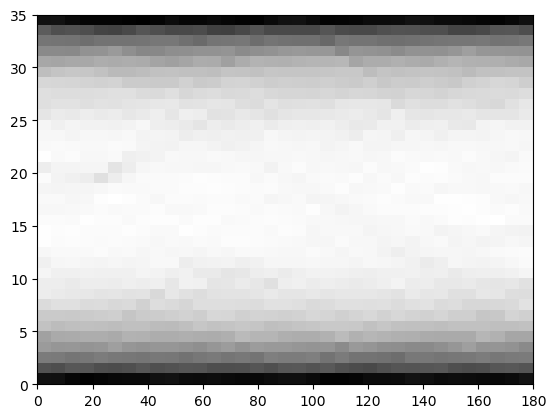

In [83]:
# Make quadrants as a feature
df_trial = df_wafers[df_wafers['WaferName'] == '3b2e28']

# Convert the df wafet to matrix wafer
img = df_to_array_non_nan(df_trial)

# Do the Radon Transformation
theta = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram = radon(img, theta=theta)

plt.imshow(sinogram,cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

#### 11.3: Initial Findings

See below for initial findings

#### 11.4: Functions

In [84]:
def cubic_inter_mean(img):
    """
    :img: Array, This is an 2d array represenation of the wafer

    Return:
    :ynew: Array, An constant sized array with a the transformed mean of the radon transformation 
    """
    # Do the Radon Transformation
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)
    
    # Get the mean value, accounting for the difference in dimensions of wafers.
    xMean_Row = np.mean(sinogram, axis = 1)
    x = np.linspace(1, xMean_Row.size, xMean_Row.size)
    y = xMean_Row
    f = interpolate.interp1d(x, y, kind = 'cubic')
    xnew = np.linspace(1, xMean_Row.size, 20)
    ynew = f(xnew)/100   
    return ynew

In [85]:
def cubic_inter_std(img):
    """
    :img: Array, This is an 2d array represenation of the wafer

    Return:
    :ynew: Array, An constant sized array with a the transformed std of the radon transformation 
    """
    # Do the Radon Transformation
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)
    
    # Get the mean value, accounting for the difference in dimensions of wafers.
    xStd_Row = np.std(sinogram, axis=1)
    x = np.linspace(1, xStd_Row.size, xStd_Row.size)
    y = xStd_Row
    f = interpolate.interp1d(x, y, kind = 'cubic')
    xnew = np.linspace(1, xStd_Row.size, 20)
    ynew = f(xnew)/100   
    return ynew  

In [86]:
# Create Radon Function
def radon_feature(main_df, is_holdout):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :is_holdout: Bool, THis is a boolean that determines if this function is used for the given training data, or the holdout test data. Intended to prevent data leakage

    Return:
    :mean_lst: List, A list of the mean radon transformations
    :std_lst: List, A list of the std radon transformations
    :scratch_lst: List, A list of binary values of scratch values
    :name_lst: List, A list of the names of the wafer
    """

    mean_lst = []
    std_lst = []
    scratch_lst = []
    name_lst = []

    for name, group_df in tqdm(main_df.groupby('WaferName')):
        img = df_to_array_non_nan(group_df)
        ynew_mean = cubic_inter_mean(img)
        ynew_std = cubic_inter_std(img)

        mean_lst.append(ynew_mean)
        std_lst.append(ynew_std)
        name_lst.append(name)

        if is_holdout != True:
            scratch_lst.append(group_df.WaferScratch.values[0])
    
    if is_holdout != True:
        return [mean_lst,std_lst,name_lst,scratch_lst]
    else:
        return [mean_lst,std_lst,name_lst] 

In [87]:
if training_run:
    radon_lst = radon_feature(df_wafers, False)

    radon_mean_feature = radon_lst[0]
    radon_std_feature = radon_lst[1]
    radon_name_feature = radon_lst[2]
    radon_scratch_feature = radon_lst[3]

    np.save("radon_mean_feature.npy",radon_mean_feature)
    np.save("radon_std_feature.npy",radon_std_feature)
    np.save("radon_name_feature.npy",radon_scratch_feature) 
    np.save("radon_scratch_feature.npy",radon_name_feature)

else:
    radon_mean_feature = list(np.load("radon_mean_feature.npy"))
    radon_std_feature = list(np.load("radon_std_feature.npy")) 
    radon_scratch_feature = list(np.load("radon_name_feature.npy"))
    radon_name_feature = list(np.load("radon_scratch_feature.npy"))

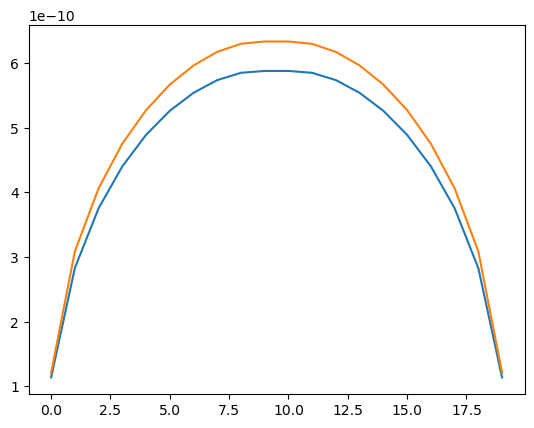

In [88]:
# Display results 
trial_df_radon = pd.DataFrame({
    'mean':radon_mean_feature,
    'std':radon_std_feature,
    'scratch':radon_scratch_feature
    })

plt.plot(trial_df_radon[trial_df_radon['scratch'] == 0]['mean'].mean(axis=0))
plt.plot(trial_df_radon[trial_df_radon['scratch'] == 1]['mean'].mean(axis=0))

As we can see there is clearly a divide in the radon features between wafers with scratches and wafers without scratches

### Feature 12: Wafer Classifier 

#### 12.1: Explanation

This feature is intended to attempt to try and classify the wafer as a whole as either being a scratch wafer, or a non scratch wafer. This binary classifaction will then be applied to each die belonging to the classified wafer. The feature is createed through creating a new dataset per wafer utilzing the yield per area features as well as the radon transforamtion features. To prevent data leakage the df_wafers, will have to be seperated into a training and test set for the training and optimizing of this model.

#### 12.2: Proof Of Concept

In [89]:
# Prepare Data For Model Training

# Create Radon Mean and Radon Std DF
std_df = pd.DataFrame(radon_std_feature, columns= [f'std{i}' for i in range(20)])
mean_df = pd.DataFrame(radon_mean_feature, columns= [f'mean{i}' for i in range(20)])

# Combine the Radon Mean, and Radon std 
radon_df = pd.concat((std_df, mean_df), axis = 1)

# Concat Features
radon_df['Scratch'] = radon_scratch_feature

# Add Cut Features and Yield Features to df_wafers
df_wafers['Cut'] = area_count_feature
df_wafers['Yield_13'] = area_yields_feature

# Get Yield per cut area
cut_array = []
name_lst = []
for name, group_df in tqdm(df_wafers.groupby('WaferName')):
    group_df.drop('WaferName', axis=1, inplace = True)
    cut_array.append(group_df.groupby('Cut').mean()['Yield_13'].values)
    name_lst.append(name)

# Create Cut Df
cut_df = pd.DataFrame(cut_array, columns = [f"cut{i}" for i in range(13)])

# Concat Cut and Radon df
per_wafer_df = pd.concat((cut_df,radon_df), axis =1)

100%|██████████| 3920/3920 [00:07<00:00, 559.20it/s]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       399
           1       1.00      0.99      1.00       385

    accuracy                           1.00       784
   macro avg       1.00      1.00      1.00       784
weighted avg       1.00      1.00      1.00       784



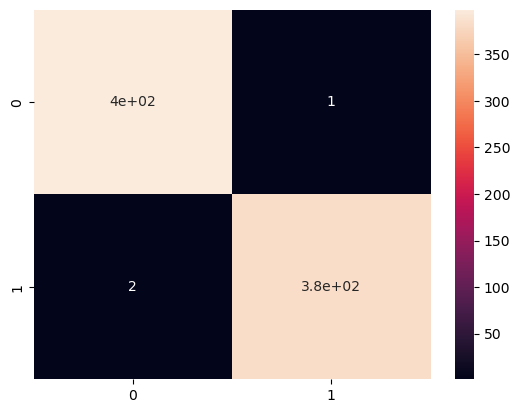

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       399
           1       1.00      0.99      0.99       385

    accuracy                           0.99       784
   macro avg       0.99      0.99      0.99       784
weighted avg       0.99      0.99      0.99       784



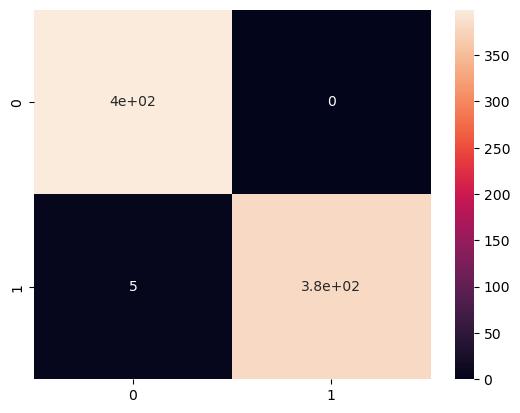

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       399
           1       0.98      0.99      0.99       385

    accuracy                           0.99       784
   macro avg       0.99      0.99      0.99       784
weighted avg       0.99      0.99      0.99       784



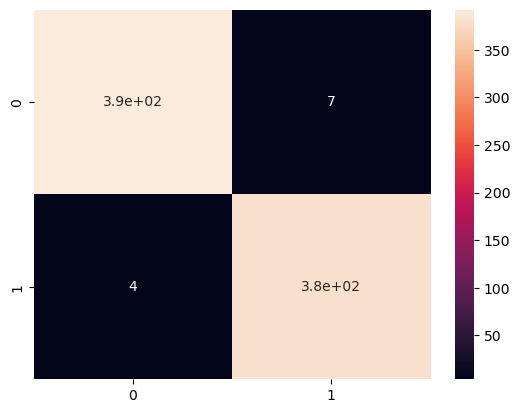

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.99      0.99      0.99       385

    accuracy                           0.99       784
   macro avg       0.99      0.99      0.99       784
weighted avg       0.99      0.99      0.99       784



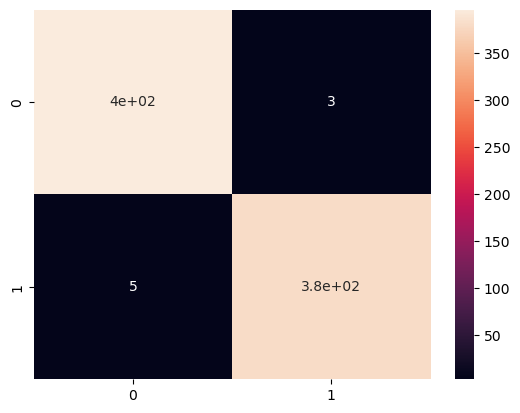

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       398
           1       0.99      0.99      0.99       386

    accuracy                           0.99       784
   macro avg       0.99      0.99      0.99       784
weighted avg       0.99      0.99      0.99       784



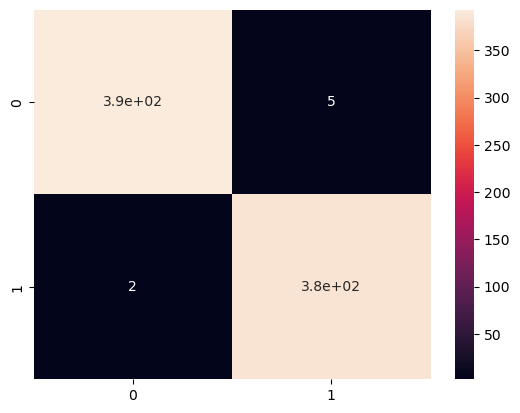

Average Accuracy
0.991326530612245


In [90]:
# Initial Test
# Select X and y Data
X = per_wafer_df.loc[:,features_clms_type]
y = per_wafer_df.loc[:,'Scratch']

# Do A statified k-fold cv to veryify model
acc_results = []
skf = StratifiedKFold(n_splits=5,random_state=42, shuffle=True)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    # Split into train data
    X_train = per_wafer_df.loc[train_index,features_clms_type]
    y_train = per_wafer_df.loc[train_index,'Scratch']

    # Split into test data
    X_test = per_wafer_df.loc[test_index,features_clms_type]
    y_test = per_wafer_df.loc[test_index,'Scratch']

    # Instantiate Model
    model = XGBClassifier(random_state = 42)
    model.fit(X_train.values, y_train.values)

    #Predict the model
    y_preds = model.predict(X_test)

    # Classification report
    print(classification_report(y_test, y_preds))
    results= classification_report(y_test, y_preds, output_dict= True)
    acc_results.append(accuracy_score(y_test, y_preds))
    # Make Confusion Matrix
    cf_matrix = confusion_matrix(y_test, y_preds)
    # Plot Results
    sns.heatmap(cf_matrix, annot=True)
    plt.show()

print('Average Accuracy')
print(np.array(acc_results).mean())

We can see above that the model is consistently getting a high score in all metrics which is a good sign that the radon features and yield features are able to classify on a wafer basis. However, if we want to invclude this feature, to prevent data leakage, we will have to split up the training data provided into two groups. One to train and one to test that the model works. I want to see how much of the training data we need to "sacrifice" for this feature to ensure that we have a balance between model performance and remaining data to use. Below are the experiments for that. 

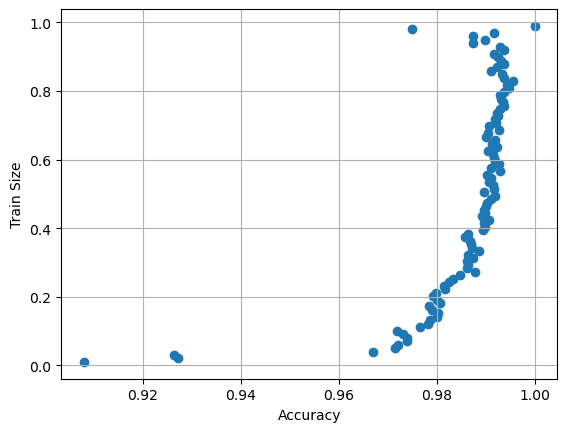

In [91]:
# Make the Data
X = per_wafer_df.loc[:,features_clms_type]
y = per_wafer_df.loc[:,'Scratch']

# Instantiate results list
accuracy_lst = []
train_size_lst = []

# Run multiple experiments with different test sizes
for test_size in np.linspace(1,0,100)[1:-1]:
    # Split the data according to interations test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)  

    # Instatiate and fit the model
    model = XGBClassifier(random_state = 42)
    model.fit(X_train.values, y_train.values)

    #Predict the model
    y_preds = model.predict(X_test)

    # Save results
    accuracy_lst.append(accuracy_score(y_test, y_preds))
    train_size_lst.append(1-test_size)

# Turn results into a df
reuslts_df = pd.DataFrame({
    'Accuracy':accuracy_lst,
    'Train_size': train_size_lst
})

# Plot results
plt.scatter(x= accuracy_lst, y=train_size_lst)
plt.xlabel('Accuracy')
plt.ylabel('Train Size')
plt.grid()

The above graph shows us that using more then 20% of the data for training does not provide a large increase in model performance, as such would like to see how utlizing 20% of the data to train a model for this feature will turn out. The results are seen later on in the model training and optimizing stage. 

In [92]:
# Make scratch_model
per_wafer_df['Name'] = name_lst
X = per_wafer_df.loc[:,per_wafer_df.columns != "Scratch"]
y = per_wafer_df.loc[:,'Scratch']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify = y)
    
scratch_model = XGBClassifier(random_state = 42)
scratch_model.fit(X_train.loc[:,features_clms_type].values, y_train.values)

#Predict the scratch_model
wafer_model_y_preds = scratch_model.predict(X_test.loc[:,features_clms_type].values)

wafer_model_train_indices = X_train['Name']
wafer_model_test_indices = X_test['Name']

print('Classification report utilizing 20 percent of data for training')
print(classification_report(y_test,wafer_model_y_preds))

df_results_wafer_scratch = pd.DataFrame({
    'indices':wafer_model_test_indices,
    'preds':wafer_model_y_preds
})

Classification report utilizing 20 percent of data for training
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1595
           1       0.98      0.98      0.98      1541

    accuracy                           0.98      3136
   macro avg       0.98      0.98      0.98      3136
weighted avg       0.98      0.98      0.98      3136



After doing some testing I have decided to continue the use of this feature, however for the final holdout set, there is no cocnern for data leakage if i train on the entire training set, below is the wafer type prediction model utilizing the entire dataset.

#### 12.3: Initial Findings

The initial findings are very promising. The model to predict if the wafer has a scratch on it or not, is able to consistenly get very high metrics. I definetly think it is worth exploring some more. 

#### 12.4 Function

In [93]:
def create_wafer_type_features(main_df, is_holdout):
    """
    Creates the features (Radon & Yield) per df required for the predictions of a wafer type.

    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :is_holdout: Bool, This is a boolean which outlines if the main_df is the holdout set or not. Affects if labels are created with the features.

    Return:
    :per_wafer_df: DataFrame, A Dataframe of the created features for wafer type classifaction. Each row represents a wafer, and each column a different feature. 

    """
    yield_lst = yield_per_square(main_df)

    total_yield_lst =  yield_lst[0]
    cut_count_array =  yield_lst[1]
    
    # Create Radon Function
    radon_lst = radon_feature(main_df, is_holdout)

    mean_lst = radon_lst[0]
    std_lst = radon_lst[1]
    name_lst = radon_lst[2]
    if is_holdout == False:
        radon_scratch_feature = radon_lst[3]

    # Combine the Radon Mean, std 
    std_df = pd.DataFrame(std_lst, columns= [f'std{i}' for i in range(20)])
    mean_df = pd.DataFrame(mean_lst, columns= [f'mean{i}' for i in range(20)])

    radon_df = pd.concat((std_df, mean_df), axis = 1)
    # Concat Features
    if is_holdout == False:
        radon_df['Scratch'] = radon_scratch_feature 

    # Concat Features
    main_df['Cut'] = cut_count_array
    main_df['Yield_13'] = total_yield_lst

    # Get Yield per cut area
    cut_array = []
    name_lst = []
    for name, group_df in tqdm(main_df.groupby('WaferName')):
        group_df.drop('WaferName', axis=1, inplace = True)
        cut_array.append(group_df.groupby('Cut').mean()['Yield_13'].values)
        name_lst.append(name)

    cut_df = pd.DataFrame(cut_array, columns = [f"cut{i}" for i in range(13)])

    per_wafer_df = pd.concat((cut_df,radon_df), axis =1)
    
    #Add name of wafer
    per_wafer_df['Name'] = name_lst
    
    return per_wafer_df

In [94]:
def train_wafer_type_model(per_wafer_df,features_lst, small_model=True):
    """
    Trains a model to be able to predict the type of a wafer.
    :per_wafer_df: DataFrame, A Dataframe of the created features for wafer type classifaction. Each row represents a wafer, and each column a different feature.
    :small_model: Bool, A boolean that dicatates what size model is being created. Small: Uses 20% of available training data, Not Small: Uses 100% of the available training data

    Return:
    :scratch_model: Model, A trained model, able to predict wafer type. 
    :X_test: DataFrame, A Dataframe of the test set of per_wafer_df, used to evaluate the model. 
    :X_test: Series, A Sereis of the test set labels from per_wafer_df, used to evaluate the model.

    """
    X = per_wafer_df.loc[:,per_wafer_df.columns != 'Scratch']
    y = per_wafer_df.loc[:,'Scratch']
    if small_model:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify = y)
    else:
        X_train = X
        y_train = y
        
    scratch_model = XGBClassifier(random_state = 42)
    scratch_model.fit(X_train.loc[:,features_lst].values, y_train.values)

    if small_model:
        return scratch_model, X_train, 
    else:
        return scratch_model

In [95]:
def wafer_type_die_predictions(main_df,df_wafer_features,wafer_model,feature_lst):
    """
    :main_df: DataFrame, This is a DataFrame containing many wafers.
    :df_wafer_features: DataFrame, A Dataframe that has all the radon and yield features
    :wafer_model: Model, A model that is trained to predict the wafer type. 
    :feature_lst: List, A list of the required features to test

    Return:

    :wafer_pred_dict: Dict, A Dictionary outlining the wafer name and the wafer type prediction. 
    """
    
    preds_per_wafer = wafer_model.predict(df_wafer_features.loc[:,feature_lst])
    
    wafer_pred_dict = dict(zip(df_wafer_features['Name'].values,preds_per_wafer))

    return wafer_pred_dict

In [96]:
if training_run:
    # Make wafer_type_features
    per_wafer_df_train = create_wafer_type_features(df_wafers, is_holdout=False)
    per_wafer_df_holdout = create_wafer_type_features(df_wafers_test, is_holdout=True)

    # Train the wafer_type models
    scratch_model_small, X_train_per_wafer = train_wafer_type_model(per_wafer_df_train,features_clms_type, small_model=True)
    scratch_model_large = train_wafer_type_model(per_wafer_df_train,features_clms_type, small_model=False)

    # Get Wafer_type features

    wafer_type_pred_dict_train = wafer_type_die_predictions(df_wafers,X_train_per_wafer,scratch_model_small,features_clms_type)
    wafer_type_pred_dict_holdout = wafer_type_die_predictions(df_wafers_test,per_wafer_df_holdout,scratch_model_large,features_clms_type)
    
    with open('wafer_type_pred_dict_train.pkl', 'wb') as f:
        pickle.dump(wafer_type_pred_dict_train, f)
    
    with open('wafer_type_pred_dict_holdout.pkl', 'wb') as f:
        pickle.dump(wafer_type_pred_dict_holdout, f)
    
    with open('X_train_per_wafer.pkl', 'wb') as f:
        pickle.dump(X_train_per_wafer, f)

else:
    with open('wafer_type_pred_dict_train.pkl', 'rb') as f:
        wafer_type_pred_dict_train = pickle.load(f)

    with open('wafer_type_pred_dict_holdout.pkl', 'rb') as f:
        wafer_type_pred_dict_holdout = pickle.load(f)

    with open('X_train_per_wafer.pkl', 'rb') as f:
        X_train_per_wafer = pickle.load(f)

## Model building and Testing

### Loading and appending the features

In [97]:
# Add Features to the DF
df_wafers['KnnClass'] = self_knn_feature
df_wafers['DbClass'] = db_vals_feature
df_wafers['NormalisedDistance'] = normalised_distances_feature[0]
df_wafers['RndmNN_7'] = total_pred_feature_7
df_wafers['ShapeVertical'] = shape_feature[0]
df_wafers['ShapeHorizontal'] = shape_feature[1]
df_wafers['ShapeDiagRight'] = shape_feature[2]
df_wafers['ShapeDiagLeft'] = shape_feature[3]
df_wafers['ShapeCross'] = shape_feature[4]
df_wafers['ShapeDiagCross'] = shape_feature[5]
df_wafers['Yield'] = yield_feature
df_wafers['RowYield'] = row_yields_feature
df_wafers['Density'] = density_feature
df_wafers['ColumnYield'] = column_yields_feature
df_wafers['ClosestBad'] = closest_dist_feature

In [98]:
# Checking for nan values in the data
df_wafers.isna().sum()

WaferName             0
DieX                  0
DieY                  0
IsGoodDie             0
IsScratchDie          0
Ink                   0
WaferScratch          0
Yield_13              0
Cut                   0
KnnClass              0
DbClass               0
NormalisedDistance    0
RndmNN_7              0
ShapeVertical         0
ShapeHorizontal       0
ShapeDiagRight        0
ShapeDiagLeft         0
ShapeCross            0
ShapeDiagCross        0
Yield                 0
RowYield              0
Density               0
ColumnYield           0
ClosestBad            0
dtype: int64

Below there were two main tests that took place, each with their respective smaller tests. The first test was with the entire train data, excluding the wafer prediction feature, while the second test was using 80% of the data but with the wafer prediction features. 

### Initial Tests 

In [99]:
# Specify Initial Feature Columns

feature_columns = ['DieX', 'DieY', 'IsGoodDie', 'KnnClass', 'DbClass', 'NormalisedDistance', 'RndmNN_7',
       'ShapeVertical', 'ShapeHorizontal', 'ShapeDiagRight', 'ShapeDiagLeft',
       'ShapeCross', 'ShapeDiagCross', 'Yield', 'RowYield', 'ColumnYield','Density',
       'ClosestBad']

feature_label_columns = ['WaferName', 'DieX', 'DieY', 'IsGoodDie', 
       'KnnClass', 'DbClass', 'NormalisedDistance', 'RndmNN_7',
       'ShapeVertical', 'ShapeHorizontal', 'ShapeDiagRight', 'ShapeDiagLeft',
       'ShapeCross', 'ShapeDiagCross', 'Yield', 'RowYield', 'ColumnYield','Density',
       'ClosestBad','IsScratchDie',]

In [100]:
# Create a Validation set--> Stratify and group by split

X = df_wafers.loc[:,['DieX','DieY','IsGoodDie']]
y = df_wafers.loc[:,'WaferScratch'] # This is just to stratify the data, the real target is "IsScatchDie", which is implemented later on.
groups = df_wafers.loc[:,'WaferName'].values

print("ORIGINAL POSITIVE RATIO:", y.mean())

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idxs_initial, test_idxs_initial) in enumerate(cv.split(X, y, groups)):
    print("Fold :", fold)
    print("TRAIN POSITIVE RATIO:", y[train_idxs_initial].mean())
    print("TEST POSITIVE RATIO :", y[test_idxs_initial].mean())
    print("TRAIN GROUPS        :", set(groups[train_idxs_initial]))
    print("TEST GROUPS         :", set(groups[test_idxs_initial]))
    print("TRAIN GROUPS RATIO:", len(set(groups[train_idxs_initial]))/wafer_count)
    print("TEST GROUPS RATIO:", len(set(groups[test_idxs_initial]))/wafer_count)
    break

ORIGINAL POSITIVE RATIO: 0.5037071105977716
Fold : 0
TRAIN POSITIVE RATIO: 0.5006596294267627
TEST POSITIVE RATIO : 0.5158853899810067
TRAIN GROUPS        : {'449744', '521505', '793152', '48a875', 'd5f4ce', 'db8ce7', '3a6eca', '4e33e9', 'f6c542', '4b18b7', '9111de', 'bad25a', '73699a', '354a23', 'beee6c', '63864d', '89962d', '176408', 'bb75fc', '4745ba', 'c38b63', '589fba', '232c7f', 'b3e36d', '7d8c0c', '2980d4', '6a67b4', 'd2fe3c', 'd7c681', '47faf1', '79fb69', '84b06e', '922f36', '75856d', 'f231c7', 'aa06d4', 'd827de', '625ed1', 'fa375a', '394791', 'b1444a', '5e0600', '31ca47', '4f09ec', '5b9f24', '2af335', '00d6d2', 'fe6be1', '32eb4a', '58d1b9', 'e7a5f2', 'a45260', 'e396c2', '49d835', '63f118', '4a0972', 'e2b175', '8ee701', 'f9b367', 'dfecc7', '1ab3bd', 'a5a61e', 'b7491d', 'fc6e56', '198c74', '6c5441', 'd3ff1a', '60d254', 'dccf3c', '4b2ef1', 'a674f6', '94b7dd', '5a1d7d', '05031a', '13e1d1', '17de5d', '7b55fa', '26b06a', '222103', 'b9dc9e', 'cb8cfb', 'aaf0f6', 'e7fc0a', '3ffee6', '1

In [101]:
# Check the Data Split 
X_train_initial = df_wafers[df_wafers['WaferName'].isin(set(groups[train_idxs_initial]))][['DieX','DieY','IsGoodDie']]
y_train_initial = df_wafers[df_wafers['WaferName'].isin(set(groups[train_idxs_initial]))]['IsScratchDie']

X_test_initial = df_wafers[df_wafers['WaferName'].isin(set(groups[test_idxs_initial]))][['DieX','DieY','IsGoodDie']]
y_test_initial = df_wafers[df_wafers['WaferName'].isin(set(groups[test_idxs_initial]))]['IsScratchDie']

I have decided to split the data according to the following criteria:
- Grouped: It has been grouped by wafer. There are many reasons for this:
    - To prevent Data Leakage, part of one wafer being in the train and test set
    - All the features have been made on a wafer basis, mixing sizes and shapes will ruin the rational behind the features, as well as the likelyhood the code will work. 
    - A scratch is present on one wafer, mixing wafers, removes scratches and their patterns.
    - The Amount of scratched wafers is roughly the same as the amount of non Scratched Wafer, this will allow for a balanced split in scratched and non scratched wafers, which is calculated above. 
- Stratified: I have tried to stratify it according to the number of scratched and non scratched wafers, this should allow for the models to behave similarily in both the train and test set.
- Split: I did an 80-20 split, to allow for enough data to train, and enough data to evaluate model performance. 

#### Benchmark

The benchmark will be tested using a default xgboost with the origional three features provided.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3340772
           1       0.00      0.00      0.00     16212

    accuracy                           1.00   3356984
   macro avg       0.50      0.50      0.50   3356984
weighted avg       0.99      1.00      0.99   3356984



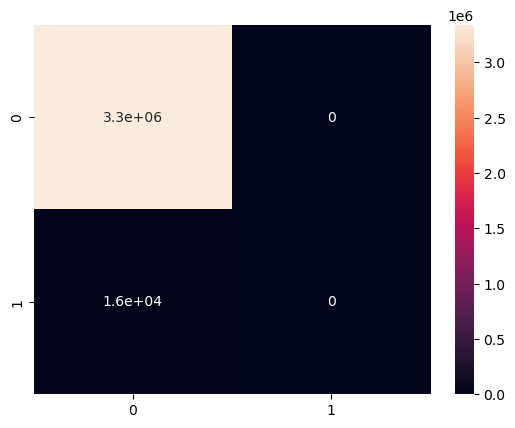

In [102]:
# Fit the clf_boost_bench
if training_run:
    clf_boost_bench = XGBClassifier(random_state = 42)
    clf_boost_bench.fit(X_train_initial.values, y_train_initial.values)

    with open('clf_boost_bench.pkl', 'wb') as f:
        pickle.dump(clf_boost_bench, f)

else:
    with open('clf_boost_bench.pkl', 'rb') as f:
        clf_boost_bench = pickle.load(f)
#Predict the clf_boost_bench
y_preds = clf_boost_bench.predict(X_test_initial)

# Classification report
print(classification_report(y_test_initial, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_initial, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [103]:
clf_boost_bench.feature_importances_

array([0.01256959, 0.01394093, 0.97348946], dtype=float32)

We can see in the benchmark, that the origional three features were not sufficient to allow fot the learning of an xgboost model. The model made the same prediction for everything, which makes sense considering the data is 99% non-scratch. Which means if the models was to predict 0 for everything, which is what it did, it would get 99% correct. Which is not what we want. Even though the wafers are split roughly 50/50 between wafers with and without a scratch, we are not making predictions on the wafers, we are predicting on the dies, which are split 99%/1% for non-scratch die and scratched die respectivly. Since the data is very unballanced, this makes it much liker that the model will predict one class over the other. 

Additionally since this is not a balanced data set, the most appropriate metrics to assess would be precision, recall and f1 score, as accuracy is susceptible to the pitfalls mentioned above. In this case it might be more important to focus on improving the recall for class 1, as the main business goal is to identify scratche dies, which is represented by the recall of class 1. However if there is only a large focus on recall and not precision, this is also detrimental for the business, as if every die is classified as being scratched, the recall will be 100, but all the wafers will have to be chucked out and the business will loose money. This is because the preicsion is very low. Therefore, there should be a balance between recall and precision, which can be summarised as the f1 score. However, since the data is so unballanced, and finding scratched dies is quite hard, at this stage I will be putting attention on attaining a high recall, since I want to see that the model can find scratches to begin with. 

In order to try and find scratches I want to see if adding a class wieght can change the predictor. 

#### Apply weighting to the class disparity

              precision    recall  f1-score   support

           0       1.00      0.92      0.96   3340772
           1       0.04      0.76      0.08     16212

    accuracy                           0.92   3356984
   macro avg       0.52      0.84      0.52   3356984
weighted avg       0.99      0.92      0.95   3356984



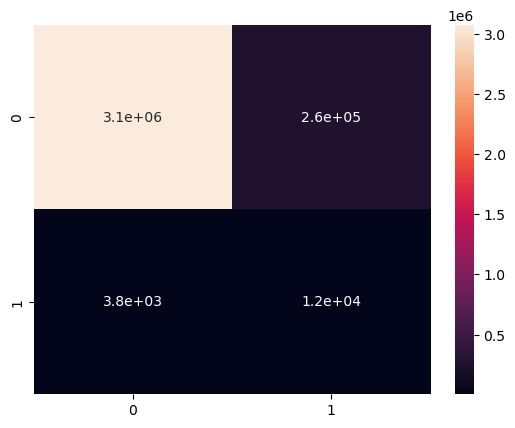

In [104]:
# Fit the clf_boost_weight
if training_run:
    clf_boost_weight = XGBClassifier(random_state = 42,scale_pos_weight=100)
    clf_boost_weight.fit(X_train_initial.values, y_train_initial.values)

    with open('clf_boost_weight.pkl', 'wb') as f:
        pickle.dump(clf_boost_weight, f)

else:
    with open('clf_boost_weight.pkl', 'rb') as f:
        clf_boost_weight = pickle.load(f)

#Predict the clf_boost_weight
y_preds = clf_boost_weight.predict(X_test_initial)

# Classification report
print(classification_report(y_test_initial, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_initial, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [105]:
clf_boost_weight.feature_importances_

array([0.01543183, 0.01620931, 0.9683588 ], dtype=float32)

Makeing one small change, using the addition of the hyperparamater scale_pos_weight=100, which signifies an imballanced dataset of 100/1, the model was able to allocate more weight to the minority class. As a result we can see a large increase in the recall of class 1, to 74 percent, which means that it managed to corretly identify 74% of the current scratches, which is a great improvment from the benchmark, however having a look at the precision for class 1, whcih is 0.04, we can see that perhaps the model was able to arrive at a much higher recall through classifying more dies as scratched, even though they were not. We can see the impact of this type of classification approach on the reduced recall in class 0. This makes sense as the model is classifying more non-scatches as scratches.  

#### Use All Features (Except Wafer Classifaction)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   3340772
           1       0.09      0.73      0.15     16212

    accuracy                           0.96   3356984
   macro avg       0.54      0.85      0.57   3356984
weighted avg       0.99      0.96      0.98   3356984



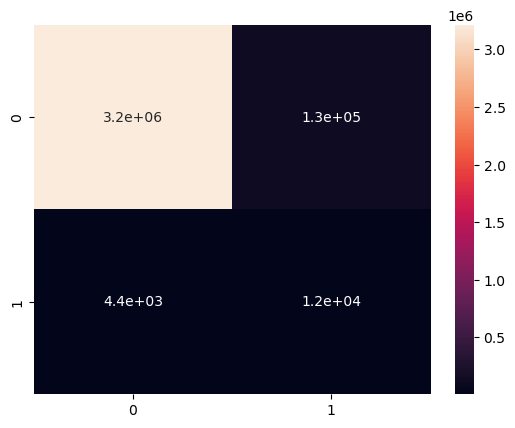

In [106]:
# Update the test and train set
X_train_initial_feature = df_wafers[df_wafers['WaferName'].isin(set(groups[train_idxs_initial]))][feature_columns]
y_train_initial = df_wafers[df_wafers['WaferName'].isin(set(groups[train_idxs_initial]))]['IsScratchDie']

X_test_initial_feature = df_wafers[df_wafers['WaferName'].isin(set(groups[test_idxs_initial]))][feature_columns]
y_test_initial = df_wafers[df_wafers['WaferName'].isin(set(groups[test_idxs_initial]))]['IsScratchDie']

# Fit the Model
if training_run:

    clf_boost_features = XGBClassifier(random_state = 42,scale_pos_weight=100)
    clf_boost_features.fit(X_train_initial_feature.values, y_train_initial.values)

    with open('clf_boost_features.pkl', 'wb') as f:
        pickle.dump(clf_boost_features, f)

else:
    with open('clf_boost_features.pkl', 'rb') as f:
        clf_boost_features = pickle.load(f)

#Predict the clf_boost_features
y_preds = clf_boost_features.predict(X_test_initial_feature)

# Classification report
print(classification_report(y_test_initial, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_initial, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

Using the features that I made we can see that there has been an decrease in recall, but an increase in precision. The recall for class 2 has also increased. This is a good sign, it means that there is some value in the features that have been created. The next step is to see what features are contributing towards these values. 

In [107]:
clf_boost_features.feature_importances_

array([0.03213817, 0.02910018, 0.7560648 , 0.0039271 , 0.01391537,
       0.00828575, 0.00731842, 0.0064073 , 0.00584329, 0.00650889,
       0.00548839, 0.00520845, 0.00654292, 0.07590505, 0.0131966 ,
       0.01385387, 0.00548424, 0.00481122], dtype=float32)

### Further tests using the wafer classifiaction feature

The above three tests were done using all but one feature and the entire availeble train set. However, there is an additional feature, which is found through training 20% of the training data to be able to detect if a wafer has a scatch on it. I am intersted to see if the trade is worth it. Is it worth using 20% of the available dataset to build a model just for one feature or not? Below are the attempts. 

In [108]:
# Select only 80% of data
df_wafers_wafer_model = df_wafers[df_wafers['WaferName'].isin(X_train_per_wafer['Name'].values)]

# Add the Wafer Pred Feature
df_wafers_wafer_model['WaferPred'] = df_wafers_wafer_model['WaferName'].apply(lambda x: wafer_type_pred_dict_train[x] )

In [109]:
df_wafers_wafer_model.isna().sum(axis=0)

WaferName             0
DieX                  0
DieY                  0
IsGoodDie             0
IsScratchDie          0
Ink                   0
WaferScratch          0
Yield_13              0
Cut                   0
KnnClass              0
DbClass               0
NormalisedDistance    0
RndmNN_7              0
ShapeVertical         0
ShapeHorizontal       0
ShapeDiagRight        0
ShapeDiagLeft         0
ShapeCross            0
ShapeDiagCross        0
Yield                 0
RowYield              0
Density               0
ColumnYield           0
ClosestBad            0
WaferPred             0
dtype: int64

In [110]:
feature_columns_wafer = ['DieX', 'DieY', 'IsGoodDie', 'KnnClass', 'DbClass', 'NormalisedDistance', 'RndmNN_7',
       'ShapeVertical', 'ShapeHorizontal', 'ShapeDiagRight', 'ShapeDiagLeft',
       'ShapeCross', 'ShapeDiagCross', 'Yield', 'RowYield', 'ColumnYield','Density',
       'ClosestBad','WaferPred']

feature_columns_wafer_label = ['DieX', 'DieY', 'IsGoodDie', 'KnnClass', 'DbClass', 'NormalisedDistance', 'RndmNN_7',
       'ShapeVertical', 'ShapeHorizontal', 'ShapeDiagRight', 'ShapeDiagLeft',
       'ShapeCross', 'ShapeDiagCross', 'Yield', 'RowYield', 'ColumnYield','Density',
       'ClosestBad','WaferPred','IsScratchDie']

In [111]:
# Create a Validation set--> Stratify and group by split

X = df_wafers_wafer_model.loc[:,feature_columns_wafer]
y = df_wafers_wafer_model.loc[:,'WaferScratch']
groups = df_wafers_wafer_model.loc[:,'WaferName'].values

print("ORIGINAL POSITIVE RATIO:", y.mean())

cv = StratifiedGroupKFold(n_splits=6, shuffle=True, random_state=42)
for fold, (train_idxs_wafer, test_idxs_wafer) in enumerate(cv.split(X, y, groups)):
    print("Fold :", fold)
    # print("TRAIN POSITIVE RATIO:", y[train_idxs_wafer].mean())
    # print("TEST POSITIVE RATIO :", y[test_idxs_wafer].mean())
    print("TRAIN GROUPS        :", set(groups[train_idxs_wafer]))
    print("TEST GROUPS         :", set(groups[test_idxs_wafer]))
    print("TRAIN GROUPS RATIO:", len(set(groups[train_idxs_wafer]))/wafer_count)
    print("TEST GROUPS RATIO:", len(set(groups[test_idxs_wafer]))/wafer_count)
    break

ORIGINAL POSITIVE RATIO: 0.5071528856438924
Fold : 0
TRAIN GROUPS        : {'b1060d', '05cf53', '0a674f', '4090f9', '75b34b', 'dd12e8', 'b09b36', '957e43', '05f6d1', 'f8d676', '5d7875', '85abd5', 'b2fd5b', '4745ba', 'a1bcf8', 'fafbe7', '83f20d', 'f354c8', 'a1f074', '48a9b0', 'd61ea7', '3843e0', '7294c7', '441472', '4f09ec', '7aafe5', '501a55', '102112', '40e355', 'a4b5fd', '25cc44', 'a45260', '257ddc', '6e17c7', 'd961f4', '5d88c1', '8e1aa6', '80dcfb', '0b5bb1', 'ee57c3', 'f9b367', 'dfecc7', '88b0c0', '26cce1', '02d2f5', '1a5a05', 'a0e533', '1ab3bd', 'bfef4e', '94b7dd', '79a216', '033edf', '8692d0', 'bc3148', '2e63b5', '37d9a6', '7babd3', '5cc75e', '24c5c7', 'a8ea70', 'c3e10a', '65379c', 'f95a90', '775c34', 'c44681', '02d701', '603461', 'd8c4b4', '2baa60', '30f46b', '6c3869', '4d39da', '1ad61a', 'fb7e91', '6361fd', '16617f', '5513d3', '4db0cc', 'ab8f2d', 'f80095', 'cab9de', 'abe8c7', '45c537', '025425', '9d307f', '01d250', '9f438a', 'f41785', '35912a', '1ac4f5', '2bb861', 'b54dc5', '0e2

In [112]:
# Seperate the Data
X_train_wafer =  df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][['DieX','DieY','IsGoodDie']]
y_train_wafer =  df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))]['IsScratchDie']

X_test_wafer =  df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))][['DieX','DieY','IsGoodDie']]
y_test_wafer =  df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))]['IsScratchDie']

#### Benchmark

Now that we are using a smaller dataset i want to redo the benchmark to gauge any chances that may occur. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    479708
           1       0.00      0.00      0.00      2251

    accuracy                           1.00    481959
   macro avg       0.50      0.50      0.50    481959
weighted avg       0.99      1.00      0.99    481959



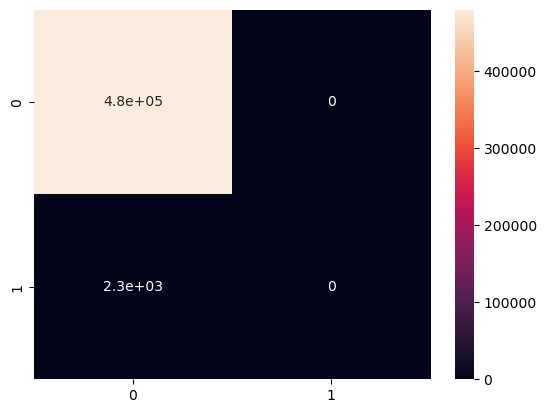

In [113]:
# Fit the model_xgboost_benchmark_wafer
if training_run:
    model_xgboost_benchmark_wafer = XGBClassifier(random_state = 42)
    model_xgboost_benchmark_wafer.fit(X_train_wafer.values, y_train_wafer.values)

    with open('model_xgboost_benchmark_wafer.pkl', 'wb') as f:
        pickle.dump(model_xgboost_benchmark_wafer, f)

else:
    with open('model_xgboost_benchmark_wafer.pkl', 'rb') as f:
        model_xgboost_benchmark_wafer = pickle.load(f)
    

#Predict the model_xgboost_benchmark_wafer
y_preds = model_xgboost_benchmark_wafer.predict(X_test_wafer)

# Classification report
print(classification_report(y_test_wafer, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_wafer, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [114]:
model_xgboost_benchmark_wafer.feature_importances_

array([0.01658198, 0.01611609, 0.96730196], dtype=float32)

#### Apply weighting to the class disparity

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    479708
           1       0.04      0.72      0.08      2251

    accuracy                           0.92    481959
   macro avg       0.52      0.82      0.52    481959
weighted avg       0.99      0.92      0.96    481959



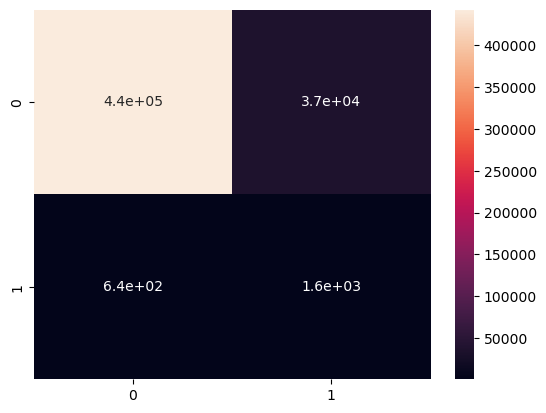

In [115]:
# Fit the model_xgboost_weight_wafer
if training_run:
    model_xgboost_weight_wafer = XGBClassifier(random_state = 42,scale_pos_weight=100)
    model_xgboost_weight_wafer.fit(X_train_wafer.values, y_train_wafer.values)

    with open('model_xgboost_weight_wafer.pkl', 'wb') as f:
        pickle.dump(model_xgboost_weight_wafer, f)

else:
    with open('model_xgboost_weight_wafer.pkl', 'rb') as f:
        model_xgboost_weight_wafer = pickle.load(f)

#Predict the model_xgboost_weight_wafer
y_preds = model_xgboost_weight_wafer.predict(X_test_wafer)

# Classification report
print(classification_report(y_test_wafer, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_wafer, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [116]:
model_xgboost_weight_wafer.feature_importances_

array([0.02458058, 0.02430028, 0.9511192 ], dtype=float32)

#### Use All Features And 80% of the Total Train Set

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    479708
           1       0.11      0.61      0.19      2251

    accuracy                           0.98    481959
   macro avg       0.55      0.79      0.59    481959
weighted avg       0.99      0.98      0.98    481959



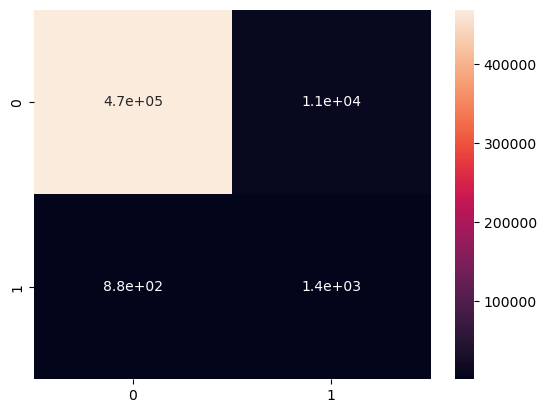

In [117]:

# Seperate the Data
X_train_wafer_feature = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][feature_columns_wafer]
y_train_wafer_feature = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))]['IsScratchDie']

X_test_wafer_feature = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))][feature_columns_wafer]
y_test_wafer_feature = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))]['IsScratchDie']

# Fit the model_xgboost_wafer
if training_run:
    model_xgboost_wafer = XGBClassifier(random_state = 42,scale_pos_weight=100)
    model_xgboost_wafer.fit(X_train_wafer_feature.values, y_train_wafer_feature.values)

    with open('model_xgboost_wafer.pkl', 'wb') as f:
        pickle.dump(model_xgboost_wafer, f)

else:
    with open('model_xgboost_wafer.pkl', 'rb') as f:
        model_xgboost_wafer = pickle.load(f)

#Predict the model_xgboost_wafer
y_preds = model_xgboost_wafer.predict(X_test_wafer_feature)

# Classification report
print(classification_report(y_test_wafer_feature, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_wafer_feature, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [118]:
pd.Series(model_xgboost_wafer.feature_importances_, feature_columns_wafer).sort_values(ascending=False)

WaferPred             0.802526
IsGoodDie             0.125909
Yield                 0.008210
DieX                  0.008002
DieY                  0.007231
RowYield              0.005885
DbClass               0.005588
ColumnYield           0.005291
NormalisedDistance    0.003968
ShapeDiagCross        0.003333
ShapeVertical         0.003109
Density               0.003068
ShapeDiagRight        0.003045
ShapeCross            0.002861
ClosestBad            0.002854
RndmNN_7              0.002575
ShapeHorizontal       0.002571
ShapeDiagLeft         0.002067
KnnClass              0.001907
dtype: float32

There are two interesting findings here. 
- With the addition of the new features the precision and f1 score have increased alot, however the recall has dropped. This suggests that it is identifying less scratched dies, however the dies that it is identifying are more correct, which is also worthwile.
- When looking at the feature importance we can see that the good,bad die is still contributing a large amount, 0.14, however it has dropped from the previous 0.95. We can also see that the new feature has taken the highest spot with 0.78. 

Since the f1 score has increased, and even though the model is finding less scratched dies, the proportion of dies classified as scratched has increased, and considering the high feature importance for the wafer feature, I believe it is worth continuing utilizing the WaferPred feature.

### Feature Selection

#### Correlation Between Features

<Axes: >

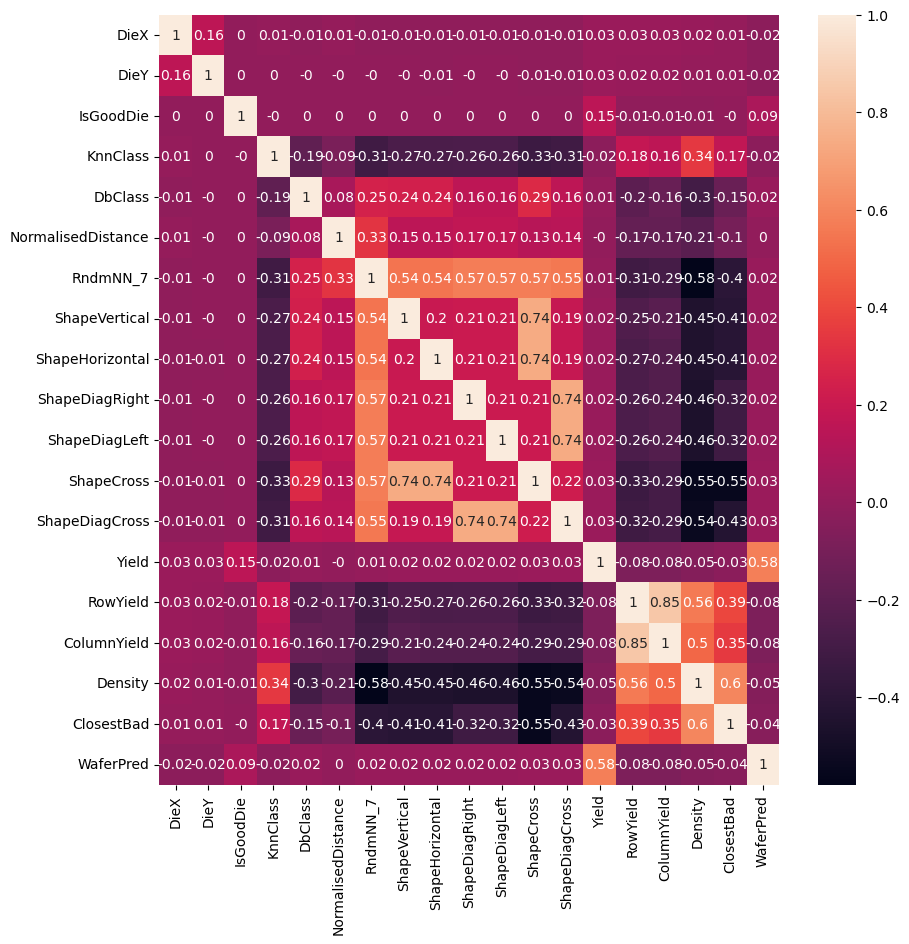

In [119]:
X_train_corr = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][feature_columns_wafer]

corr = X_train_corr.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr.round(2), annot= True)

## DO THE CORRELATION WITH THE Y_LABEL

<Axes: >

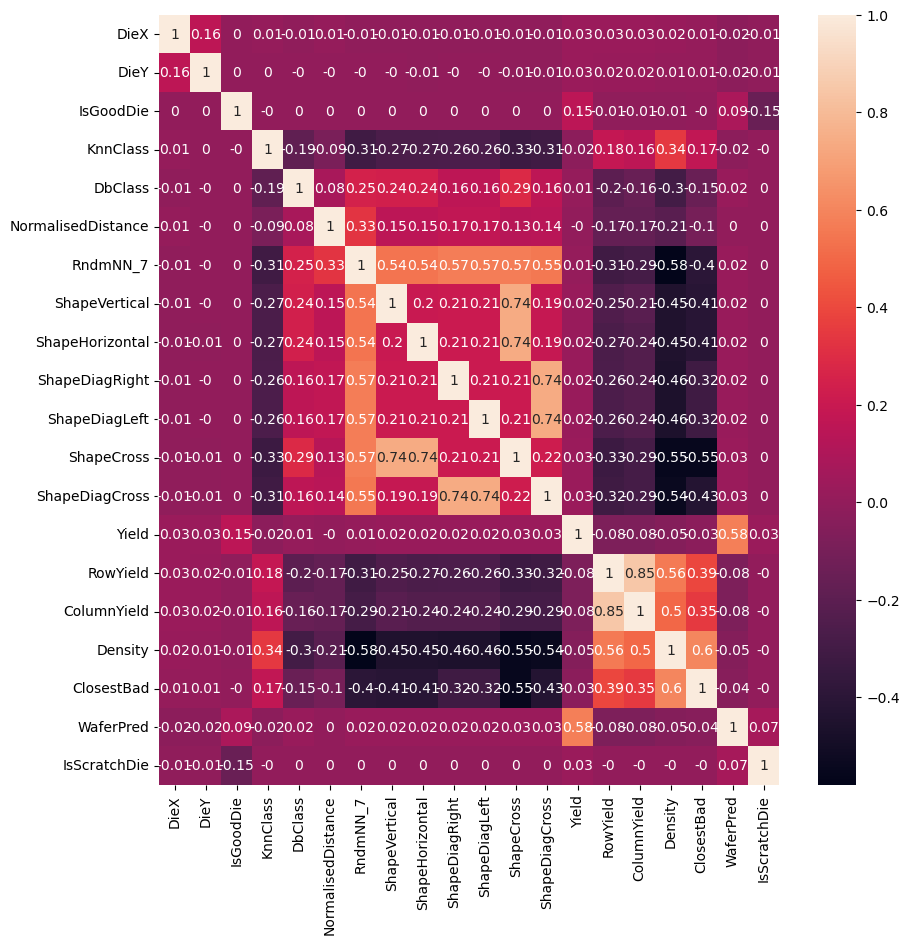

In [120]:
X_train_corr = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][feature_columns_wafer_label]

corr = X_train_corr.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr.round(2), annot= True)

## DO THE CORRELATION WITH THE Y_LABEL

#### Information Gain

In [121]:
X_train_info_gain = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][feature_columns_wafer]
y_train_info_gain = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))]['IsScratchDie']

if training_run:
    mutual_importance = mutual_info_classif(X_train_info_gain, y_train_info_gain)
    np.save("mutual_importance.npy",mutual_importance )
else:
    mutual_importance = np.load('mutual_importance.npy')

pd.Series(mutual_importance, X_train_info_gain.columns).sort_values(ascending=False)

IsGoodDie             0.257415
KnnClass              0.228336
Density               0.103767
WaferPred             0.079489
ClosestBad            0.078534
ShapeDiagCross        0.074576
ShapeCross            0.068639
RndmNN_7              0.059131
ShapeDiagRight        0.058176
ShapeDiagLeft         0.058040
ShapeHorizontal       0.053540
ShapeVertical         0.053474
DieY                  0.007273
DieX                  0.007061
Yield                 0.005387
RowYield              0.002996
ColumnYield           0.002960
DbClass               0.002695
NormalisedDistance    0.000306
dtype: float64

#### Custom One Feature Search

Text(0, 0.5, 'Percent')

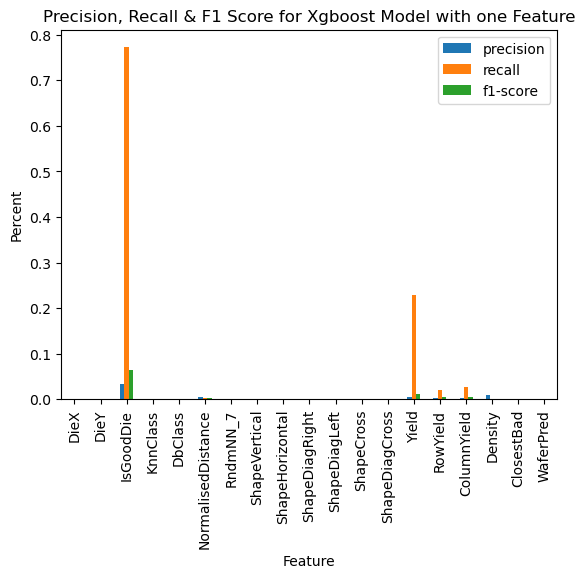

In [122]:
if training_run: 
    search_results = {}
    for feature in tqdm(feature_columns_wafer):
        X_train_search = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][feature]
        y_train_search = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))]['IsScratchDie']

        X_test_search = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))][feature]
        y_test_search = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))]['IsScratchDie']

        model_custom_search = XGBClassifier(random_state = 42,scale_pos_weight=100)
        model_custom_search.fit(X_train_search, y_train_search)
        #Predict the model_custom_search
        y_preds = model_custom_search.predict(X_test_search)

        # Classification report
        search_results[feature] = classification_report(y_test_search, y_preds, output_dict=True)

    with open('custom_search.pkl', 'wb') as f:
        pickle.dump(search_results, f)
else:
    with open('custom_search.pkl', 'rb') as f:
        search_results = pickle.load(f)

trial_df = pd.DataFrame()

for key in list(search_results.keys()):
    trial_df = pd.concat((trial_df,pd.DataFrame(search_results[key]['1'].values(),search_results[key]['1'].keys()).T))

trial_df.index = list(search_results.keys())
trial_df.drop(['support'], inplace= True, axis=1)
trial_df.plot.bar()
plt.title('Precision, Recall & F1 Score for Xgboost Model with one Feature')
plt.xlabel('Feature')
plt.ylabel('Percent')

#### Recursive Feature Selection

In [123]:
#recursive feature elimination
#Fit the model
if training_run:
    model_recursive = XGBClassifier(random_state = 42,scale_pos_weight=100)
    rfecv = RFECV(estimator=model_recursive, step=2, cv=StratifiedKFold(2), scoring='recall',n_jobs=-1, verbose=1)
    rfecv.fit(X_train_wafer_feature, y_train_wafer_feature)
    
    with open('rfecv_model.pkl', 'wb') as f:
        pickle.dump(rfecv, f)
else:
    with open('rfecv_model.pkl', 'rb') as f:
        rfecv = pickle.load(f)

#Selected features
print("Optimal number of features : %d" % rfecv.n_features_)
print(X_train_wafer_feature.columns[rfecv.get_support()])

Optimal number of features : 1
Index(['WaferPred'], dtype='object')


In [124]:
feature_ranking_dict = dict(zip(rfecv.ranking_, feature_columns_wafer))
dict(sorted(feature_ranking_dict.items(), key=lambda item: item[0]))

{1: 'WaferPred',
 2: 'Yield',
 3: 'DieY',
 4: 'ColumnYield',
 5: 'ClosestBad',
 6: 'Density',
 7: 'ShapeDiagCross',
 8: 'ShapeDiagRight',
 9: 'RndmNN_7',
 10: 'ShapeDiagLeft'}

In [125]:
rfecv.cv_results_

{'mean_test_score': array([0.89030612, 0.50108225, 0.52002165, 0.49644403, 0.49397032,
        0.49064626, 0.4979128 , 0.49806741, 0.49335189, 0.48886827]),
 'std_test_score': array([0.10969388, 0.48685838, 0.46281694, 0.44248609, 0.45006184,
        0.44225417, 0.43606988, 0.44039889, 0.43692022, 0.43305504]),
 'split0_test_score': array([1.        , 0.98794063, 0.98283859, 0.93893012, 0.94403216,
        0.93290043, 0.93398268, 0.9384663 , 0.93027211, 0.92192331]),
 'split1_test_score': array([0.78061224, 0.01422387, 0.0572047 , 0.05395795, 0.04390847,
        0.04839208, 0.06184292, 0.05766852, 0.05643166, 0.05581323])}

#### COMMENT ON WHAT FEATURES ARE SELCTED AND WHY

All the above tests have lead me to the conclusion that it is worth removing some features. Removing features will not only make the training and optimization of the models quicker it will also remove features that dont seem to have any information hidden in them, or features that are getting in the way of the predictions. :( . I would have liked to do some more feature selection tests as well as do the same tests on different models, however there are time constraints and it is not always possible.Perhaps using different models would show value to some features that appear to be useless. Here are the conclusions from the above tests:

- Xgboost Feature Importance:
    - The feature importance places WaferPred in first place with 0.78, followed by IsGoodDie with 0.14. Yield, DieX and DieY have a small weight and the other features are not very important. 

- Correlation:
    - Between dependant and independant Variables:
        - We can see that there is a small correlation when looking at WaferPred, DieX,DieY,Yield, and a larger correlation with IsGoodDie. All The other features are zero.
    - Between inependant Variables
        - Many of the dependant features or correlated with other dependant features. 
    The above findings suggest that only WaferPred, DieX,DieY,Yield & IsGoodDie should be kept. 

- Information Gain:
    - This shows that the most important features are "IsGoodDie","knnCLass",'Density",'ClosestBad",'WaferPred","ShapeDiagCross". With the remainign features having little to no importance. 

- Custom One Feature Search
    - This feature shows that the most important features are IsGoodDie, Yield, RowYield, ColumnYield & density. With everyother feature not being able to increase the recall. 

- Recursive Feature Search
    - This algorithm suggested that it was only worth using one feature. WaferPred, however the other top features were "Yield", "DieY", 'ColumnYield','Rndm_7'.

From the above feature selection techniques, I would like to proposue the use of the following features top 9 Features, in no particular order:

    -'WaferPred','IsGoodDie','Yield''DieX', 'DieY','ClosestBad','Density,'ColumnYield', 'RowYield'

### Model Optimization

I would like to do hyperparamater tuning for each model, but that is very time consuming and as such I have shown a method applied to Xgboost. GridSearch and random search are good options, but yet again they are very time consuming. One approach to try and solve the time constrains would be to implement a method utilizing multiprocessing. I did this, however there was a ram constraint and it was taking a really long time. As such I have opted not to attempy any other hyperparamater tuning methodologies for any of the other models.

In [126]:
selected_features = ['WaferPred','IsGoodDie','Yield','DieX', 'DieY','ClosestBad','Density','ColumnYield', 'RowYield']

X_train_features = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))][selected_features]
y_train_features = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[train_idxs_wafer]))]['IsScratchDie']

X_test_features = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))][selected_features]
y_test_features = df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))]['IsScratchDie']

#### XGBOOST Optuna

In [127]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'scale_pos_weight':100
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train_features, y_train_features)

    # Make predictions
    y_pred = optuna_model.predict(X_test_features)

    # Evaluate predictions
    recall = recall_score(y_test_features, y_pred)
    return recall

In [128]:
if training_run:
    study = optuna.create_study(direction='maximize')

    study.optimize(objective, n_trials=5,show_progress_bar=True)

    with open('optuna_study.pkl', 'wb') as f:
        pickle.dump(study, f)
else:
    with open('optuna_study.pkl', 'rb') as f:
        study = pickle.load(f)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 5
Best trial:
  Value: 0.76499333629498
  Params: 
    max_depth: 3
    learning_rate: 0.06618236944963513
    n_estimators: 289
    min_child_weight: 5
    gamma: 0.0014338975858489672
    subsample: 0.09406622978706453
    colsample_bytree: 0.1799336295913551
    reg_alpha: 0.00028280612849731893
    reg_lambda: 3.5476094765952515e-05


In [129]:
trial.params['scale_pos_weight'] = 100

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    479708
           1       0.10      0.76      0.17      2251

    accuracy                           0.97    481959
   macro avg       0.55      0.87      0.58    481959
weighted avg       0.99      0.97      0.98    481959



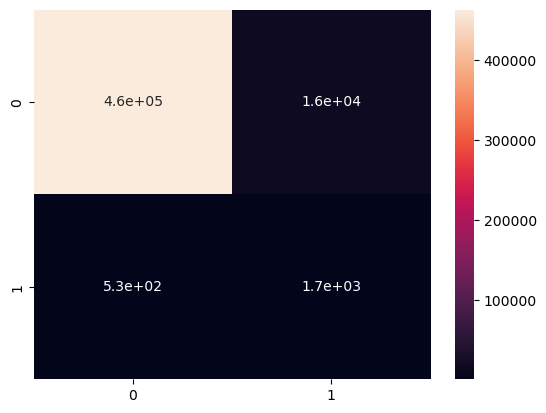

In [130]:

if training_run:
    # Fit the model
    model_xgboost = XGBClassifier(**trial.params)

    model_xgboost.fit(X_train_features, y_train_features)
    with open('model_xgboost.pkl', 'wb') as f:
        pickle.dump(model_xgboost, f)

else:
    with open('model_xgboost.pkl', 'rb') as f:
        model_xgboost = pickle.load(f)

# Make predictions
y_preds = model_xgboost.predict(X_test_features)

# Classification report
print(classification_report(y_test_features, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()


#### Compliment Naive-Bayes

Using Compliment Naive-Bayes as it is better at dealing with unbalanced data

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    479708
           1       0.04      0.77      0.08      2251

    accuracy                           0.92    481959
   macro avg       0.52      0.85      0.52    481959
weighted avg       0.99      0.92      0.95    481959



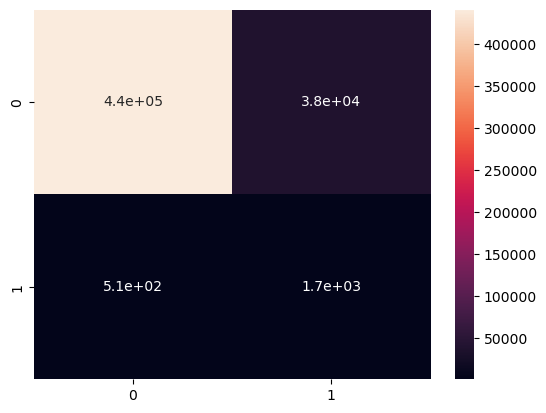

In [131]:
if training_run:
    model_complimentNb = ComplementNB().fit(X_train_features, y_train_features)

    with open('model_complimentNb.pkl', 'wb') as f:
        pickle.dump(model_complimentNb, f)

else:
    with open('model_complimentNb.pkl', 'rb') as f:
        model_complimentNb = pickle.load(f)

y_preds = model_complimentNb.predict(X_test_features)

# Classification report
print(classification_report(y_test_features, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

#### SVC

I tried to do svc, mutliple times, and it took hours. Eventually I had to scrap it.

#### Logistic Regression

In [132]:
class_weights = generate_class_weights(y_train_features)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    479708
           1       0.09      0.77      0.16      2251

    accuracy                           0.96    481959
   macro avg       0.55      0.87      0.57    481959
weighted avg       0.99      0.96      0.98    481959



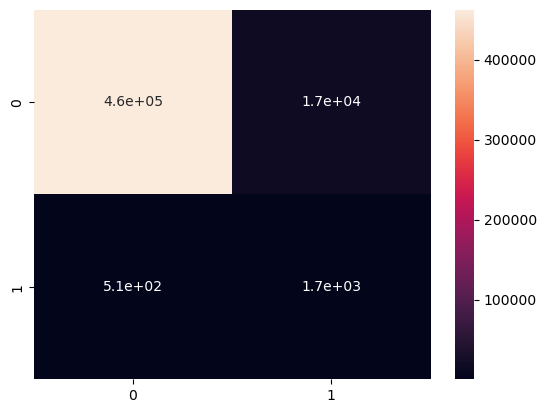

In [133]:
if training_run:
    model_logic = LogisticRegression(class_weight=class_weights)
    model_logic.fit(X_train_features, y_train_features)

    with open('model_logic.pkl', 'wb') as f:
        pickle.dump(model_logic, f)

else:
    with open('model_logic.pkl', 'rb') as f:
        model_logic = pickle.load(f)

y_preds = model_logic.predict(X_test_features)

# Classification report
print(classification_report(y_test_features, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

#### Catboost Classifier

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    479708
           1       0.10      0.75      0.18      2251

    accuracy                           0.97    481959
   macro avg       0.55      0.86      0.58    481959
weighted avg       0.99      0.97      0.98    481959



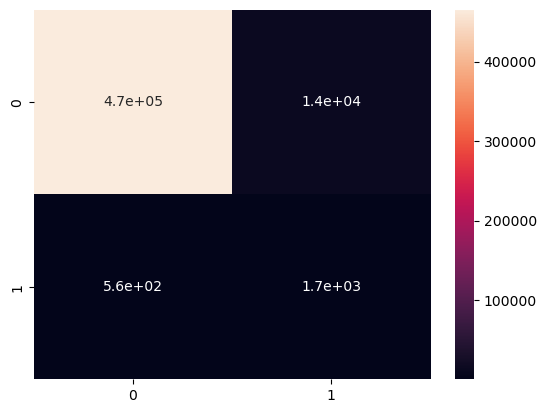

In [134]:
if training_run:
    model_cat = CatBoostClassifier( class_weights= [0.01,0.99],
                                    verbose = 0,
                                    task_type='GPU')

    # Fit model_cat
    model_cat.fit(X_train_features, y_train_features)

    with open('model_cat.pkl', 'wb') as f:
        pickle.dump(model_cat, f)
else:
    with open('model_cat.pkl', 'rb') as f:
        model_cat = pickle.load(f)

# Get predicted classes
y_preds = model_cat.predict(X_test_features)

# Classification report
print(classification_report(y_test_features, y_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, y_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()


#### FFNN

I tried to train an FFNN using google colab with the intention of saving the model and using it here. However due to the size of the data training was taking a long time. In order to save time I was training a low amount of epochs which resulted in the model preidcted all one class. It obviosly needed more time to train, as well as tuning the number of nodes and layers, which was not feasible, as such I also had to scrap the FFNN. Below is the code implemntation. 

In [135]:
# model = tf.keras.Sequential([
# tf.keras.layers.Dense(1024, activation='relu', input_shape=(10,)),
# tf.keras.layers.Dense(1024, activation='relu'),
# tf.keras.layers.Dense(512, activation='relu'),
# tf.keras.layers.Dense(256, activation='relu'),
# tf.keras.layers.Dense(128, activation='relu'),
# tf.keras.layers.Dense(1, activation='sigmoid')])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(),
#              metrics=['Recall','Precision'])

# class_weights = generate_class_weights(y_train_features)
# history = model.fit(X_train_features.astype('float32'),y_train_features.astype('float32'), epochs=5,class_weight=class_weights, validation_data=(X_test_features.astype('float32'),y_test_features.astype('float32')))

### Ensemble Model

Using the above collection of weak learners, I will combine them into one stronger predictor. I will be using a soft voting methodology, utilizing the average predicted probability of the combined models. THRESHOLD

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    479708
           1       0.09      0.77      0.17      2251

    accuracy                           0.96    481959
   macro avg       0.55      0.87      0.57    481959
weighted avg       0.99      0.96      0.98    481959



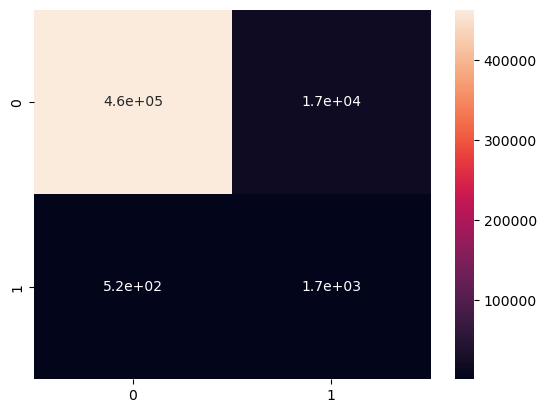

In [136]:
#Load Models
boost_preds = model_xgboost.predict_proba(X_test_features)
nb_preds = model_complimentNb.predict_proba(X_test_features)
log_preds = model_logic.predict_proba(X_test_features)
cat_preds = model_cat.predict_proba(X_test_features)


df_preds = pd.DataFrame({
    'boost':boost_preds[:,1],
    'nb':nb_preds[:,1],
    'log': log_preds[:,1],
    'car': cat_preds[:,1]
})

vote_preds = np.where(df_preds.mean(axis=1) > 0.5, 1,0) 

# Classification report
print(classification_report(y_test_features, vote_preds))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, vote_preds)
sns.heatmap(cf_matrix, annot=True)
plt.show()

Overall this model perfoms slighly worse then the xgboost model, however it does outperform the naivebayes, logistic regression amd has a higher precision then the catboost. However, it is hard to tell why it behaves this way, is it getting the same dies correct or is it classifying differnt dies entirely?

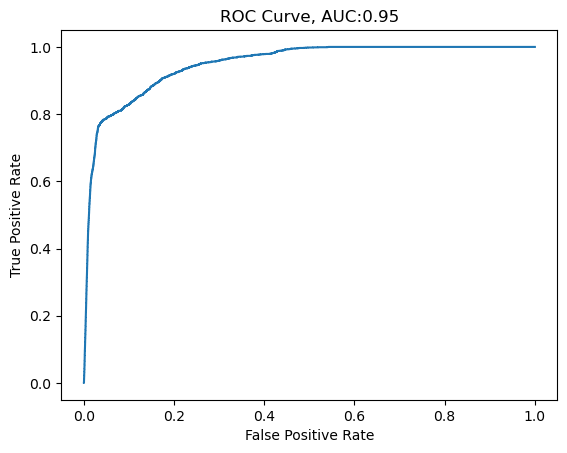

In [137]:
# Plot the Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test_features,df_preds.mean(axis=1),pos_label=1)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'ROC Curve, AUC:{round(roc_auc_score(y_test_features, df_preds.mean(axis=1)),2)}')
plt.show()

The above roc curve is very good, as it is very close to the top left corner which suggest this is a good predictor. THis is further highligted by the high AUC score of 0.95 which is very close to 1. This plot shows the trade off between the False Positive Rate and True Positive rate, and shows us our predictive ability depending on what we would like to priotize. We are abel to increase our true positve rate from 0.8 --> 0.95 however that will also increase the false positve rate from almost 0 to 0.4. 

In [138]:
# Show the difference in Acc, Recall and Precision, when changing the voteing threshold
acc_lst = []
rcll_lst = []
precision_lst = []

for i in np.linspace (0,1,11):
    vote_preds_i = np.where(df_preds.mean(axis=1) > i, 1,0)

    acc_lst.append(accuracy_score(y_test_features, vote_preds_i))
    rcll_lst.append(recall_score(y_test_features, vote_preds_i))
    precision_lst.append(precision_score(y_test_features, vote_preds_i))

Text(0.5, 1.0, 'Accuracy vs Threshold')

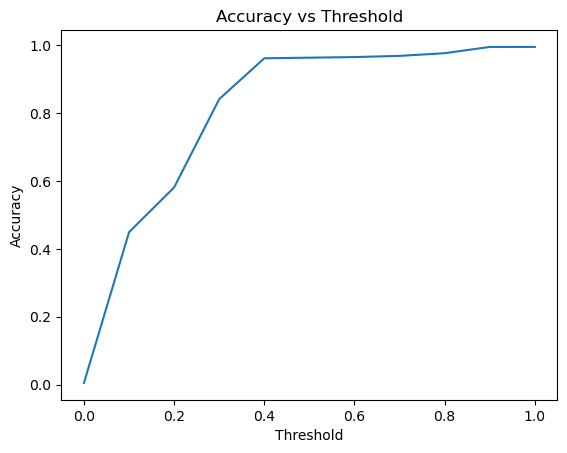

In [139]:
plt.plot(np.linspace (0,1,11),acc_lst)
plt.xlabel('Threshold')
plt.ylabel("Accuracy")
plt.title('Accuracy vs Threshold')

Text(0.5, 1.0, 'Recall vs Threshold')

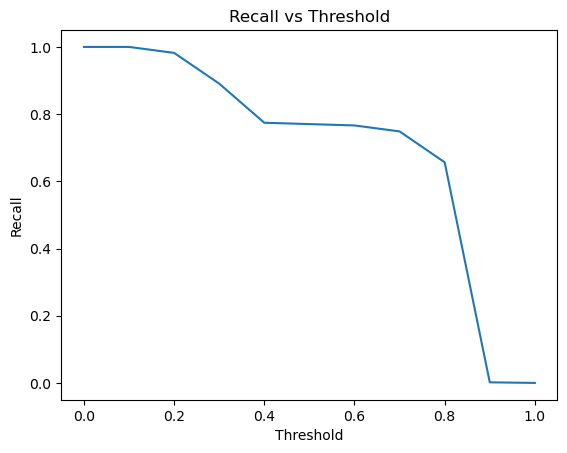

In [140]:
plt.plot(np.linspace (0,1,11),rcll_lst)
plt.xlabel('Threshold')
plt.ylabel("Recall")
plt.title('Recall vs Threshold')

Text(0.5, 1.0, 'Precsion vs Threshold')

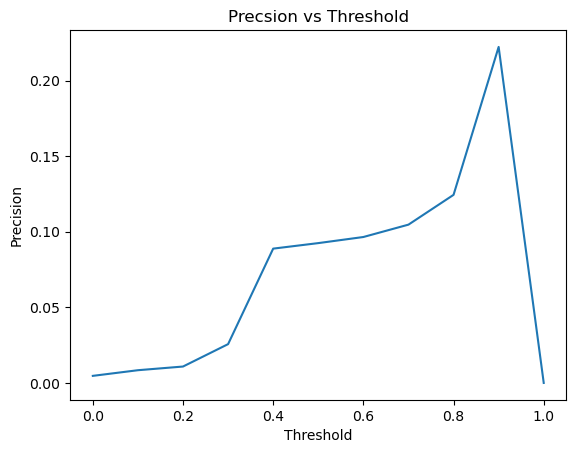

In [141]:
plt.plot(np.linspace (0,1,11),precision_lst)
plt.xlabel('Threshold')
plt.ylabel("Precision")
plt.title('Precsion vs Threshold')

In the above three graphs there seems to be a sudden change around the 0.8 voting threshold, lets see what the impact will be if we swap the threshold from 0.5 to 0.8

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    479708
           1       0.12      0.66      0.21      2251

    accuracy                           0.98    481959
   macro avg       0.56      0.82      0.60    481959
weighted avg       0.99      0.98      0.98    481959



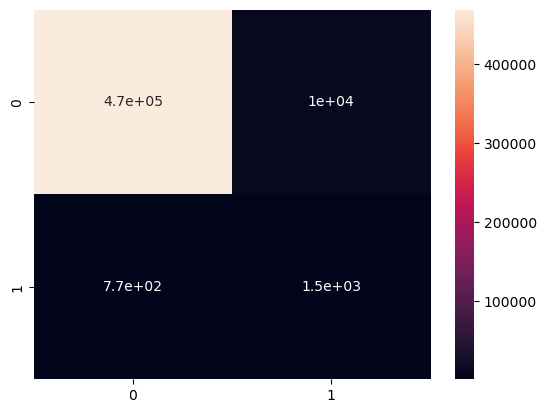

In [142]:
# Seeing results in increase threshold to 0.8
vote_preds_08 = np.where(df_preds.mean(axis=1) > 0.8, 1,0) 

# Classification report
print(classification_report(y_test_features, vote_preds_08))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, vote_preds_08)
sns.heatmap(cf_matrix, annot=True)
plt.show()

We can see that increasing the threshold to 0.8, increases the f1 score and the precision but does reduce the recall. 

#### Error Analysis

In [143]:
# Make a DataFrame with true, predicted and features to help analyse errors
df_error = pd.DataFrame({
    'WaferName': df_wafers_wafer_model[df_wafers_wafer_model['WaferName'].isin(set(groups[test_idxs_wafer]))]['WaferName'].values,
    'true': y_test_features,
    'predicted': vote_preds
})

df_error = pd.concat((df_error, X_test_features), axis=1)

df_error['WaferScratch'] = df_error.WaferName.apply(lambda x : id_scratch_dict[x] )

In [144]:
# Isolate the true positives, true negatives, false positives and false negatives
tp = df_error[(df_error['true'] == 1) & (df_error['predicted'] == 1)]
tn = df_error[(df_error['true'] == 0) & (df_error['predicted'] == 0)]

fp = df_error[(df_error['true'] == 0) & (df_error['predicted'] == 1)]
fn = df_error[(df_error['true'] == 1) & (df_error['predicted'] == 0)]

# Collect above df's into a list
pred_type_lst = [tn,tp,fn,fp]
pred_type_name_lst = ['tn','tp','fn','fp']

In [145]:
# Get Scatch and non scratch wafer names per prediction type

pred_type_dict = {}

# Iterate through prediction type
for count, pred_type in enumerate(pred_type_lst):
    scratched_wafer_lst = []
    non_scratched_wafer_lst = []

    # Get wafername per prediction type
    for name, group_df in pred_type.groupby('WaferName'):
        if group_df['WaferScratch'].sum() > 0:
            scratched_wafer_lst.append(name)
        else:
            non_scratched_wafer_lst.append(name)
    
    pred_type_dict[pred_type_name_lst[count]] = (scratched_wafer_lst,non_scratched_wafer_lst)

TP

In [146]:
total_tp_wafers = len(np.unique(tp['WaferName']))
print('Total Percent of Wafers With A Scratch',len(pred_type_dict['tp'][0]) / total_tp_wafers)
print('Total Percent of Wafers WithOut A Scratch',len(pred_type_dict['tp'][1]) / total_tp_wafers)

Total Percent of Wafers With A Scratch 1.0
Total Percent of Wafers WithOut A Scratch 0.0


We can see that when it comes to the TP predictions, all the wafers used, had a scratch. This attests to the integrity of the data

TN

In [147]:
total_tp_wafers = len(np.unique(tn['WaferName']))
print('Total Percent of Wafers With A Scratch',len(pred_type_dict['tn'][0]) / total_tp_wafers)
print('Total Percent of Wafers WithOut A Scratch',len(pred_type_dict['tn'][1]) / total_tp_wafers)

Total Percent of Wafers With A Scratch 0.4732824427480916
Total Percent of Wafers WithOut A Scratch 0.5267175572519084


FN

In [148]:
total_tp_wafers = len(np.unique(fn['WaferName']))
print('Total Percent of Wafers With A Scratch',len(pred_type_dict['fn'][0]) / total_tp_wafers)
print('Total Percent of Wafers WithOut A Scratch',len(pred_type_dict['fn'][1]) / total_tp_wafers)

Total Percent of Wafers With A Scratch 1.0
Total Percent of Wafers WithOut A Scratch 0.0


For all the FN predictions, all the wafers had a scratch on them. 

FP

In [149]:
total_tp_wafers = len(np.unique(fp['WaferName']))
print('Total Percent of Wafers With A Scratch',len(pred_type_dict['fp'][0]) / total_tp_wafers)
print('Total Percent of Wafers WithOut A Scratch',len(pred_type_dict['fp'][1]) / total_tp_wafers)

Total Percent of Wafers With A Scratch 1.0
Total Percent of Wafers WithOut A Scratch 0.0


We can see that most of the False positives happaned on wafers that already have a scratch

PLOTS

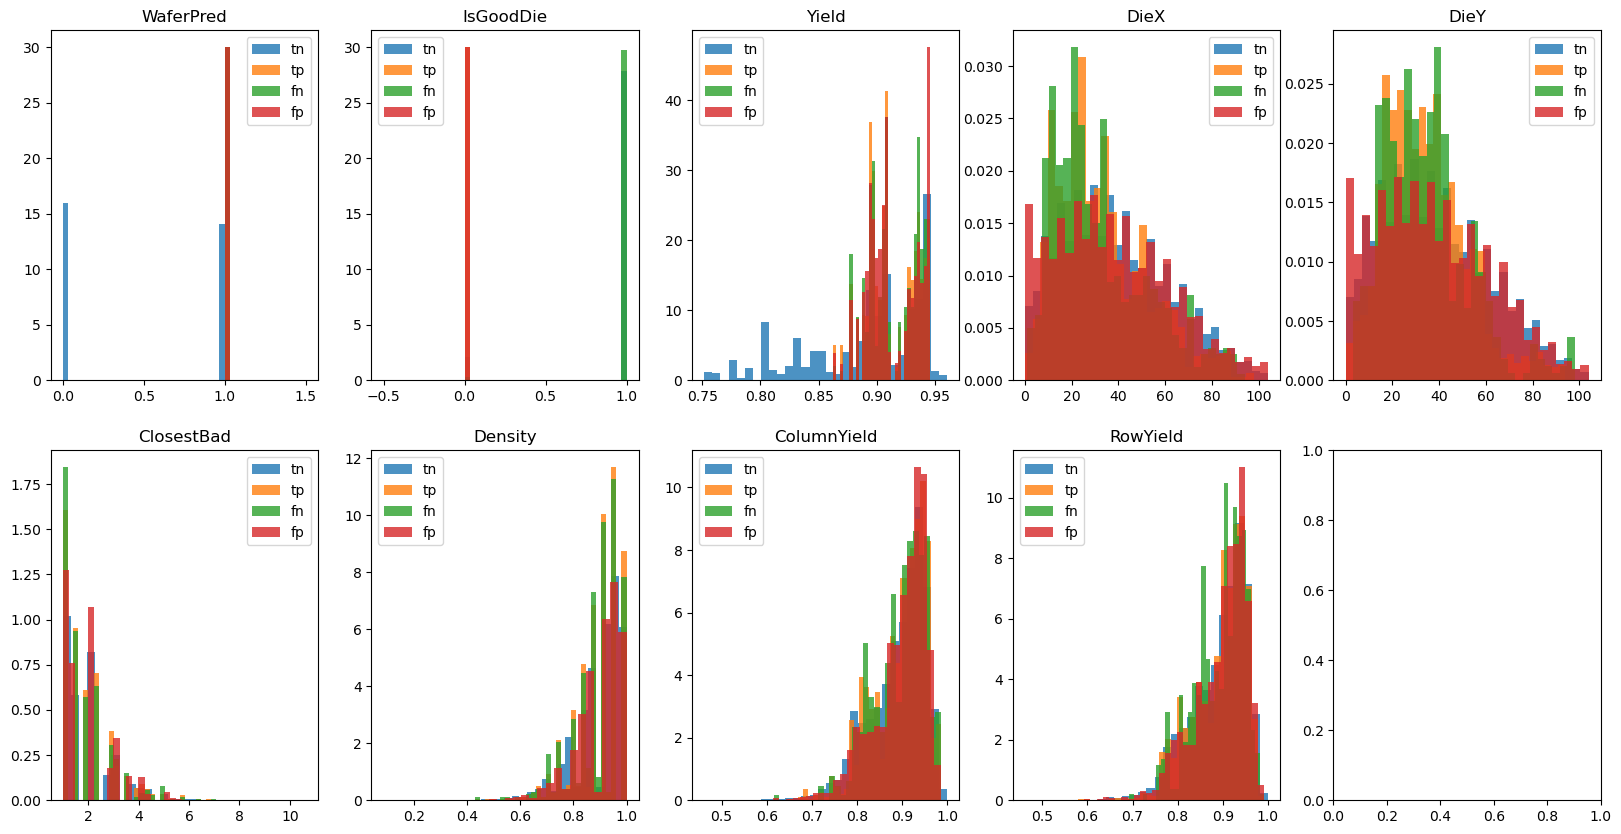

In [150]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

ax= ax.ravel()

for count, feature in enumerate(selected_features):

    ax[count].hist(tn[feature], label = 'tn', density=True, bins = 30, alpha = 0.8)
    ax[count].hist(tp[feature], label = 'tp', density=True, bins = 30, alpha = 0.8)
    ax[count].hist(fn[feature], label = 'fn', density=True, bins = 30, alpha = 0.8)
    ax[count].hist(fp[feature], label = 'fp', density=True, bins = 30, alpha = 0.8)
    ax[count].set_title(f"{feature}")
    ax[count].legend()


The above graphs are try to show the difference in the distributions of the different predictions types for each feature. However since they overlap they are quite hard to read and derive anything from. Below is a similiar representation, which each dot representing the top of a bin in a histrogram. The new graph, which appears to the right, is a graph the shows the percentage difference per point, to try and give some context to the dots.

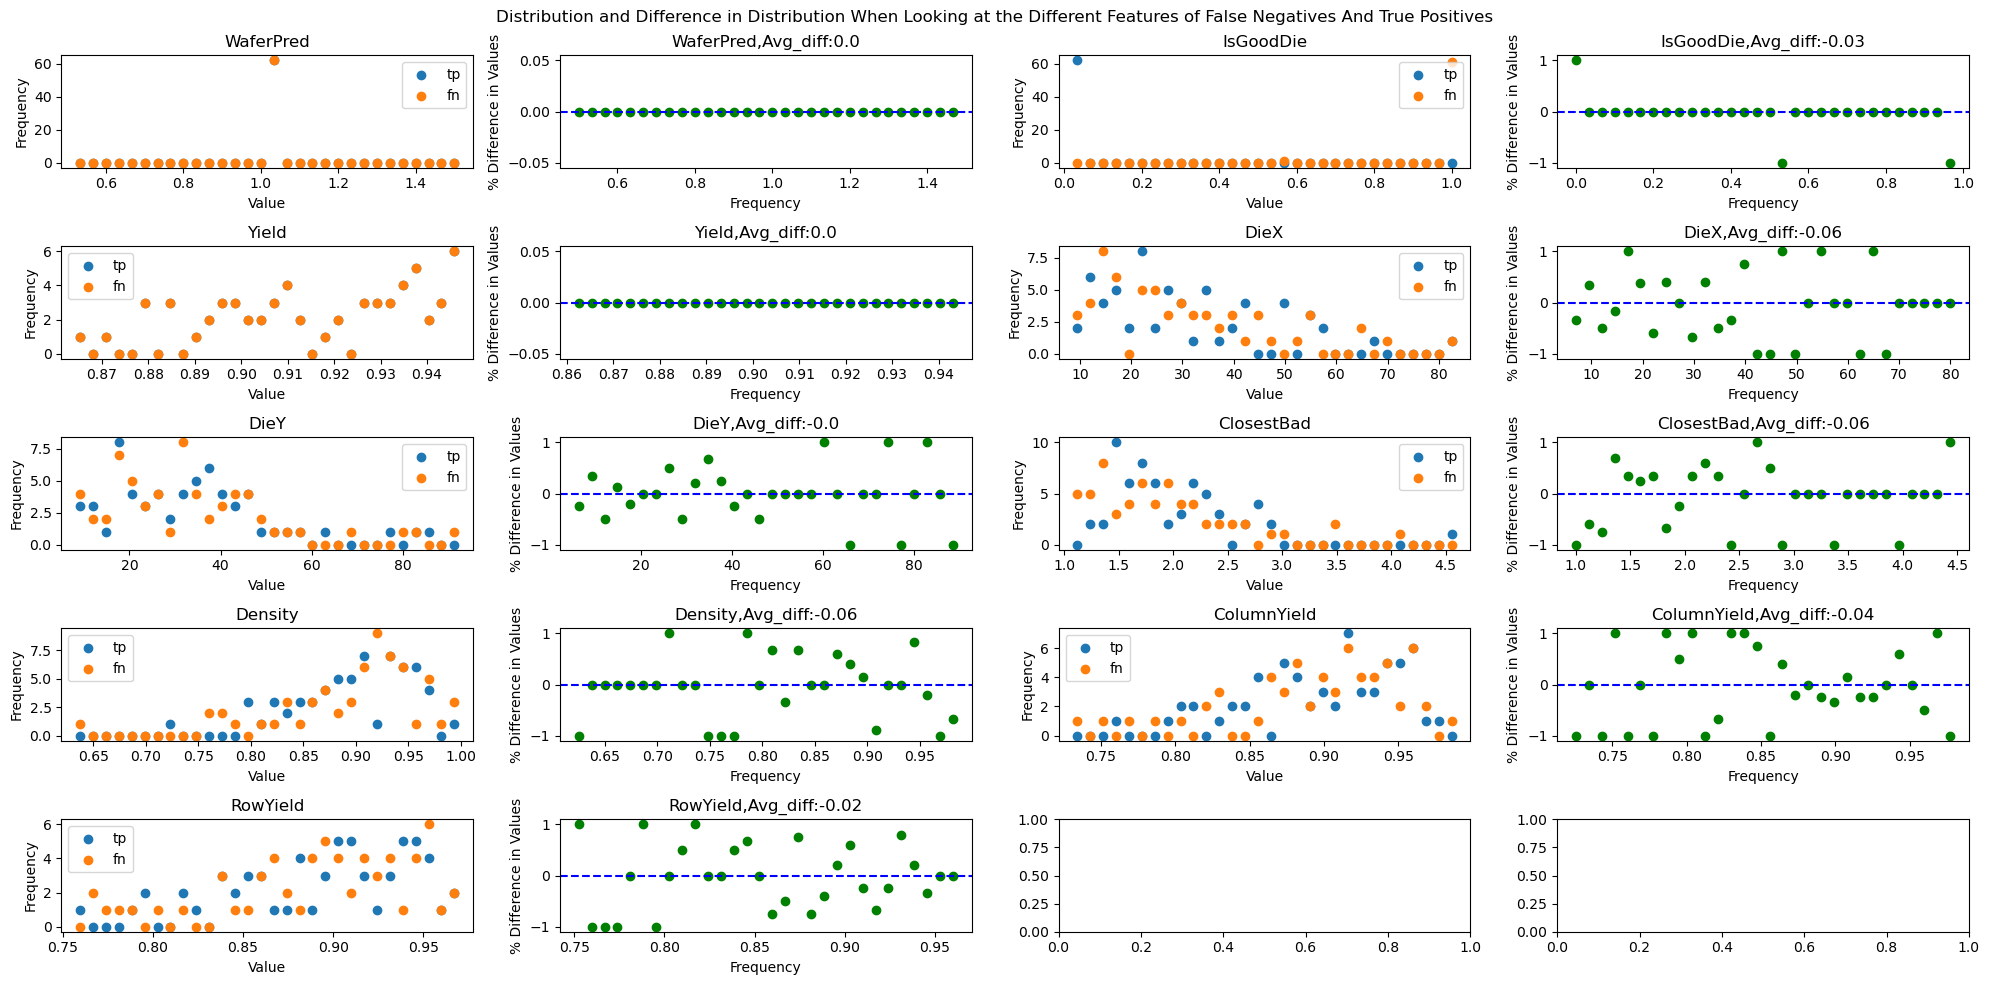

In [151]:
fig, ax = plt.subplots(5,4, figsize=(20, 10))
ax = ax.ravel()

count= 0

for feature in selected_features:
    min_val = np.min((tp.groupby('WaferName').mean()[feature].min(),fn.groupby('WaferName').mean()[feature].min()))
    max_val = np.max((tp.groupby('WaferName').mean()[feature].max(),fn.groupby('WaferName').mean()[feature].max()))

    hist_1, bin_edges_1 =np.histogram(tp.groupby('WaferName').mean()[feature], bins = 30, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_1[1:], y = hist_1, label='tp')
    hist_2, bin_edges_2 =np.histogram(fn.groupby('WaferName').mean()[feature], bins = 30, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_2[1:], y = hist_2, label='fn')
    ax[count].set_title(feature)
    ax[count].set_xlabel('Value')
    ax[count].set_ylabel('Frequency')
    ax[count].legend()
    
    count+=1
    
    ax[count].scatter(x=bin_edges_2[:-1], y = np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0), color='green')
    ax[count].axhline(y =0, color='blue',linestyle='--' )
    ax[count].set_title(f"{feature},Avg_diff:{round(np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0).mean(),2)}")
    ax[count].set_ylabel('% Difference in Values')
    ax[count].set_xlabel('Frequency')
    count+=1

fig.suptitle('Distribution and Difference in Distribution When Looking at the Different Features of False Negatives And True Positives')
plt.tight_layout()

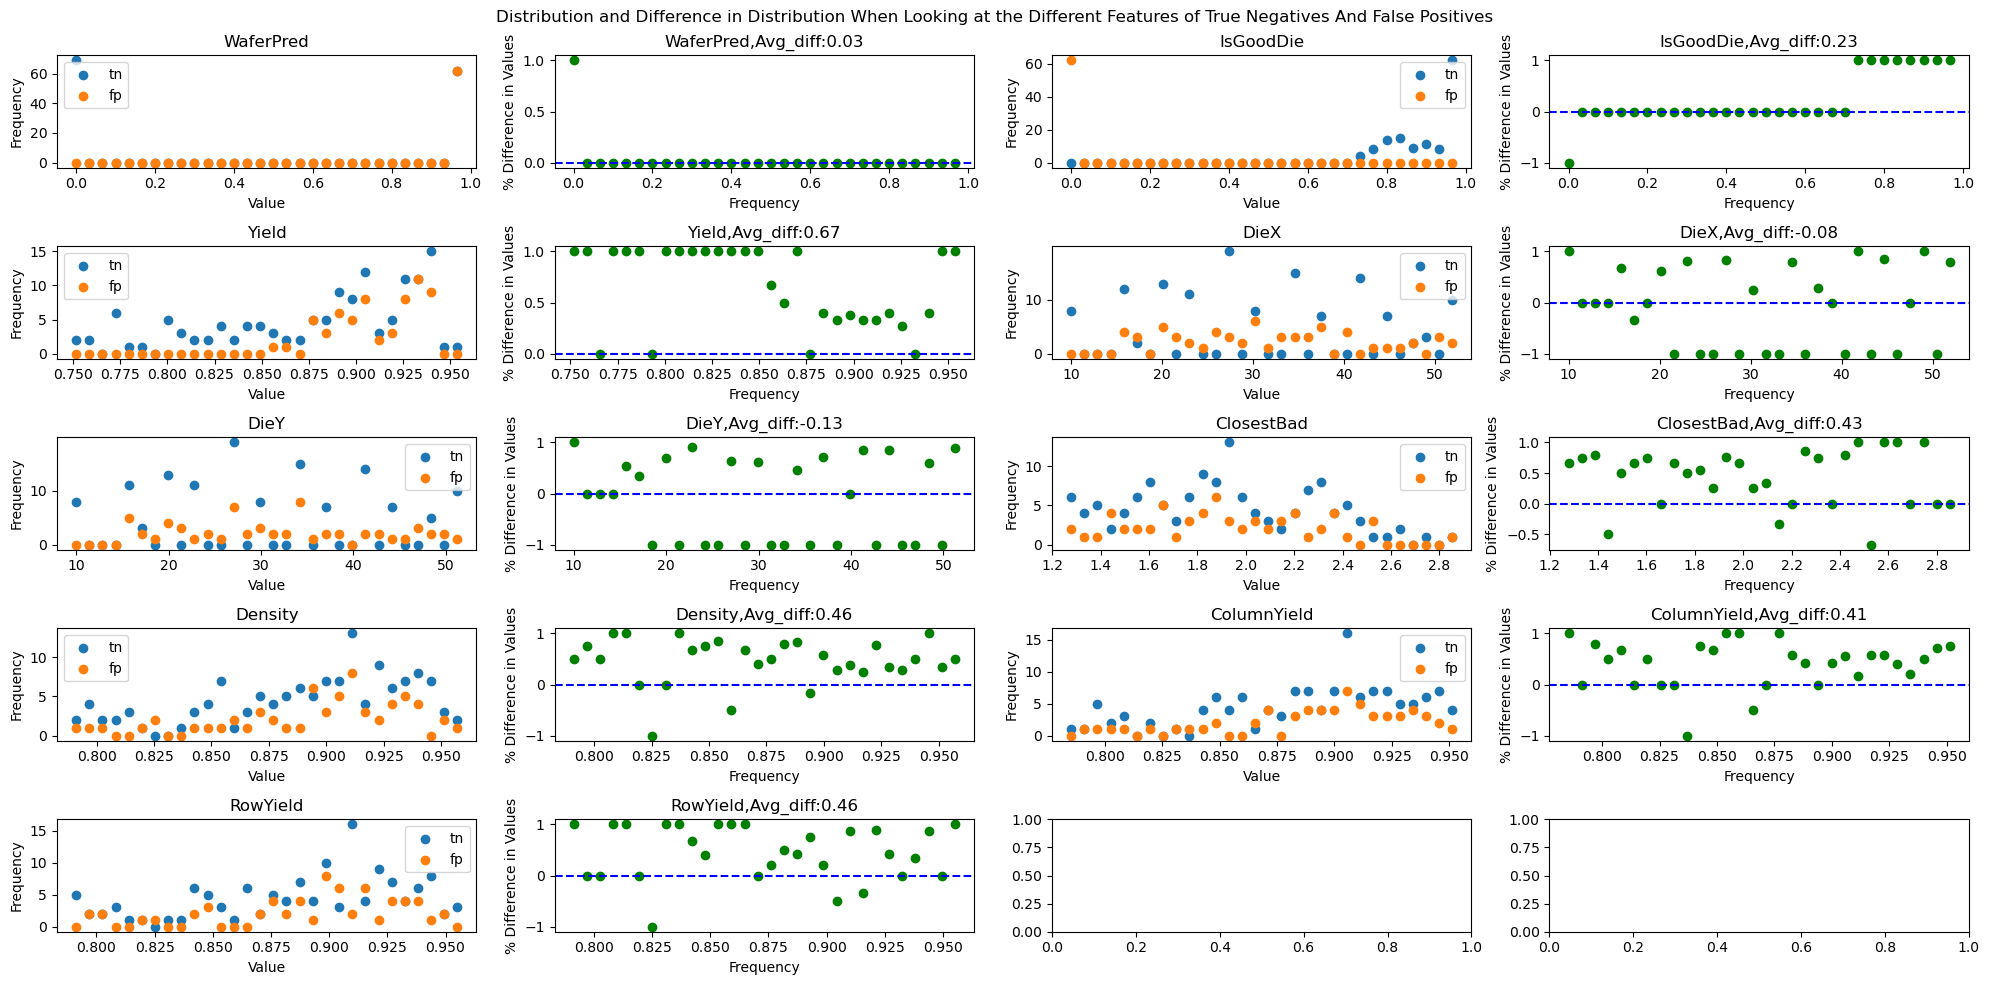

In [152]:
fig, ax = plt.subplots(5,4,figsize=(20, 10))
ax = ax.ravel()

count= 0

for feature in selected_features:
    min_val = np.min((tn.groupby('WaferName').mean()[feature].min(),fp.groupby('WaferName').mean()[feature].min()))
    max_val = np.max((tn.groupby('WaferName').mean()[feature].max(),fp.groupby('WaferName').mean()[feature].max()))

    hist_1, bin_edges_1 =np.histogram(tn.groupby('WaferName').mean()[feature], bins = 30, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_1[:-1], y = hist_1, label='tn')
    hist_2, bin_edges_2 =np.histogram(fp.groupby('WaferName').mean()[feature], bins = 30, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_2[:-1], y = hist_2, label='fp')
    ax[count].set_title(feature)
    ax[count].set_xlabel('Value')
    ax[count].set_ylabel('Frequency')
    ax[count].legend()
    
    count+=1
    
    ax[count].scatter(x=bin_edges_2[:-1], y = np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0), color='green')
    ax[count].axhline(y =0, color='blue',linestyle='--' )
    ax[count].set_title(f"{feature},Avg_diff:{round(np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0).mean(),2)}")
    ax[count].set_ylabel('% Difference in Values')
    ax[count].set_xlabel('Frequency')
    count+=1
fig.suptitle('Distribution and Difference in Distribution When Looking at the Different Features of True Negatives And False Positives')
plt.tight_layout()

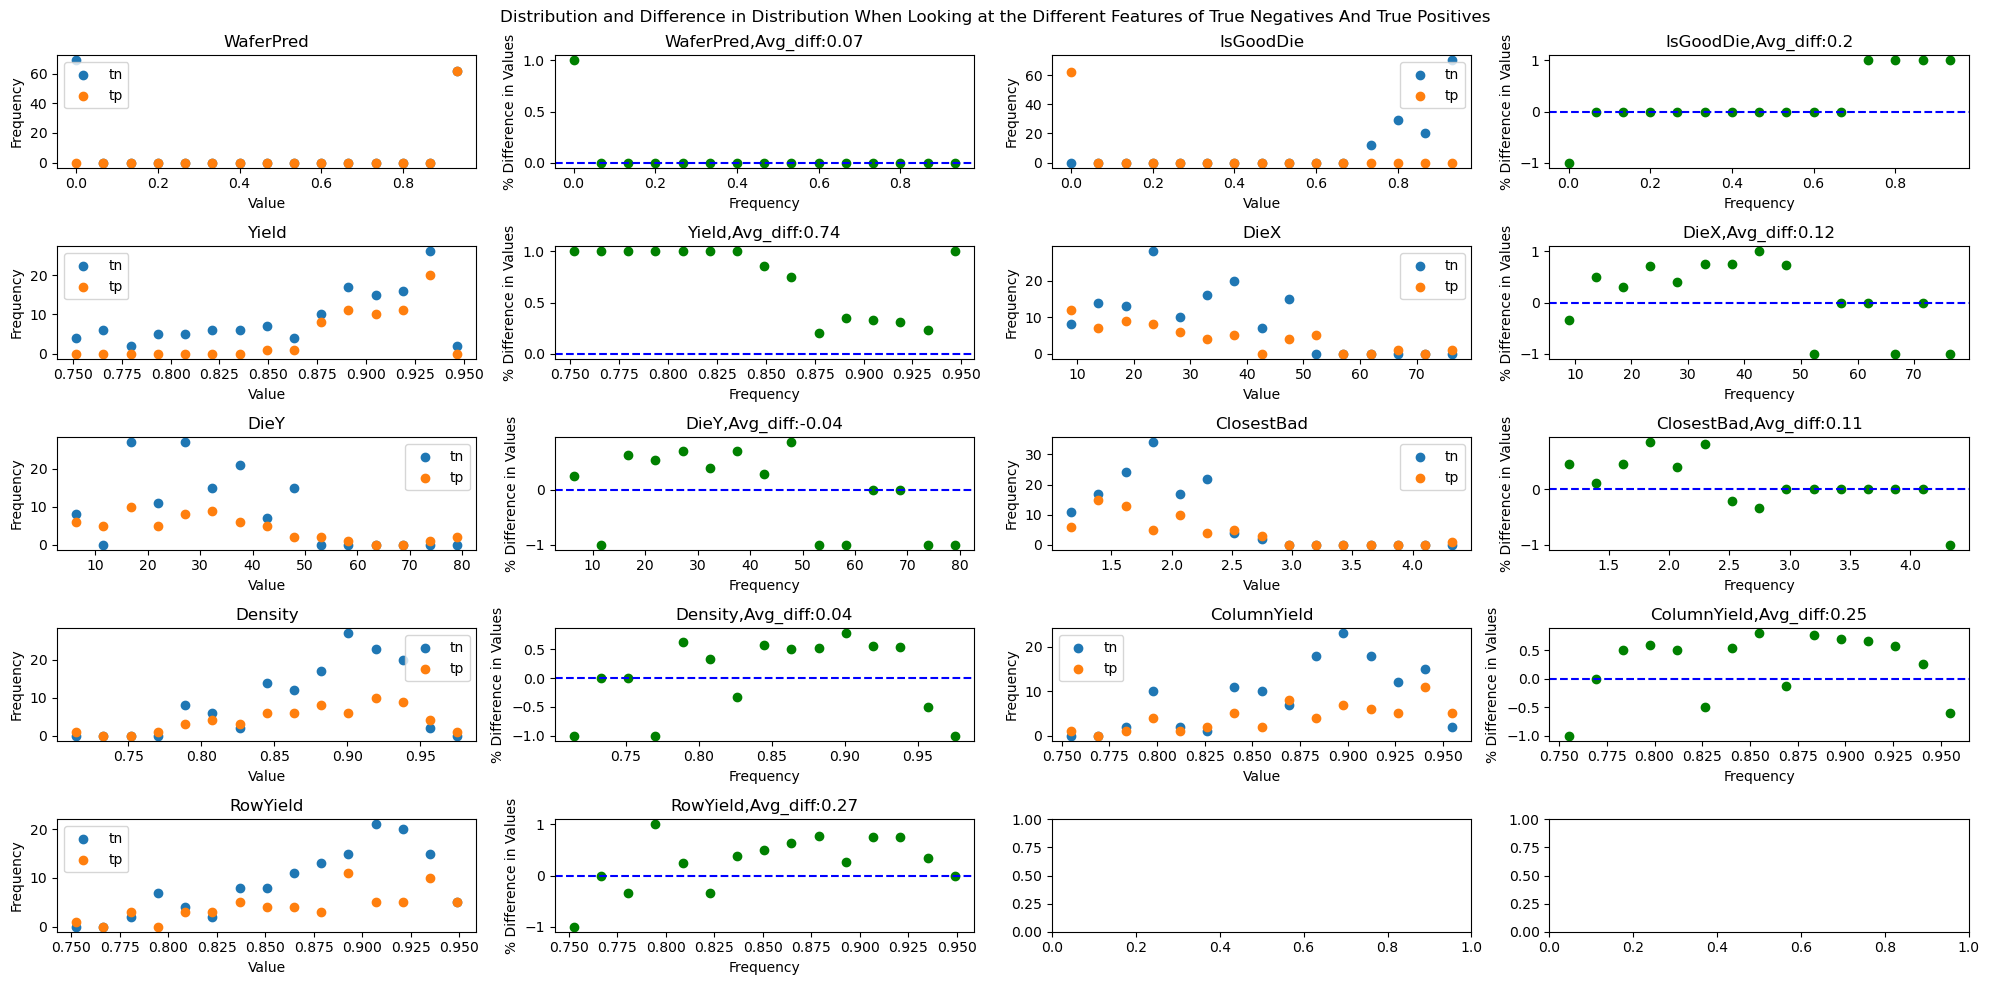

In [153]:
fig, ax = plt.subplots(5, 4, figsize=(20, 10))
ax = ax.ravel()

count= 0

for feature in selected_features:
    min_val = np.min((tn.groupby('WaferName').mean()[feature].min(),tp.groupby('WaferName').mean()[feature].min()))
    max_val = np.max((tn.groupby('WaferName').mean()[feature].max(),tp.groupby('WaferName').mean()[feature].max()))

    hist_1, bin_edges_1 =np.histogram(tn.groupby('WaferName').mean()[feature], bins = 15, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_1[:-1], y = hist_1, label='tn')
    hist_2, bin_edges_2 =np.histogram(tp.groupby('WaferName').mean()[feature], bins = 15, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_2[:-1], y = hist_2, label='tp')
    ax[count].set_title(feature)
    ax[count].set_xlabel('Value')
    ax[count].set_ylabel('Frequency')
    ax[count].legend()
    
    count+=1
    
    ax[count].scatter(x=bin_edges_2[:-1], y = np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0), color='green')
    ax[count].axhline(y =0, color='blue',linestyle='--' )
    ax[count].set_title(f"{feature},Avg_diff:{round(np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0).mean(),2)}")
    ax[count].set_ylabel('% Difference in Values')
    ax[count].set_xlabel('Frequency')
    count+=1
fig.suptitle('Distribution and Difference in Distribution When Looking at the Different Features of True Negatives And True Positives')
plt.tight_layout()

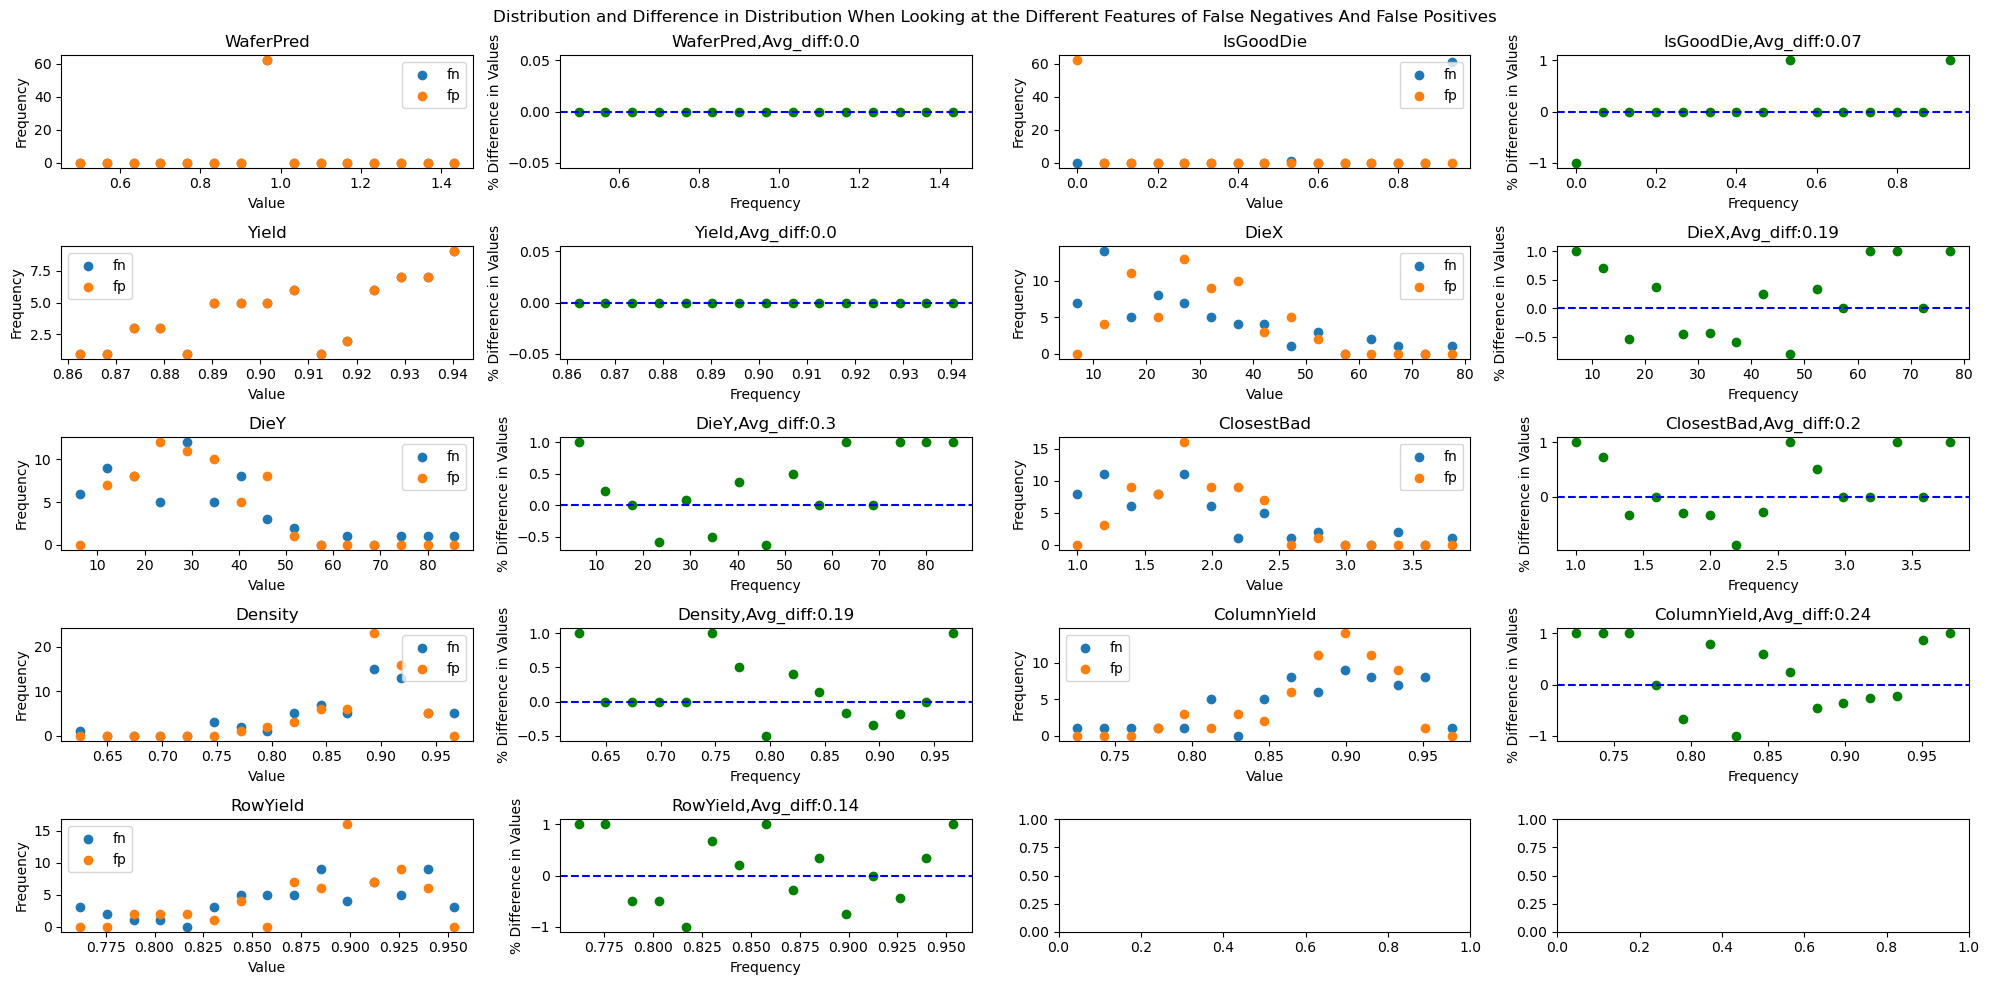

In [154]:
fig, ax = plt.subplots(5, 4, figsize=(20, 10))
ax = ax.ravel()

count= 0

for feature in selected_features:
    min_val = np.min((fn.groupby('WaferName').mean()[feature].min(),fp.groupby('WaferName').mean()[feature].min()))
    max_val = np.max((fn.groupby('WaferName').mean()[feature].max(),fp.groupby('WaferName').mean()[feature].max()))

    hist_1, bin_edges_1 =np.histogram(fn.groupby('WaferName').mean()[feature], bins = 15, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_1[:-1], y = hist_1, label='fn')
    hist_2, bin_edges_2 =np.histogram(fp.groupby('WaferName').mean()[feature], bins = 15, range = (min_val,max_val))
    ax[count].scatter(x=bin_edges_2[:-1], y = hist_2, label='fp')
    ax[count].set_title(feature)
    ax[count].set_xlabel('Value')
    ax[count].set_ylabel('Frequency')
    ax[count].legend()
    
    count+=1
    
    ax[count].scatter(x=bin_edges_2[:-1], y = np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0), color='green')
    ax[count].axhline(y =0, color='blue',linestyle='--' )
    ax[count].set_title(f"{feature},Avg_diff:{round(np.nan_to_num((hist_1-hist_2)/ np.max((hist_1,hist_2), axis=0),0).mean(),2)}")
    ax[count].set_ylabel('% Difference in Values')
    ax[count].set_xlabel('Frequency')
    count+=1
fig.suptitle('Distribution and Difference in Distribution When Looking at the Different Features of False Negatives And False Positives')
plt.tight_layout()

Looking at the above graphs we can start to understand the errors in the model. Many of the errors can be caused because the features in the FP/TN and TP/FN groups can be quite similair. This makes it harder for the model to see the difference between the two. It would make sense that features that are close to each other will recieve a similiar prediction. 

Do per wafer predictions . . . 

In [155]:
id_scratch_dict = pd.Series(df_wafers.groupby("WaferName").sum().IsScratchDie > 0).astype(int).to_dict()

In [156]:
wafer_results_dict = {}

for name, group_df in df_error.groupby('WaferName'):

    tp = group_df[(group_df['true'] == 1) & (group_df['predicted'] == 1)]
    tn = group_df[(group_df['true'] == 0) & (group_df['predicted'] == 0)]

    fp = group_df[(group_df['true'] == 0) & (group_df['predicted'] == 1)]
    fn = group_df[(group_df['true'] == 1) & (group_df['predicted'] == 0)]

    ac_score = accuracy_score(group_df['true'],group_df['predicted'])
    rcll_score = recall_score(group_df['true'],group_df['predicted'])
    prsc_score = precision_score(group_df['true'],group_df['predicted'])

    wafer_results_dict[name] = (ac_score,rcll_score,prsc_score,tp.shape[0]/group_df.shape[0],tn.shape[0]/group_df.shape[0],fp.shape[0]/group_df.shape[0],fn.shape[0]/group_df.shape[0])

In [157]:
df_wafer_scores = pd.DataFrame(wafer_results_dict).T
df_wafer_scores.columns = ['Acc','Rec','Prec','TP','TN','FP','FN']
df_wafer_scores = df_wafer_scores.reset_index().rename(columns = {'index':'WaferName'})
df_wafer_scores['WaferScratch'] = df_wafer_scores.WaferName.apply(lambda x : id_scratch_dict[x] )

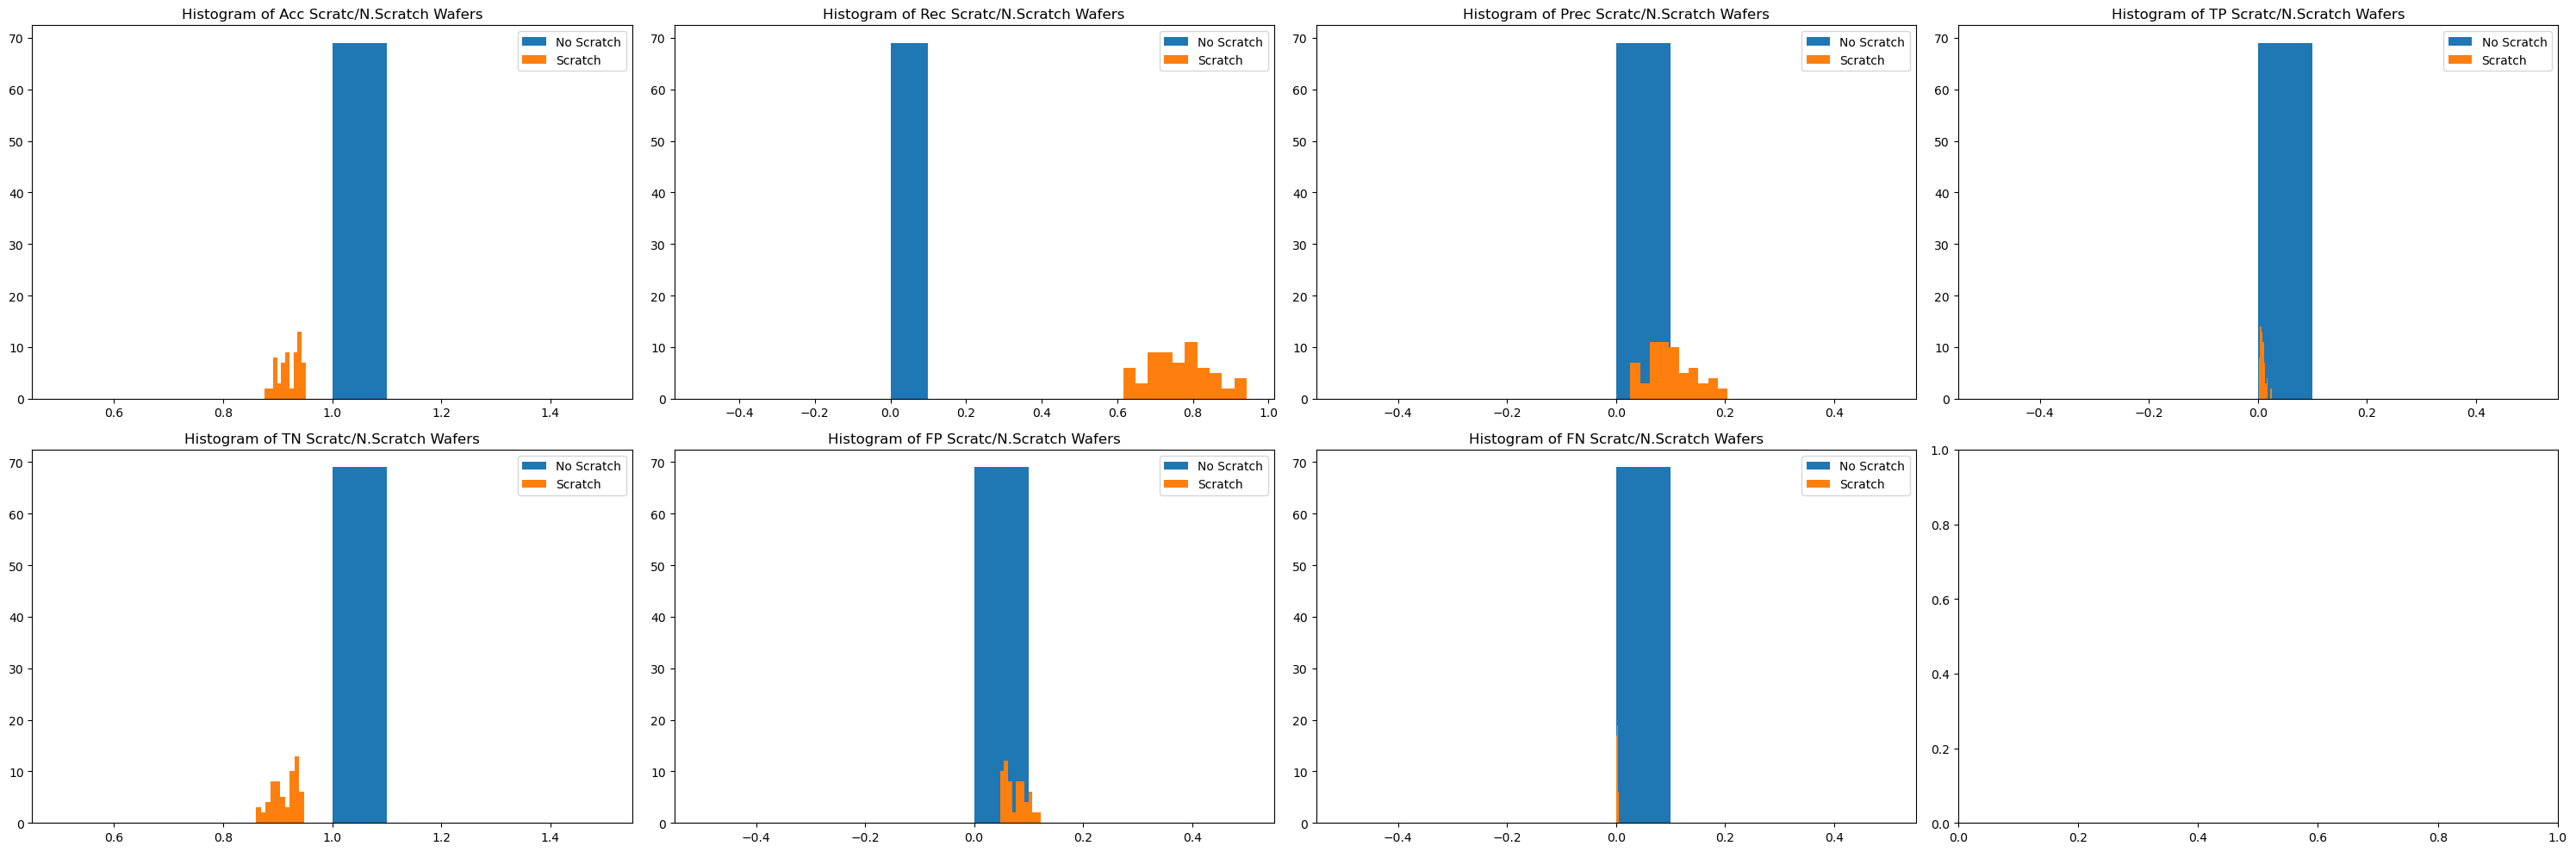

In [158]:
selected_columns = ['Acc', 'Rec', 'Prec', 'TP', 'TN', 'FP', 'FN']

fig, ax = plt.subplots(2, len(selected_features)//2, figsize=(30, 10))

ax= ax.ravel()

for count, column in enumerate(selected_columns):
    ax[count].hist(df_wafer_scores[df_wafer_scores['WaferScratch'] == 0][column], label = 'No Scratch')
    ax[count].hist(df_wafer_scores[df_wafer_scores['WaferScratch'] == 1][column], label = 'Scratch')
    ax[count].set_title(f'Histogram of {column} Scratc/N.Scratch Wafers')
    ax[count].legend()
plt.tight_layout()

While the above graph does show the difference in distributions it does not help us isolate the wafers that are responsible for the incorrect predictions.

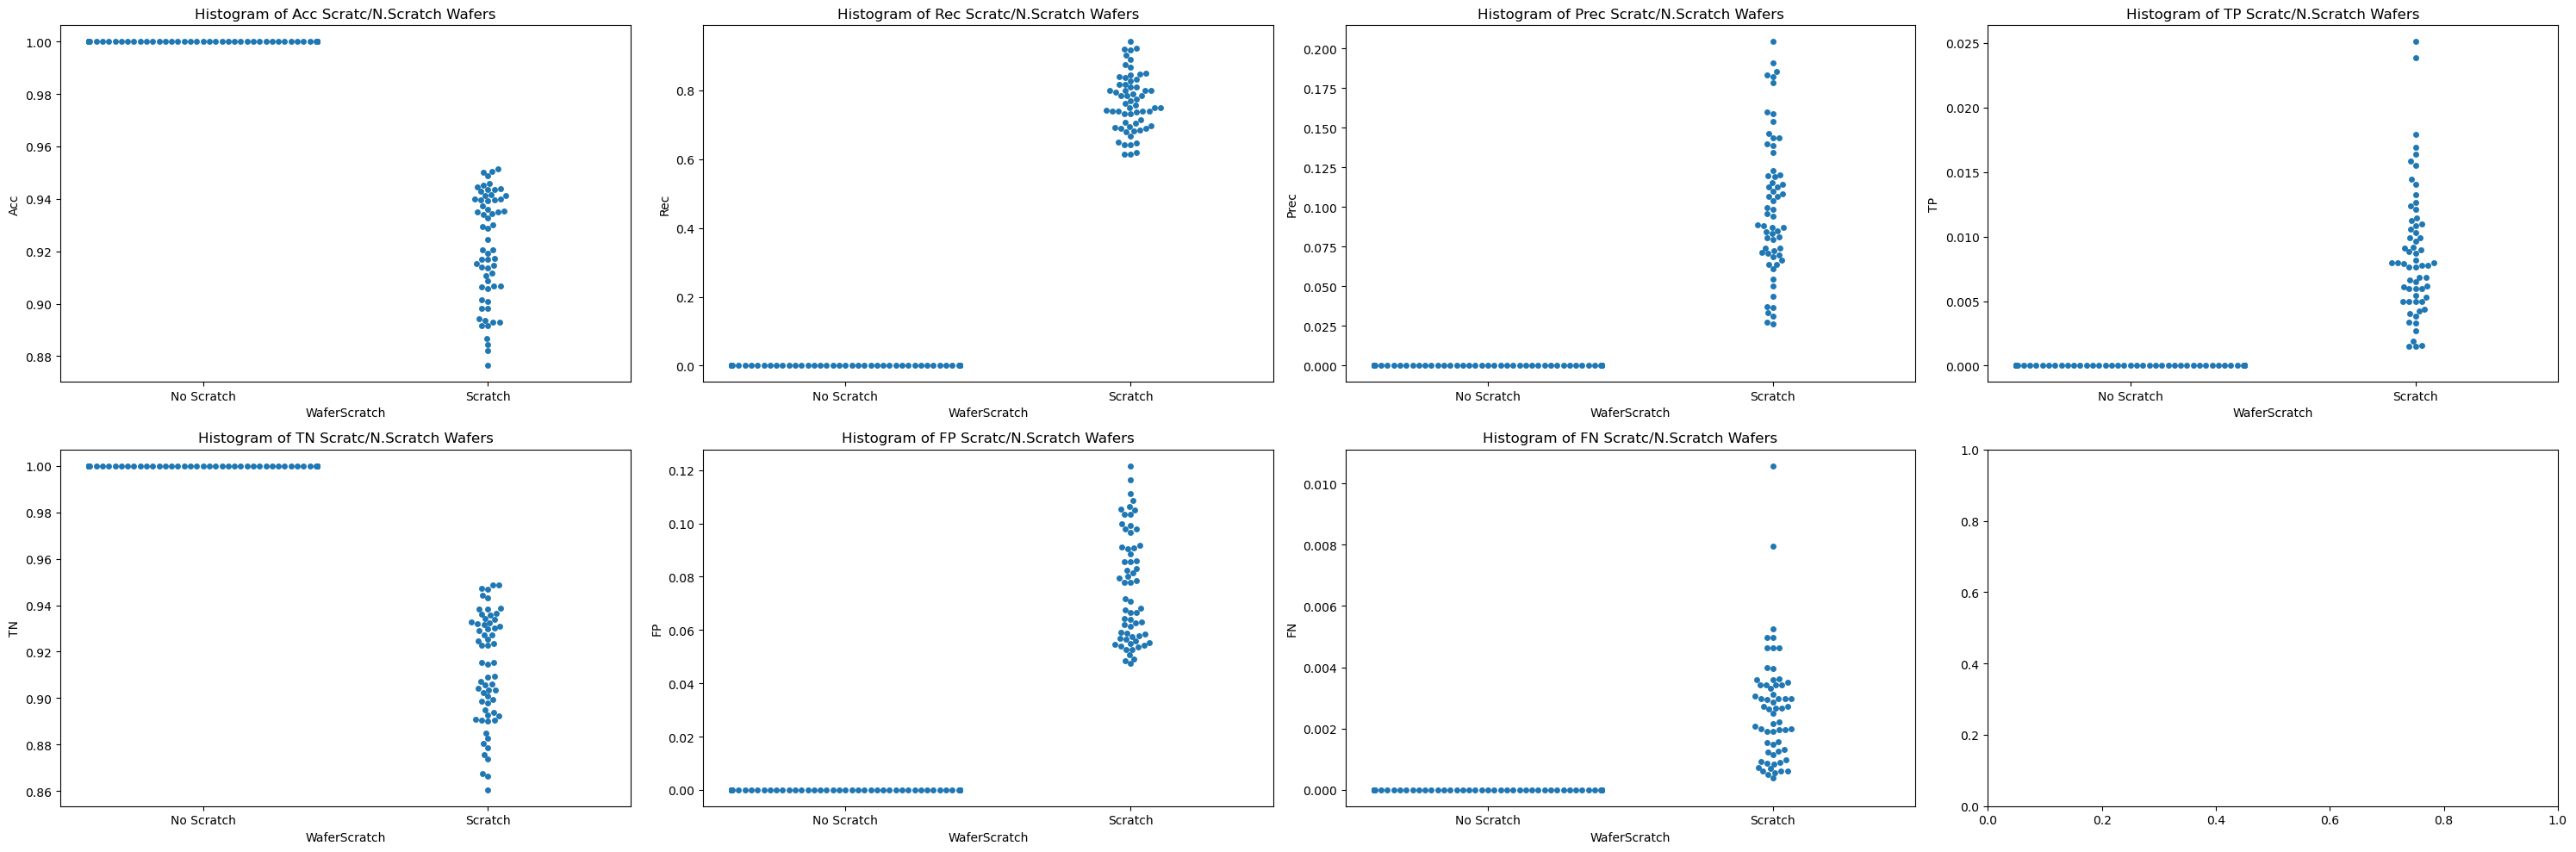

In [159]:
selected_columns = ['Acc', 'Rec', 'Prec', 'TP', 'TN', 'FP', 'FN']

fig, ax = plt.subplots(2, 4, figsize=(30, 10))

ax= ax.ravel()

for count, column in enumerate(selected_columns):
    sns.swarmplot(x="WaferScratch", y=column, data=df_wafer_scores, ax = ax[count])
    ax[count].set_title(f'Histogram of {column} Scratc/N.Scratch Wafers')
    ax[count].set_xticklabels(['No Scratch','Scratch'])
    # ax[count].legend()
plt.tight_layout()

In [160]:
low_rec = df_wafer_scores[(df_wafer_scores['WaferScratch'] == 1) & (df_wafer_scores['Rec'] <= 0.5)]['WaferName'].values
low_rec

array([], dtype=object)

In [161]:
low_prec =df_wafer_scores[(df_wafer_scores['WaferScratch'] == 1) & (df_wafer_scores['Prec'] <= 0.5)]['WaferName'].values
low_prec

array(['01589c', '0385bf', '048a4d', '128f22', '163f97', '19f300',
       '1abd5f', '1ba7c9', '1d28e7', '1db3a7', '1e9461', '1f3c70',
       '2519d1', '25a2cf', '2c7235', '2cb6ff', '318b1c', '3ac06a',
       '427b1d', '4843d9', '523e46', '586c42', '5e48d6', '5f9128',
       '6585ad', '66382b', '7f0ffd', '801890', '826862', '838326',
       '92d598', '980f23', '98a393', '99af40', 'a50508', 'a5e22c',
       'a8e536', 'a98bc3', 'b01bed', 'b77c19', 'b7e6d2', 'bac536',
       'bce8d5', 'bd4762', 'c35d47', 'c6c683', 'cfc6af', 'd254d9',
       'd8f330', 'df76c1', 'e2b073', 'e48ed5', 'e5e887', 'e6254c',
       'e89399', 'eb4207', 'ed99fa', 'edafc0', 'eef52f', 'f92f85',
       'fc0986', 'fc58f6'], dtype=object)

In [162]:
bad_wafers = set(low_rec) & set(low_prec)
bad_wafers

set()

In [163]:
low_acc =df_wafer_scores[(df_wafer_scores['WaferScratch'] == 0) & (df_wafer_scores['Acc'] <1 )]['WaferName'].values
low_acc

array([], dtype=object)

THIS WAS A COMMENT I MADE ON A PREVIOUS RUN, SINCE THEN THE CODE HAS CHANGED, HOWEVER I FEEL IT IS IMPORTANT FOR UNDERSTANDING HOW THE MODEL WORKS AND DEALING WITH FUTURE PROBLEMS THAT MAY ARISE:

Using the above graphs we can see some interesting patterns that can help us isolate badly predicted dies. Perhaps if we can find a pattern we would be able to fix the problems. Some of the patterns that caught my eye are:

    - In Acc: The two dots with below 100% acc in no scratch
    - In Rec: THe group of scratched wafers with zero or very low recall.
    - in FN: Tht few dots that are above the pack. 

However, now there is an interesting phenomena. It appears that the model knows that if the die is a non_scratch die, that it needs to predict 0 for all the dies, which is correct, consequently the metrics for all the non-scratched dies are perfect. This highlight how the weakness in the model is when it is dealing with a die with a scratch on. This tells me two things:
    1: Classifying the wafer as a whole is very beneficial, and plays a large role in the model.
    2: The other featuers that are designed to identify scratched and non-scratched dies need to be improved and some more features need to be developed to better isolate scratched dies. 

#### Model Calibration

It can sometimes be beneficial to calibrate models so that their predict_probas are more aligned with traditional probailities. It can sometimes improve model perfomance, lets give it a shot. 

In [164]:
model_lst = [model_xgboost,model_complimentNb,model_logic,model_cat]
model_name_lst = ['xgboost','complimentNb','logic','cat']

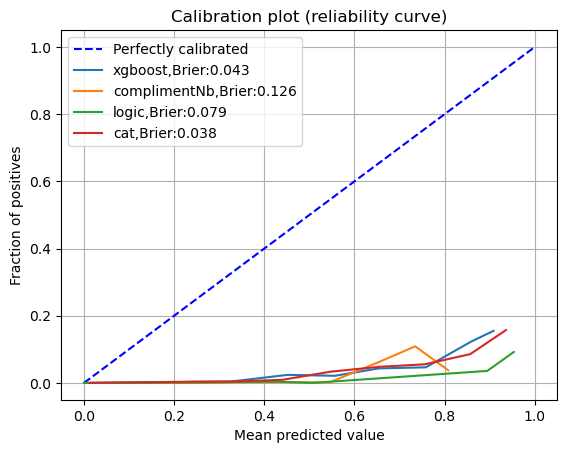

In [165]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title('Calibration plot (reliability curve)')

for count, model_uncal in enumerate(model_lst):


    model_probs = model_uncal.predict_proba(X_test_features)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_features, model_probs, n_bins=10)

    model_score = brier_score_loss(y_test_features, model_probs, pos_label=y.max())

    plt.plot(mean_predicted_value, fraction_of_positives, label=f"{model_name_lst[count]},Brier:{round(model_score,3)}")
plt.grid()
plt.legend()
plt.show()

We can see that none of the models are properly calibrated, they are all below the line and extremely flat. They also have high brei loss scores. 

100%|██████████| 4/4 [07:02<00:00, 105.69s/it]


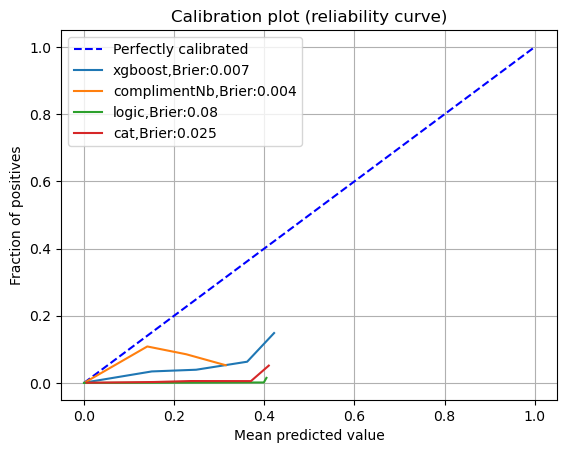

In [166]:
model_preds_lst = []
fig = plt.figure()
ax = fig.add_subplot()
plt.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title('Calibration plot (reliability curve)')

for count, model_uncal in enumerate(tqdm(model_lst)):

    calibrated = CalibratedClassifierCV(model_uncal, method='sigmoid', cv=5)
    calibrated.fit(X_train_features, y_train_features)
    # predict probabilities
    model_probs = calibrated.predict_proba(X_test_features)[:, 1]
    model_preds_lst.append(model_probs)
    
    fraction_of_positives, mean_predicted_value_rfc = calibration_curve(y_test_features, model_probs, n_bins=10)
    model_score = brier_score_loss(y_test_features, model_probs, pos_label=y.max())

    plt.plot(mean_predicted_value_rfc, fraction_of_positives, label=f"{model_name_lst[count]},Brier:{round(model_score,3)}")
plt.grid()
plt.legend()
plt.show()

In [167]:
if training_run:
    with open('calibrated_preds.pkl', 'wb') as f:
        pickle.dump(model_preds_lst, f)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    479708
           1       0.00      0.00      0.00      2251

    accuracy                           1.00    481959
   macro avg       0.50      0.50      0.50    481959
weighted avg       0.99      1.00      0.99    481959



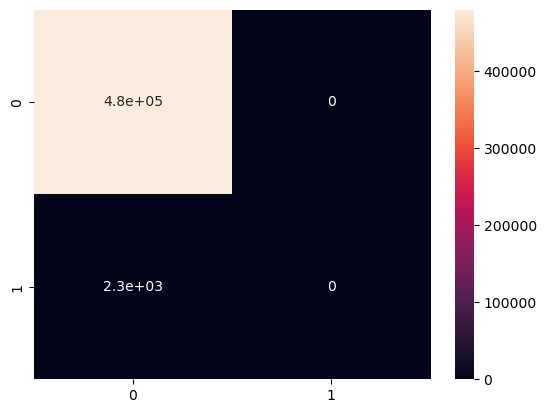

In [168]:
df_calibrated = pd.DataFrame(model_preds_lst).T
y_preds_calib = np.where(df_calibrated.mean(axis=1).values > 0.5, 1,0)

print(classification_report(y_test_features, y_preds_calib))

# Make Confusion Matrix
cf_matrix = confusion_matrix(y_test_features, y_preds_calib)
sns.heatmap(cf_matrix, annot=True)
plt.show()

We can see that the origional models are very flat and below the diagonal which probaly means the probabilites are too large, and we can see that when the models are calibrated the brier loss decreases which is a good sign, however, the calibrated model predics only one class, so we will not be using it. Perhaps trying out different methods of calibration might help. 

### Make Predictions for Final Holdout Set

In [169]:
df_wafers_test.head()

WaferName  DieX  DieY  IsGoodDie
0    5a6ad6     0    12      False
1    5a6ad6     0    13       True
2    5a6ad6     0    14       True
3    5a6ad6     0    15       True
4    5a6ad6     0    16       True

In [170]:
# Get Features for the test set

# Closest Bad Features
if training_run:
    closest_dist_feature_test = closest_bad_feature(df_wafers_test)
    np.save('closest_dist_feature_test.npy',closest_dist_feature_test)
else:
    closest_dist_feature_test = np.load('closest_dist_feature_test.npy')

# Yield per Wafer
if training_run:
    yield_feature_test = yield_features(df_wafers_test)
    np.save('yield_feature_test.npy', yield_feature_test)
else:
    yield_feature_test = np.load('yield_feature_test.npy')

# Density
if training_run:
    density_feature_test = density_feature_func(df_wafers_test,2)
    np.save("density_feature_test.npy", density_feature_test)
else:
    density_feature_test = np.load("density_feature_test.npy")

# Row yield
if training_run:
    row_yields_feature_test = yield_row_function(df_wafers_test, 3)
    np.save('row_yields_feature_test.npy',row_yields_feature_test )
else:
    row_yields_feature_test = np.load('row_yields_feature_test.npy')

# Column Yield
if training_run:
    column_yields_feature_test = yield_column_function(df_wafers_test, 3)
    np.save('column_yields_feature_test.npy',column_yields_feature_test)
else:
    column_yields_feature_test = np.load('column_yields_feature_test.npy')



In [171]:
# Add the features
df_wafers_test['WaferPred'] = df_wafers_test['WaferName'].apply(lambda x: wafer_type_pred_dict_holdout[x] )
df_wafers_test['Yield'] = yield_feature_test
df_wafers_test['ClosestBad'] = closest_dist_feature_test
df_wafers_test['RowYield'] = row_yields_feature_test
df_wafers_test['ColumnYield'] = column_yields_feature_test
df_wafers_test['Density'] = density_feature_test

In [172]:
# Make Predictions

boost_preds_final = model_xgboost.predict_proba(df_wafers_test.loc[:,selected_features])
nb_preds_final = model_complimentNb.predict_proba(df_wafers_test.loc[:,selected_features])
log_preds_final = model_logic.predict_proba(df_wafers_test.loc[:,selected_features])
cat_preds_final = model_cat.predict_proba(df_wafers_test.loc[:,selected_features])

df_preds = pd.DataFrame({
    'boost':boost_preds_final[:,1],
    'nb':nb_preds_final[:,1],
    'log': log_preds_final[:,1],
    'car': cat_preds_final[:,1]
})

IsScratchDie = np.where(df_preds.mean(axis =1).values > 0.5, 1,0)

In [173]:
np.unique(np.where(df_preds.mean(axis =1).values > 0.5, 1,0), return_counts=True)

(array([0, 1]), array([1785451,   74612], dtype=int64))

In [174]:
1785709 / (1785709 + 74354) , 74354 / (1785709 + 74354)

(0.9600260851379765, 0.039973914862023494)

The above numbers represent the distribution of the predictions, they are close to 99/1, so i hope i got them right :)

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

- The first issue is I would have liked to have applied some more hyperparamater optimiztion techniques to the models. However, they are extremely time consuming so I did not do them. I did try and implement my own version of hyperparmater optimization utiliztion multiprocessing, however there was a ram limit and it did not work. 
- I would have liked to have used an svc model, however it took hours to train and didnt even finish, so I had to leave it.
- I would have liked to use a FFNN, and I tried training one however it took a long time and stopping it at 5 epochs returned terrible results. In order to properly choose the correct number of layers and nodes as well as train it was too time consuming. 
- I would have liked to implemet SHAP analysis to help with the feature selection, however when the timer said it would take 144 hours due to the large size of the data set I decided against it. Perhaps I could have tried it on a smaller part of the data just to get an idea. 
- While the number of scratched and non scratched wafers is balanced the number of scratched and non scratched dies is not, being 99/1. It may have been worth trying to balanve the data using data synthesis techines such as smote.    
- Looking at the features after running everything it appears that wafer type prediction features are very powerful and perhaps I should have invested more time in developing them. However, it also appears that once a die was classified as non-scratch, the model never classified as any of the dies as scratches and the weakness in the model was in its ability to differnetiate between scratch and non-scratched dies on a scratched wafer. 
- There were also many different ways of creating the features, with some of them accepting many different hyperparamaters. I did not test these and relied on my initial visual tests, which do not always relate to model performance. It would have taken too long to test that aswell, considering some of those features were not used anyhow. 
- I would have also liked to have done some cross validation of the models. While I used a split method reliant on cross valdiation to split my data, I did not test my models on the other folds. This has left me with a doubt regarding if my model is overfit/underfit. However, yet again time cosntrains make this quite difficult to test and train multiple models multiple times . . .
- There were also a few feature selection methods that i attempted to do, but after waiting hours for them to complete, i decided to leave them as it was taking too much time. 
- Wafers are different sized

# Submission

In [175]:
#model = (...)
# IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie
# df_wafers_test.to_csv('df_wafers_test_with_preds.csv')